In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [192]:
import os
os.chdir("C:/Avinash/Upgrad/Advanced_regression/Assignment")
os.getcwd()

'C:\\Avinash\\Upgrad\\Advanced_regression\\Assignment'

In [193]:
df=pd.read_csv('train.csv',keep_default_na=False, na_values=['_'])
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Mapping of certain features is carried out, which would help in better interpretation

In [194]:
MSSubClass_mapping={20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',\
        45:'1-1/2 STORY - UNFINISHED ALL AGES',\
        50:'1-1/2 STORY FINISHED ALL AGES',\
        60:'2-STORY 1946 & NEWER',\
        70:'2-STORY 1945 & OLDER',\
        75:'2-1/2 STORY ALL AGES',\
        80:'SPLIT OR MULTI-LEVEL',\
        85:'SPLIT FOYER',\
        90:'DUPLEX - ALL STYLES AND AGES',\
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',\
       150:'1-1/2 STORY PUD - ALL AGES',\
       160:'2-STORY PUD - 1946 & NEWER',\
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',\
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

In [195]:
df.MSSubClass=df.MSSubClass.map(MSSubClass_mapping)

In [196]:
OverallQual_mapping={10:'Very Excellent',\
       9:'Excellent',\
       8:'Very Good',\
       7:'Good',\
       6:'Above Average',\
       5:'Average',\
       4:'Below Average',\
       3:'Fair',\
       2:'Poor',\
       1:'Very Poor'}

In [197]:
df.OverallQual=df.OverallQual.map(OverallQual_mapping)

In [198]:
OverallCond_mapping={10:'Very Excellent',\
       9:'Excellent',\
       8:'Very Good',\
       7:'Good',\
       6:'Above Average',\
       5:'Average',\
       4:'Below Average',\
       3:'Fair',\
       2:'Poor',\
       1:'Very Poor'}

In [199]:
df.OverallCond=df.OverallCond.map(OverallCond_mapping)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   object
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   object
 18  OverallCond    1460 non-null

In [201]:
df=df.drop('Id',axis=1)

In [202]:
df.shape

(1460, 80)

In [203]:
df_1=df.copy(deep=True)

Coverting datatypes to object to int and vice-versa

In [204]:
df_1['LotFrontage'] = pd.to_numeric(df_1['LotFrontage'], errors='coerce').fillna(0).astype(int)

In [205]:
df_1['MasVnrArea'] = pd.to_numeric(df_1['MasVnrArea'], errors='coerce').fillna(0).astype(int)

In [206]:
df_1['MiscVal'] = pd.to_numeric(df_1['MiscVal'], errors='coerce').fillna(0).astype(int)

In [207]:
df_1.GarageYrBlt=df_1['GarageYrBlt'].astype(object)

In [208]:
df_1.YearBuilt=df_1['YearBuilt'].astype(object)

In [209]:
df_1.YearRemodAdd=df_1['YearRemodAdd'].astype(object)

In [210]:
df_1.MoSold=df_1['MoSold'].astype(object)

In [211]:
df_1.YrSold=df_1['YrSold'].astype(object)

In [212]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int32 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   object
 17  OverallCond    1460 non-null   object
 18  YearBuilt      1460 non-null

In [213]:
#No missing values
df_1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [214]:
df_numeric = df_1.select_dtypes(include=['float64', 'int64','int32'])
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [215]:
cor=df_numeric.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.100739    0.105010    0.076670   -0.009312   
LotArea           0.100739  1.000000    0.103321    0.214103    0.111170   
MasVnrArea        0.105010  0.103321    1.000000    0.261256   -0.071330   
BsmtFinSF1        0.076670  0.214103    0.261256    1.000000   -0.050117   
BsmtFinSF2       -0.009312  0.111170   -0.071330   -0.050117    1.000000   
BsmtUnfSF         0.160829 -0.002618    0.113862   -0.495251   -0.209294   
TotalBsmtSF       0.238274  0.260833    0.360067    0.522396    0.104810   
1stFlrSF          0.245181  0.299475    0.339850    0.445863    0.097117   
2ndFlrSF          0.042549  0.050986    0.173800   -0.137079   -0.099260   
LowQualFinSF      0.049981  0.004779   -0.068628   -0.064503    0.014807   
GrLivArea         0.220347  0.263116    0.388052    0.208171   -0.009640   
BsmtFullBath      0.010514  0.158155    0.083010    0.649212    0.158678   
BsmtHalfBath     -0.027856  0.048046    0.027403    0.067418    0.070948   
FullBath          0.120548  0.126031    0.272999    0.058543   -0.076444   
HalfBath         -0.012952  0.014259    0.199108    0.004262   -0.032148   
BedroomAbvGr      0.144494  0.119690    0.102775   -0.107355   -0.015728   
KitchenAbvGr      0.034425 -0.017784   -0.038450   -0.081007   -0.040751   
TotRmsAbvGrd      0.221396  0.190015    0.279568    0.044316   -0.035227   
Fireplaces        0.044018  0.271364    0.247015    0.260011    0.046921   
GarageCars        0.165229  0.154871    0.361945    0.224054   -0.038264   
GarageArea        0.201473  0.180403    0.370884    0.296970   -0.018227   
WoodDeckSF       -0.016780  0.171698    0.159991    0.204306    0.067898   
OpenPorchSF       0.069605  0.084774    0.122528    0.111761    0.003093   
EnclosedPorch     0.027366 -0.018340   -0.109907   -0.102303    0.036543   
3SsnPorch         0.023499  0.020423    0.019144    0.026451   -0.029993   
ScreenPorch       0.022969  0.043160    0.062248    0.062021    0.088871   
PoolArea          0.114106  0.077672    0.011928    0.140491    0.041709   
MiscVal          -0.059606  0.038068   -0.029512    0.003571    0.004940   
SalePrice         0.209624  0.263843    0.472614    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage     0.160829     0.238274  0.245181  0.042549      0.049981  ...   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779  ...   
MasVnrArea      0.113862     0.360067  0.339850  0.173800     -0.068628  ...   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503  ...   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807  ...   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167  ...   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245  ...   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241  ...   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353  ...   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000  ...   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683  ...   
BsmtFullBath   -0.422900     0.307351  0.244671 -0.169494     -0.047143  ...   
BsmtHalfBath   -0.095804    -0.000315  0.001956 -0.023855     -0.005842  ...   
FullBath        0.288886     0.323722  0.380637  0.421378     -0.000710  ...   
HalfBath       -0.041118    -0.048804 -0.119916  0.609707     -0.027080  ...   
BedroomAbvGr    0.166643     0.050450  0.127401  0.502901      0.105607  ...   
KitchenAbvGr    0.030086    -0.068901  0.068101  0.059306      0.007522  ...   
TotRmsAbvGrd    0.250647     0.285573  0.409516  0.616423      0.131185  ...   
Fireplaces      0.051575     0.339519  0.410531  0.194561     -0.021272  ...   
GarageCars      0.214175     0.434585  0.439317  0.183926     -0.094480  ...   
GarageArea      0.183303     0.486665  0.489782  0.138

Target variable 'SalePrice' is positively correlated to the features- 'MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF'

and negatively correlated with features- 'BsmtFinSF2','LowQualFinSF','EnclosedPorch','MiscVal'

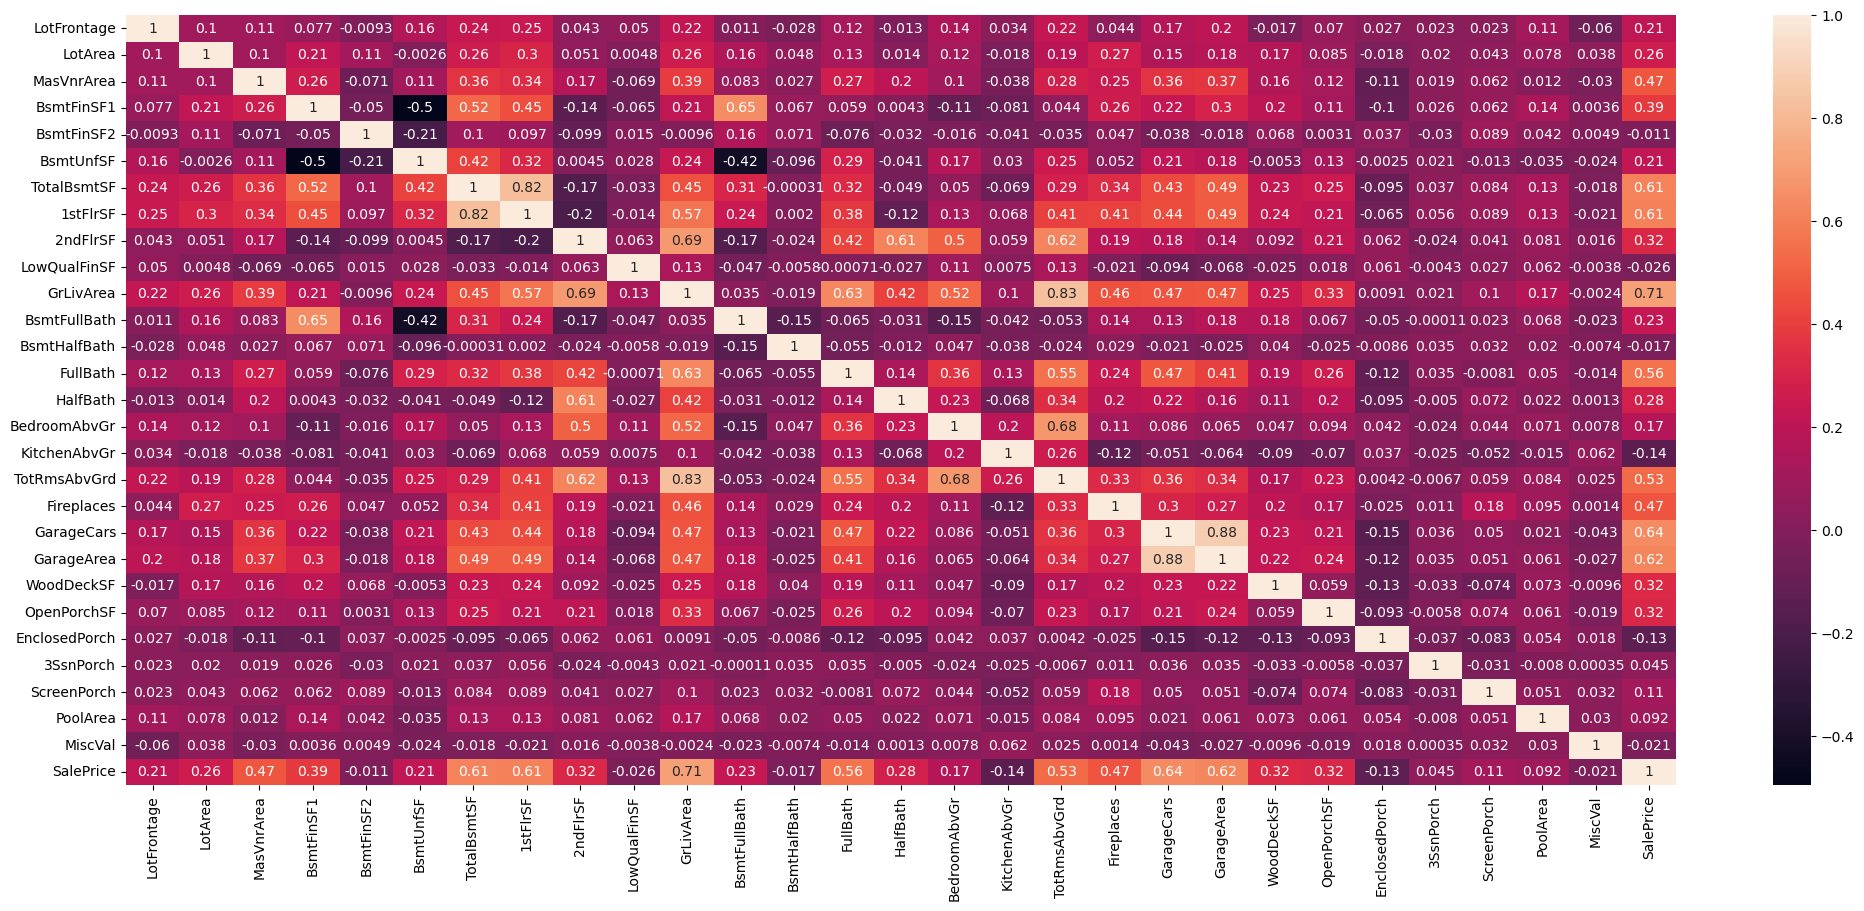

In [216]:
plt.figure(figsize=(25,10))
sns.heatmap(cor,annot=True)
plt.show()

Target variable 'SalePrice' is positively correlated to the features-'LotArea', 'MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF'

and negatively correlated with features- 'BsmtFinSF2','LowQualFinSF','EnclosedPorch','MiscVal','KitchenAbvGr'

Many of the independent variables (eg.Garagearea and Garagecars) are also correlated with each other, that can be observed in the heatmap

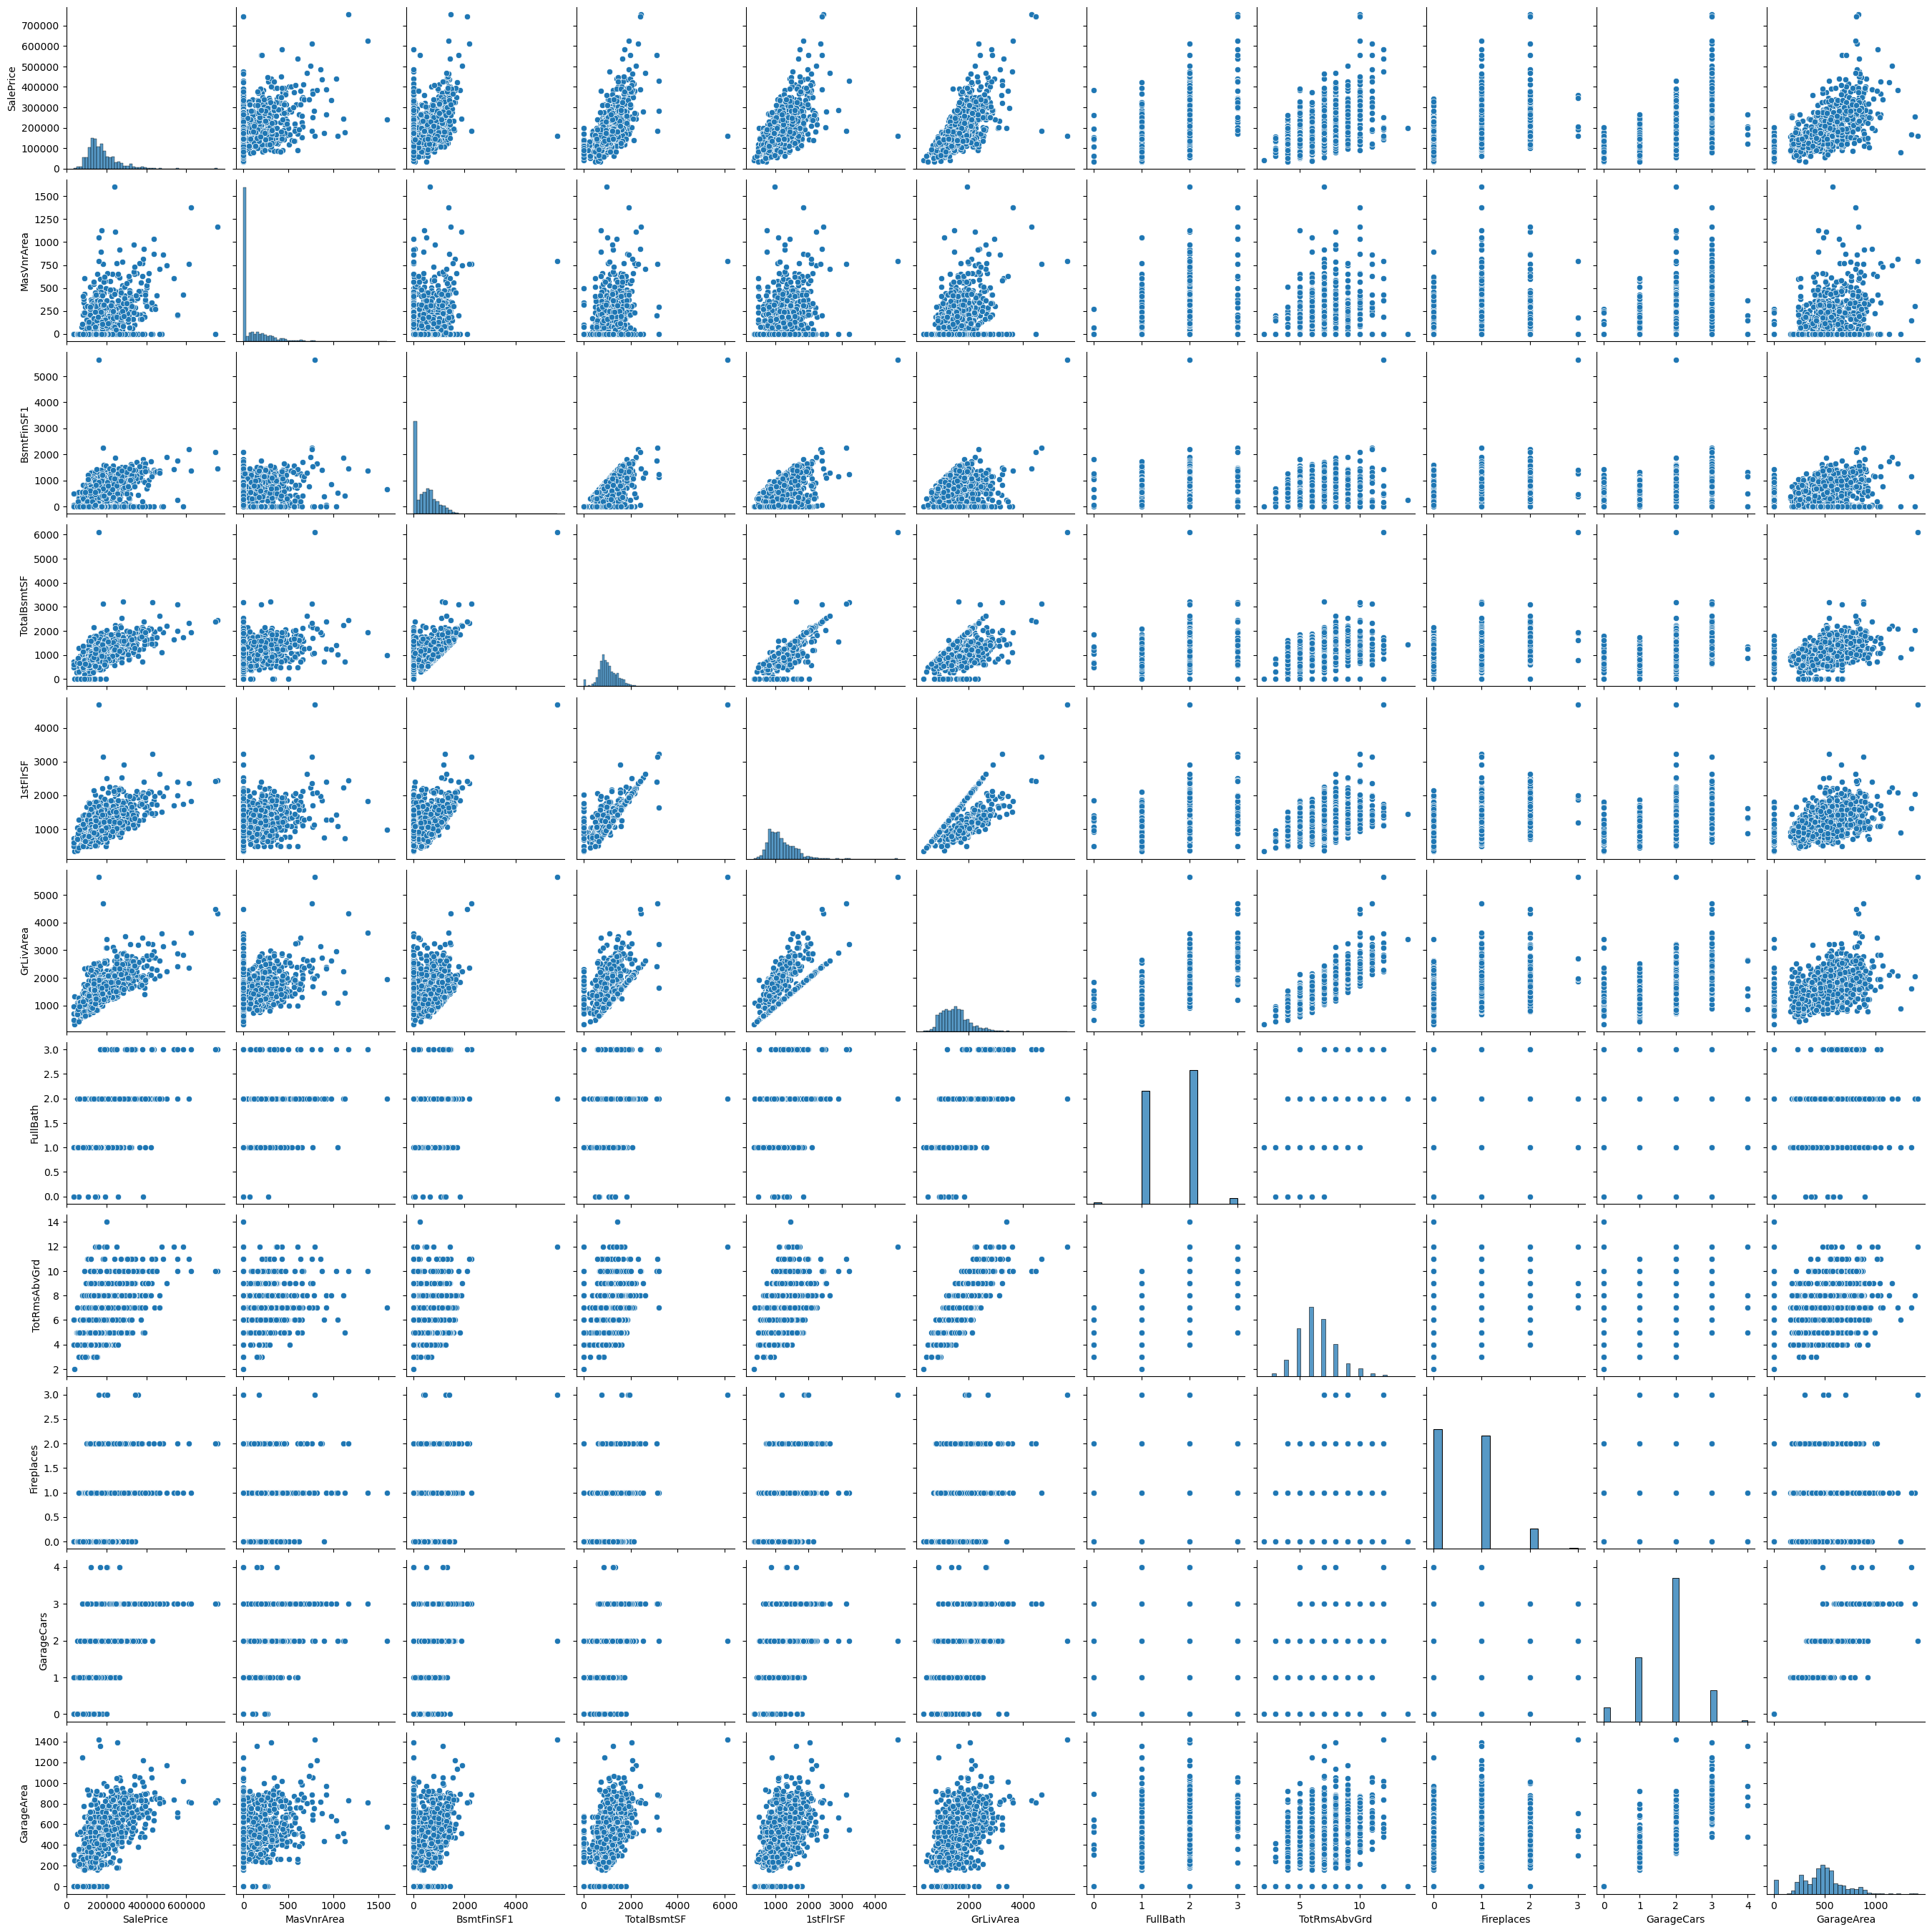

In [217]:
#pairplot with few features, for visual understanding
sns.pairplot(df_1[['SalePrice','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea']])
plt.show()

the above graphs indicate a linear relationship between the target variable and other independent variables,in which case a linear regression model can be considered.

Many of the features such as  'BsmtFinSF2','LowQualFinSF','EnclosedPorch' etc.. have majority of their values as zero. At this stage the data is not modified. 

In [218]:
df_categorical = df_1.select_dtypes(include=['object'])
df_categorical.head()

MSSubClass MSZoning Street Alley LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave    NA      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave    NA      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave    NA      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave    NA      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave    NA      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood  ... GarageQual GarageCond  \
0    AllPub    Inside       Gtl      CollgCr  ...         TA         TA   
1    AllPub       FR2       Gtl      Veenker  ...         TA         TA   
2    AllPub    Inside       Gtl      CollgCr  ...         TA         TA   
3    AllPub    Corner       Gtl      Crawfor  ...         TA         TA   
4    AllPub       FR2       Gtl      NoRidge  ...         TA         TA   

  PavedDrive PoolQC Fence MiscFeature MoSold YrSold SaleType SaleCondition  
0          Y     NA    NA          NA      2   2008       WD        Normal  
1          Y     NA    NA          NA      5   2007       WD        Normal  
2          Y     NA    NA          NA      9   2008       WD        Normal  
3          Y     NA    NA          NA      2   2006       WD       Abnorml  
4          Y     NA    NA          NA     12   2008       WD        Normal  

[5 rows x 51 columns]

In [219]:
col=df_categorical.columns
col

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

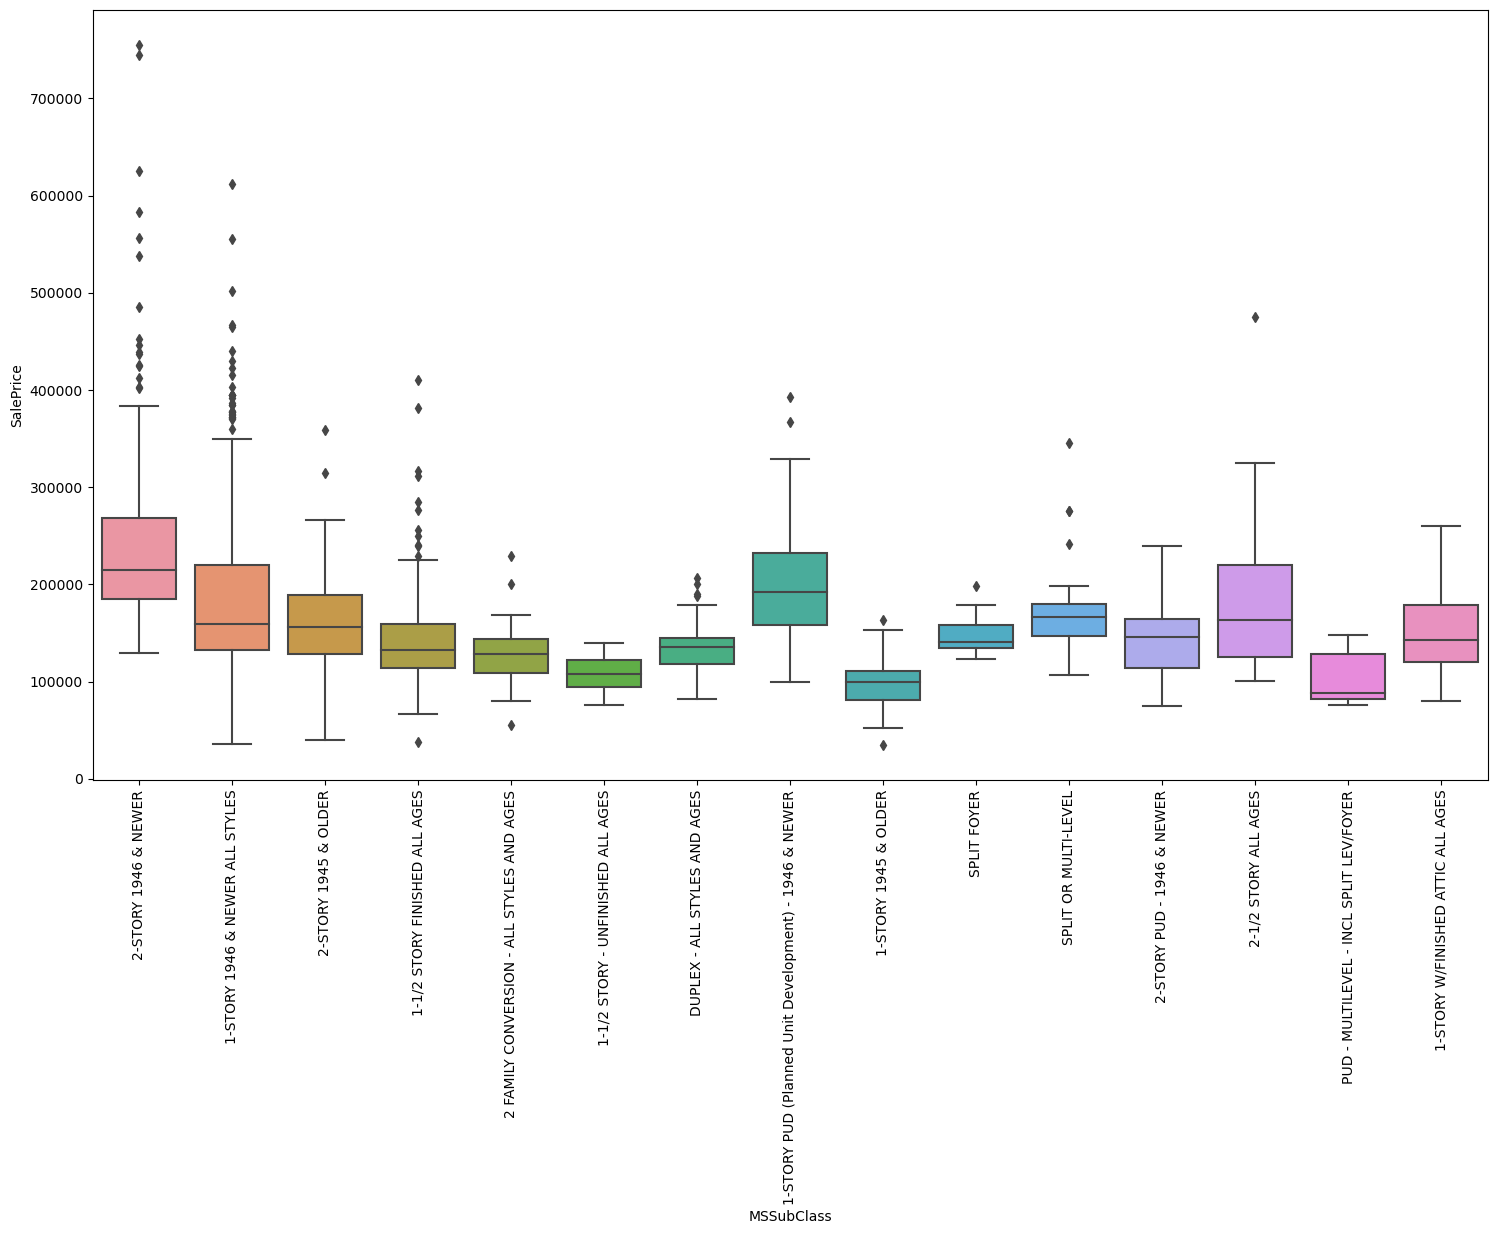

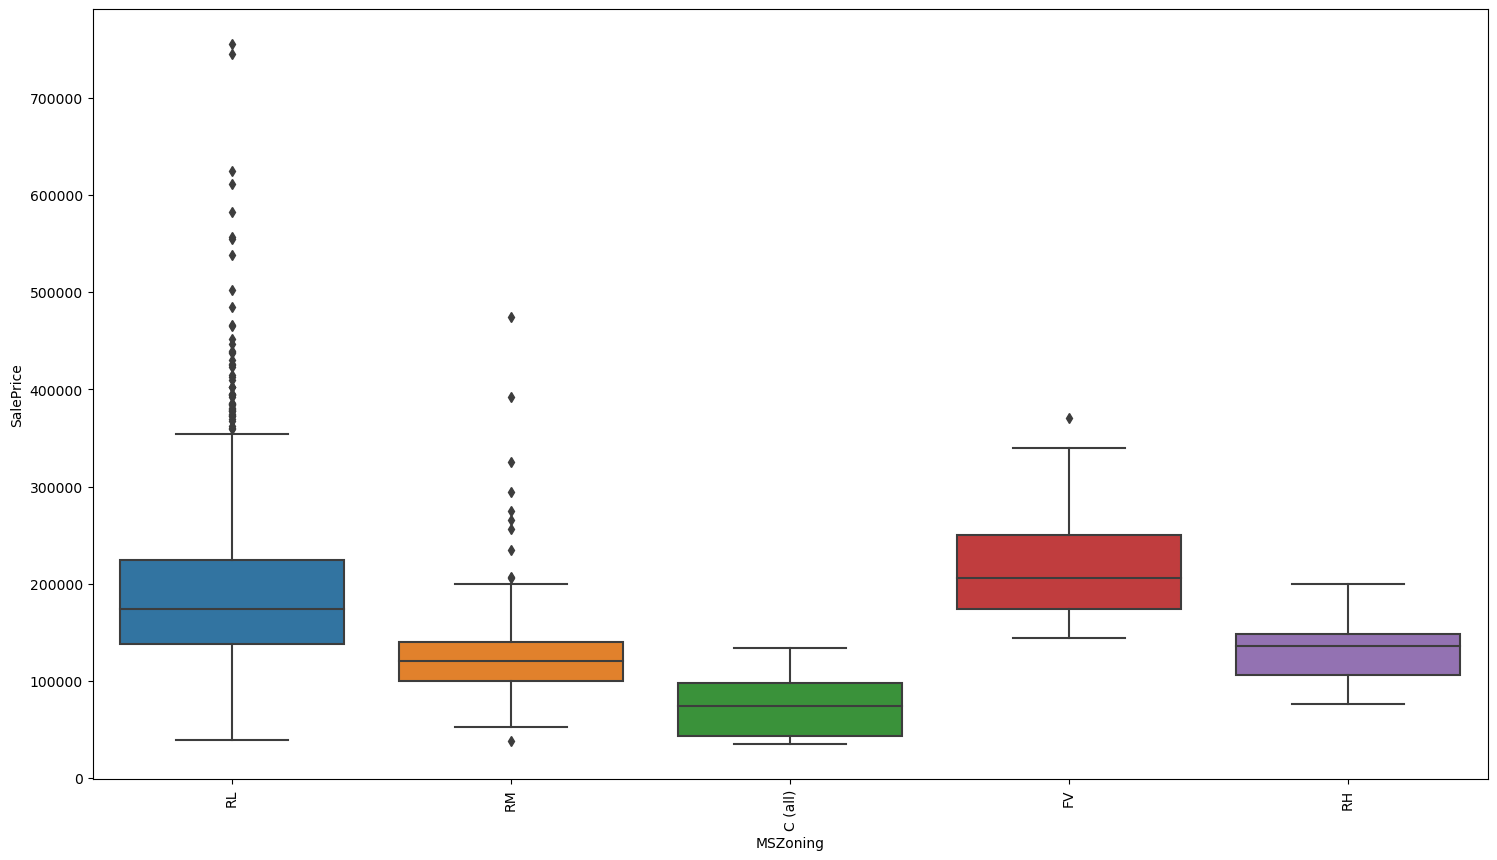

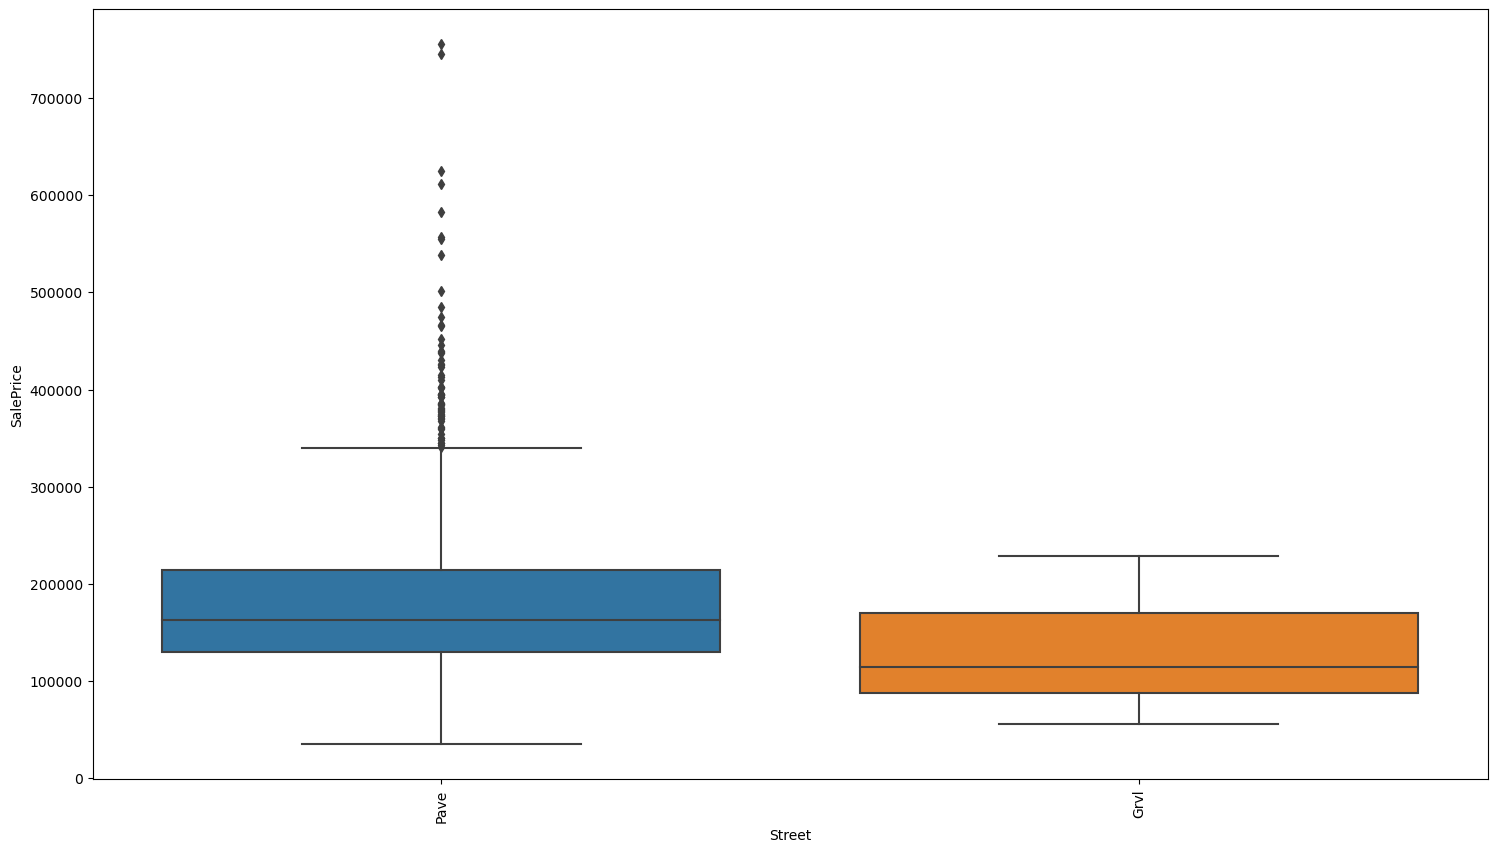

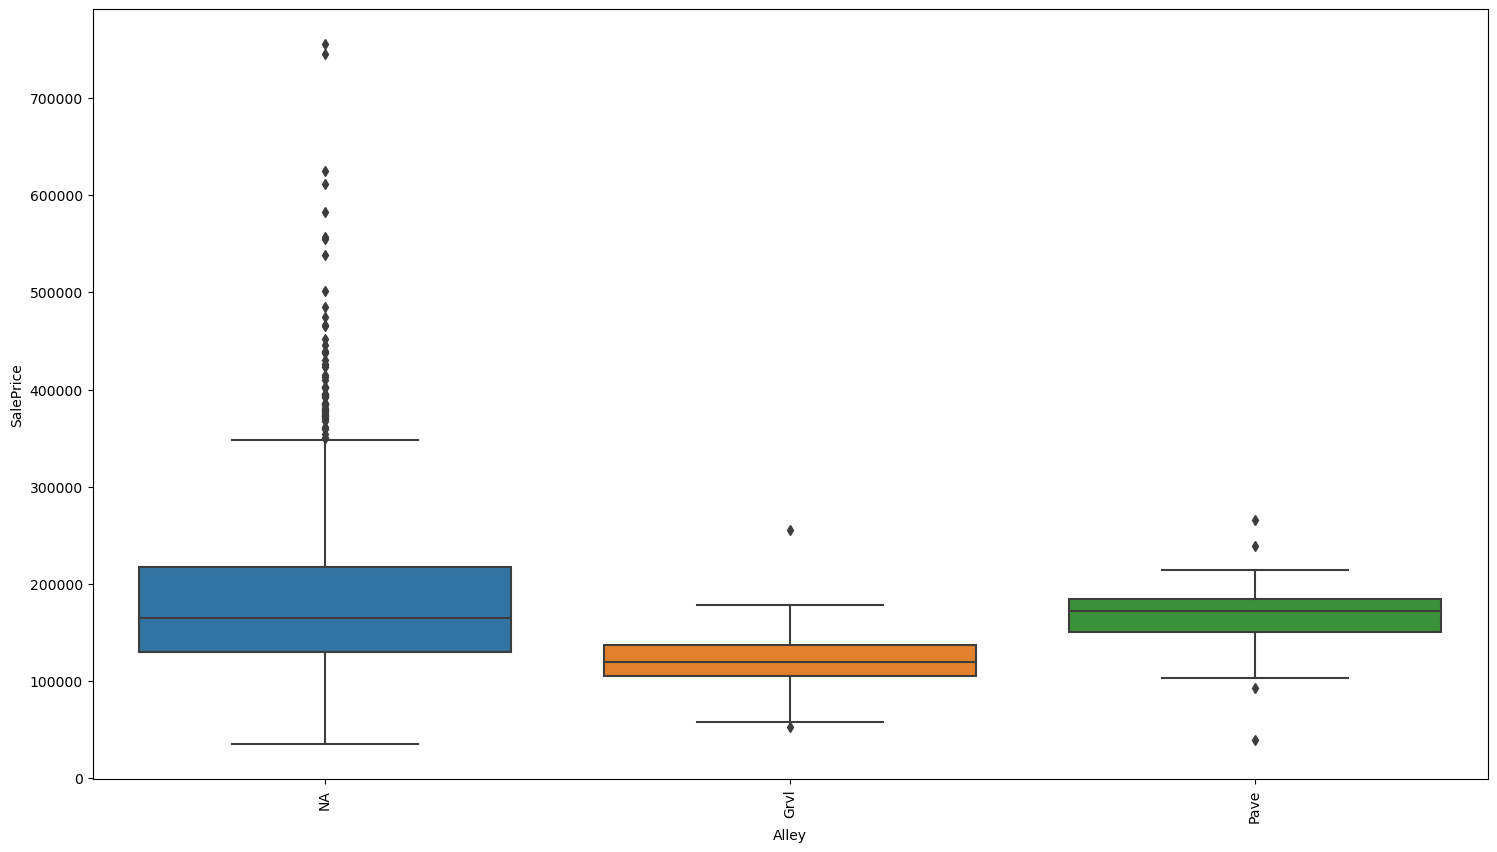

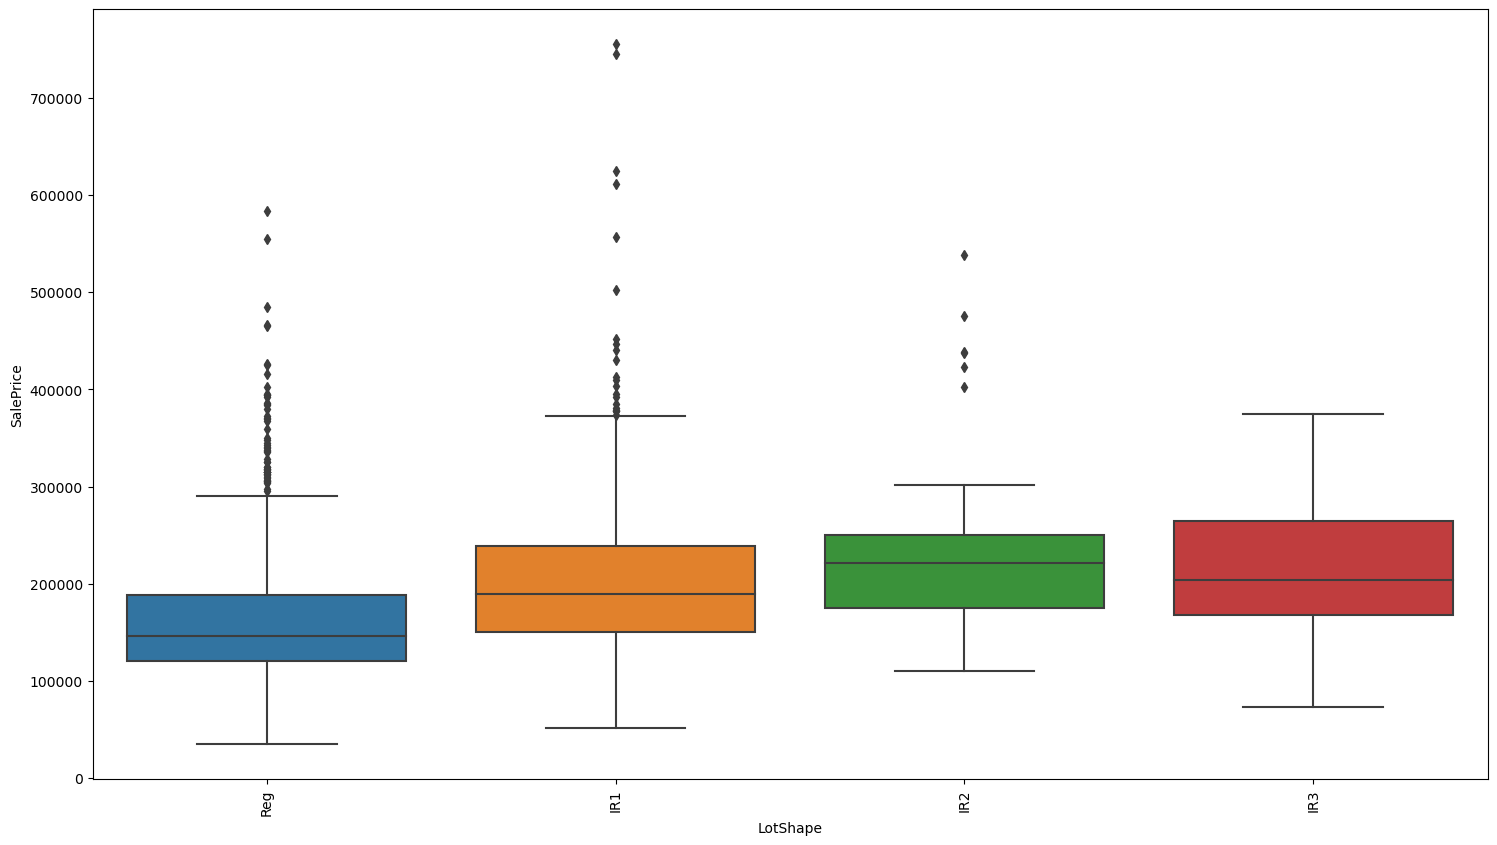

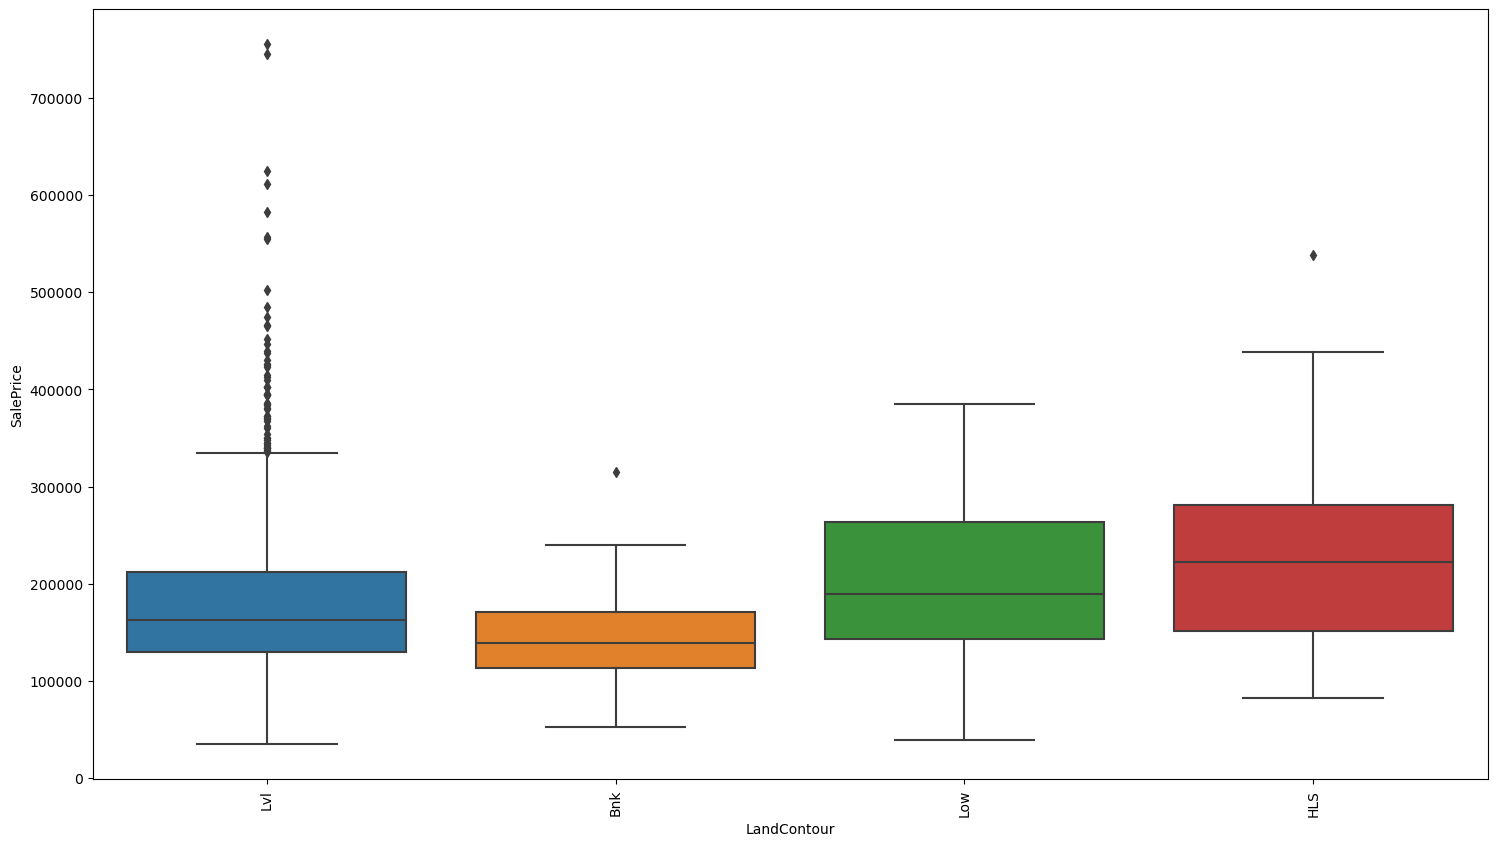

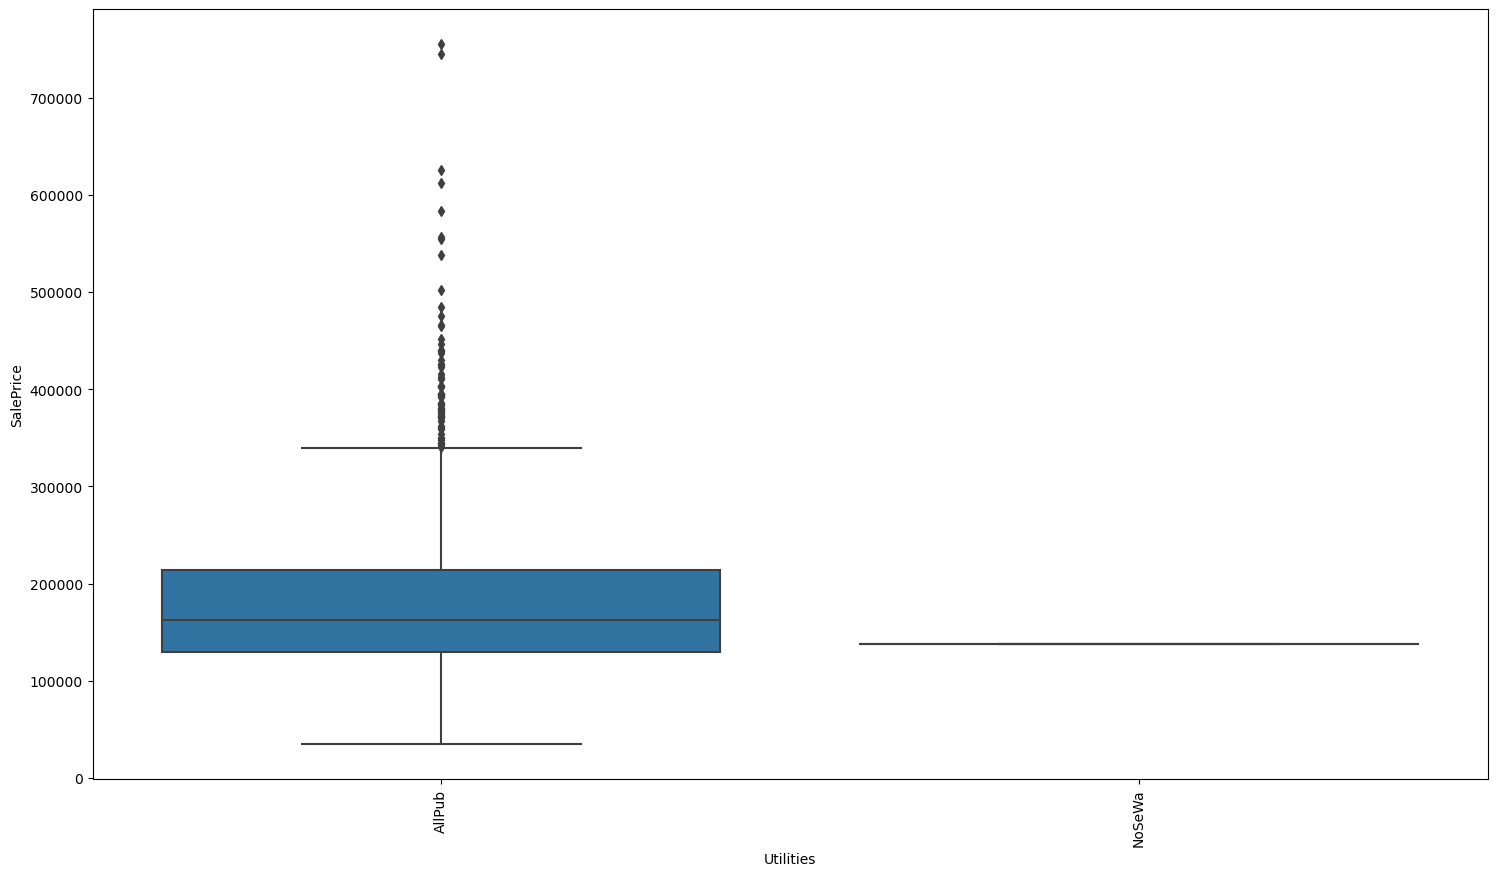

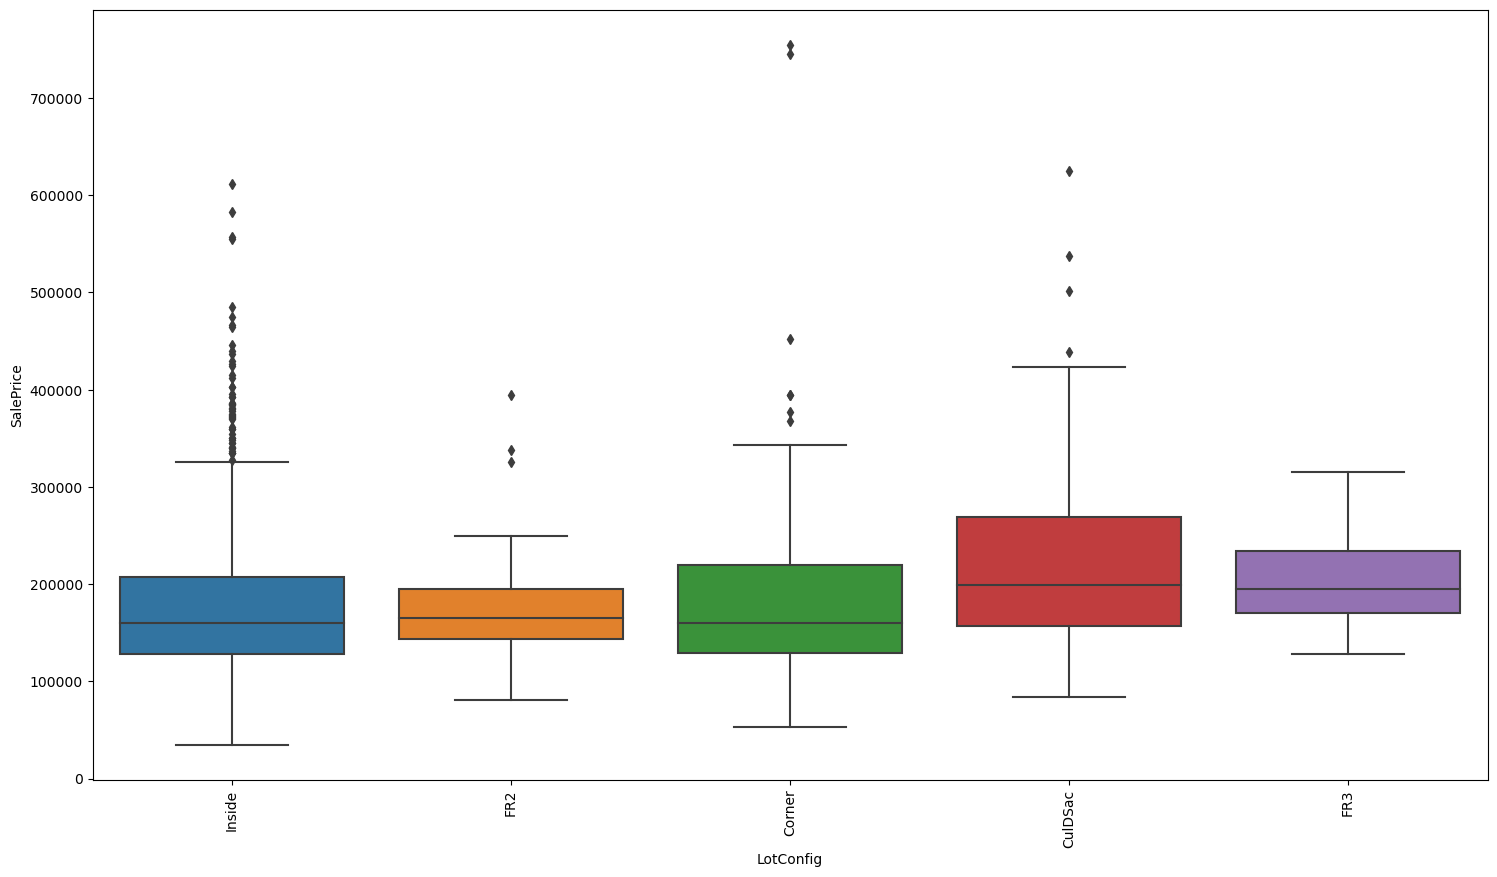

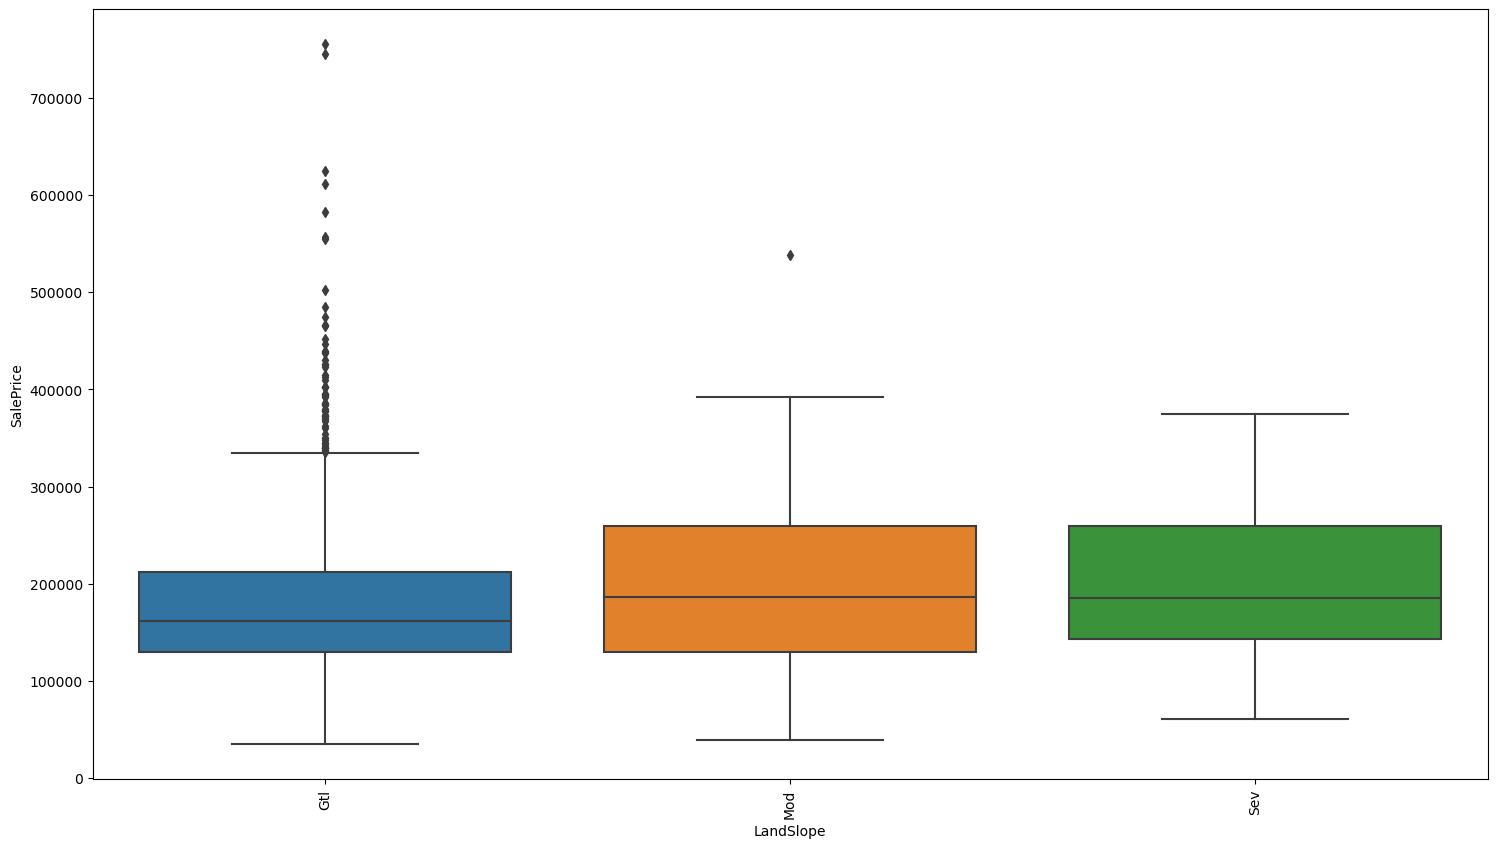

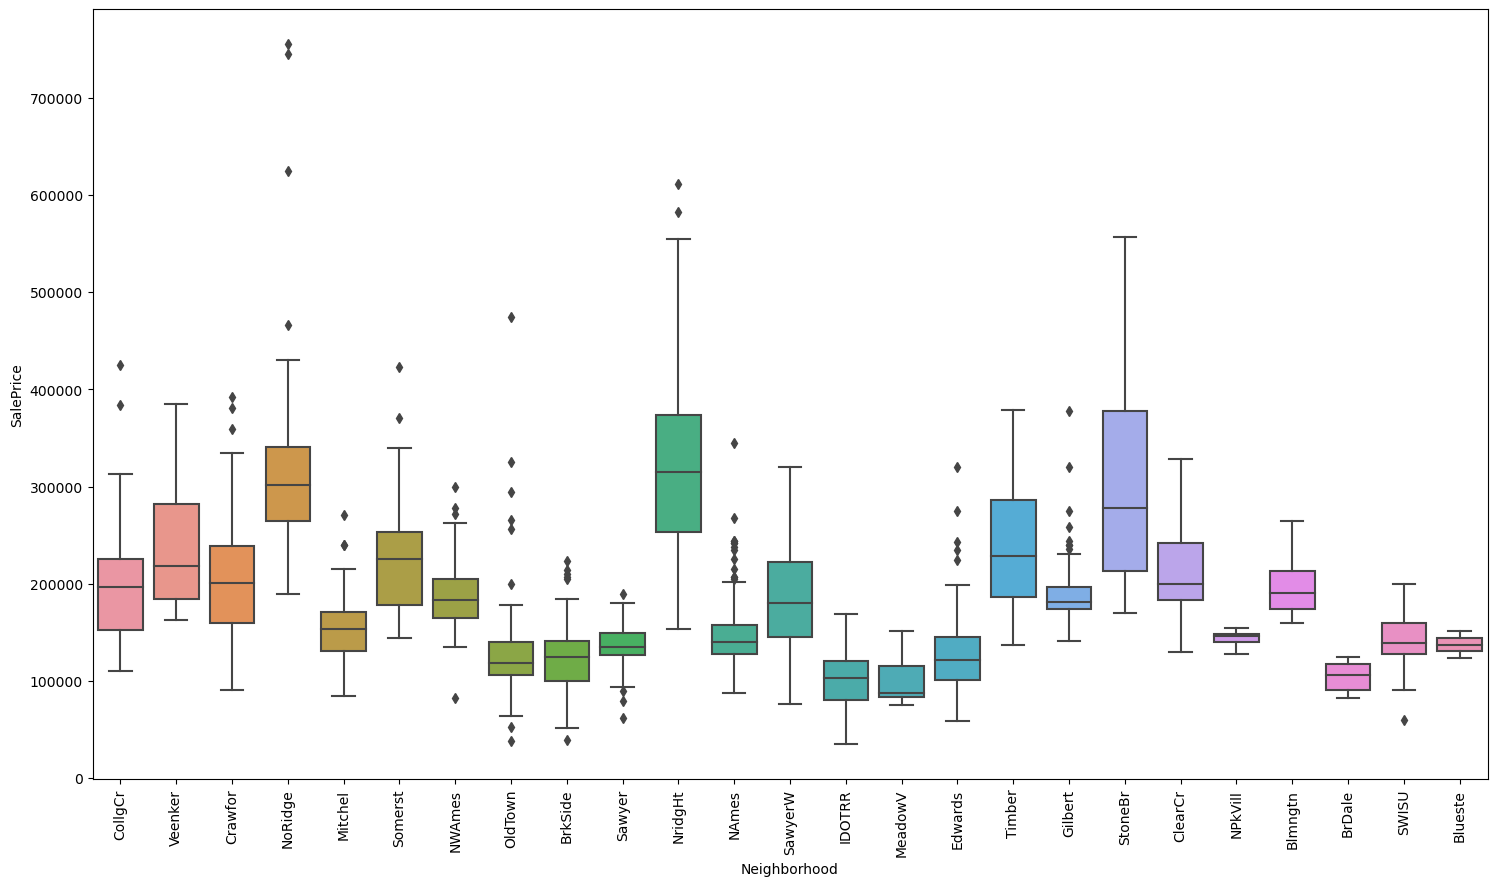

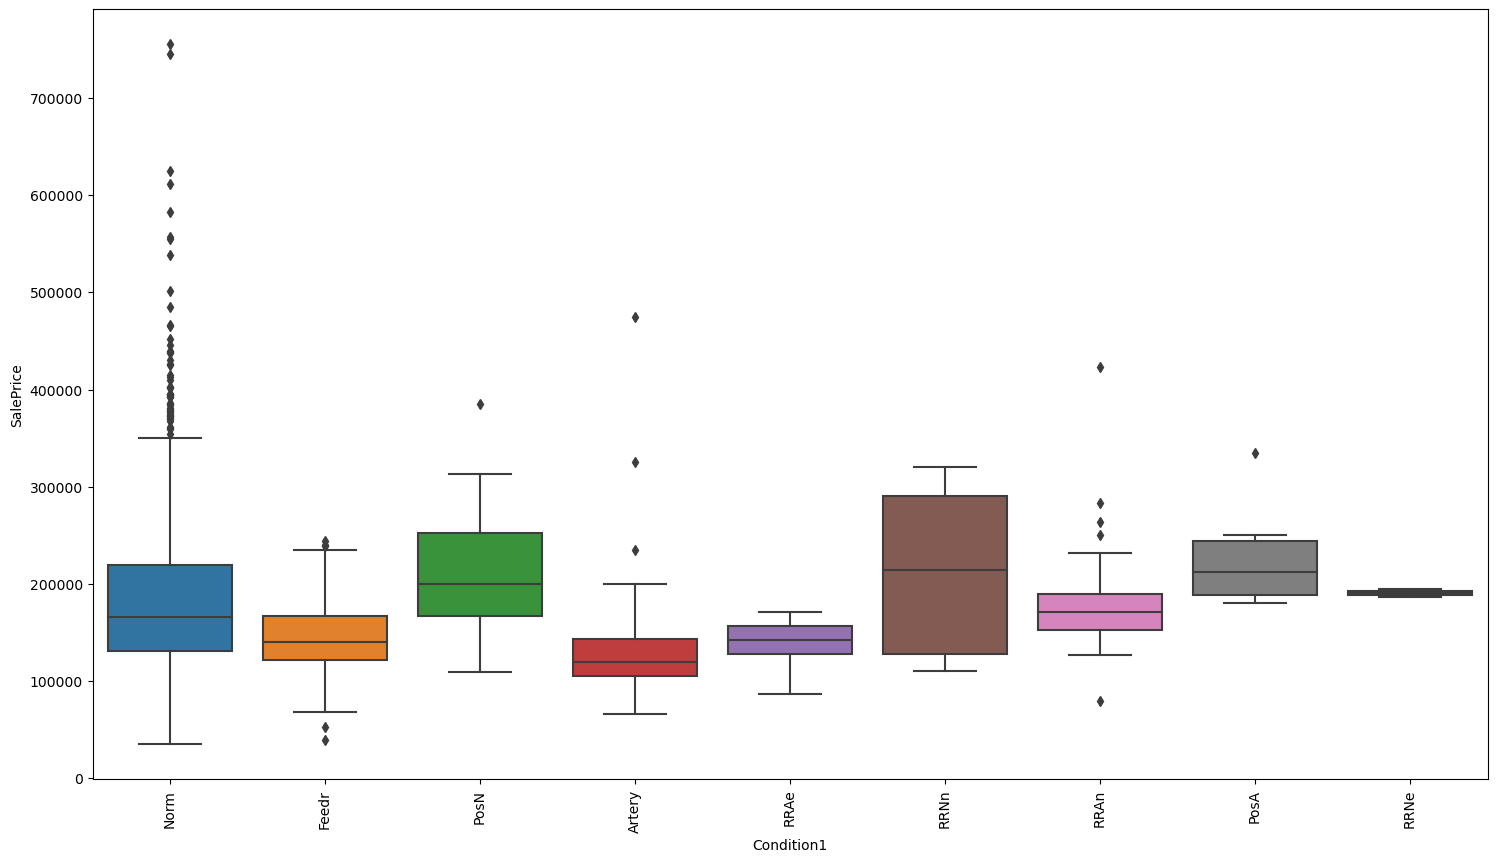

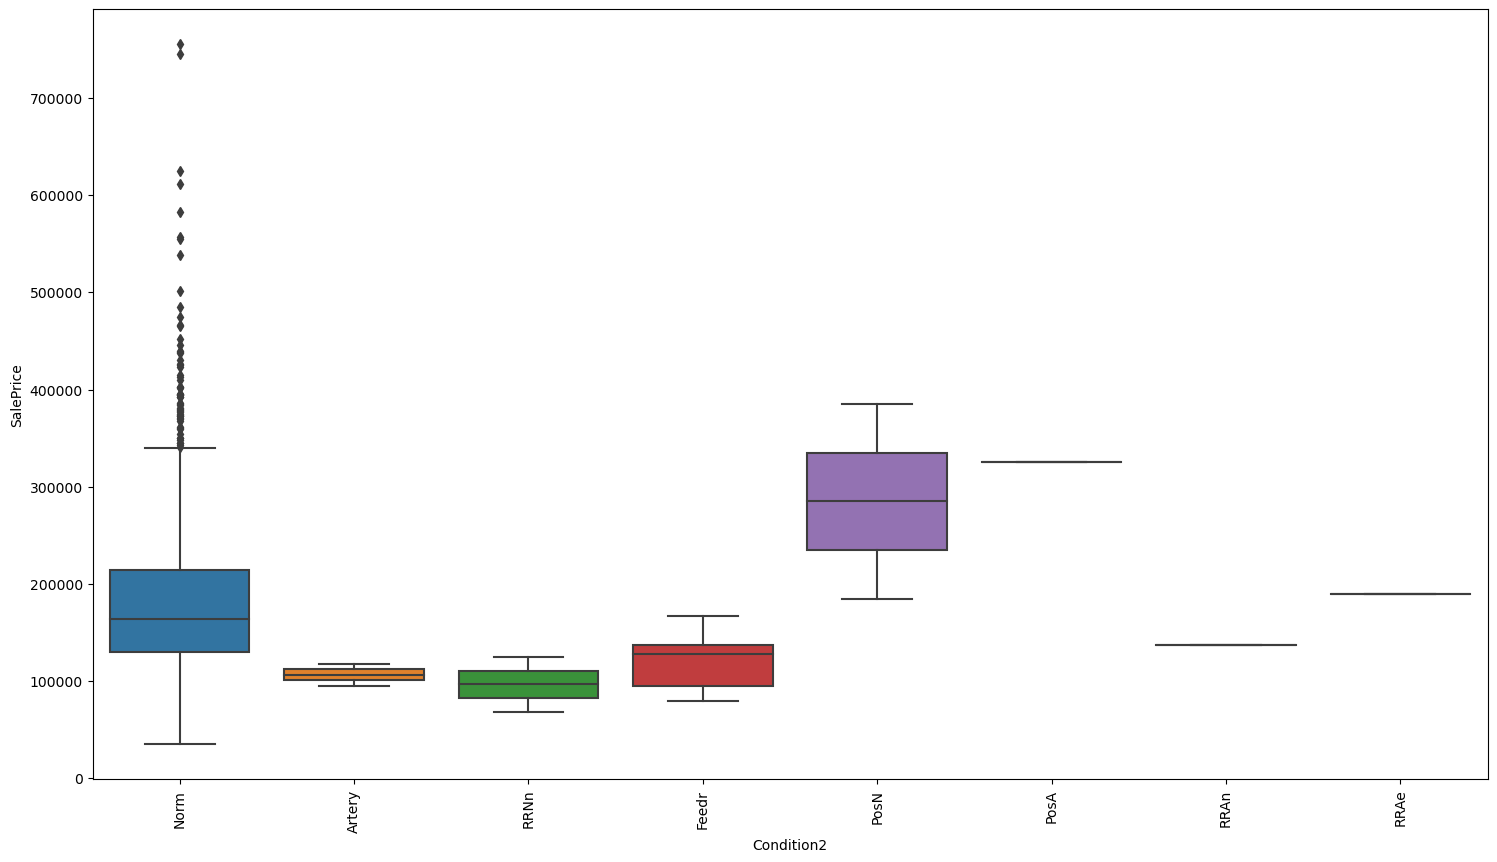

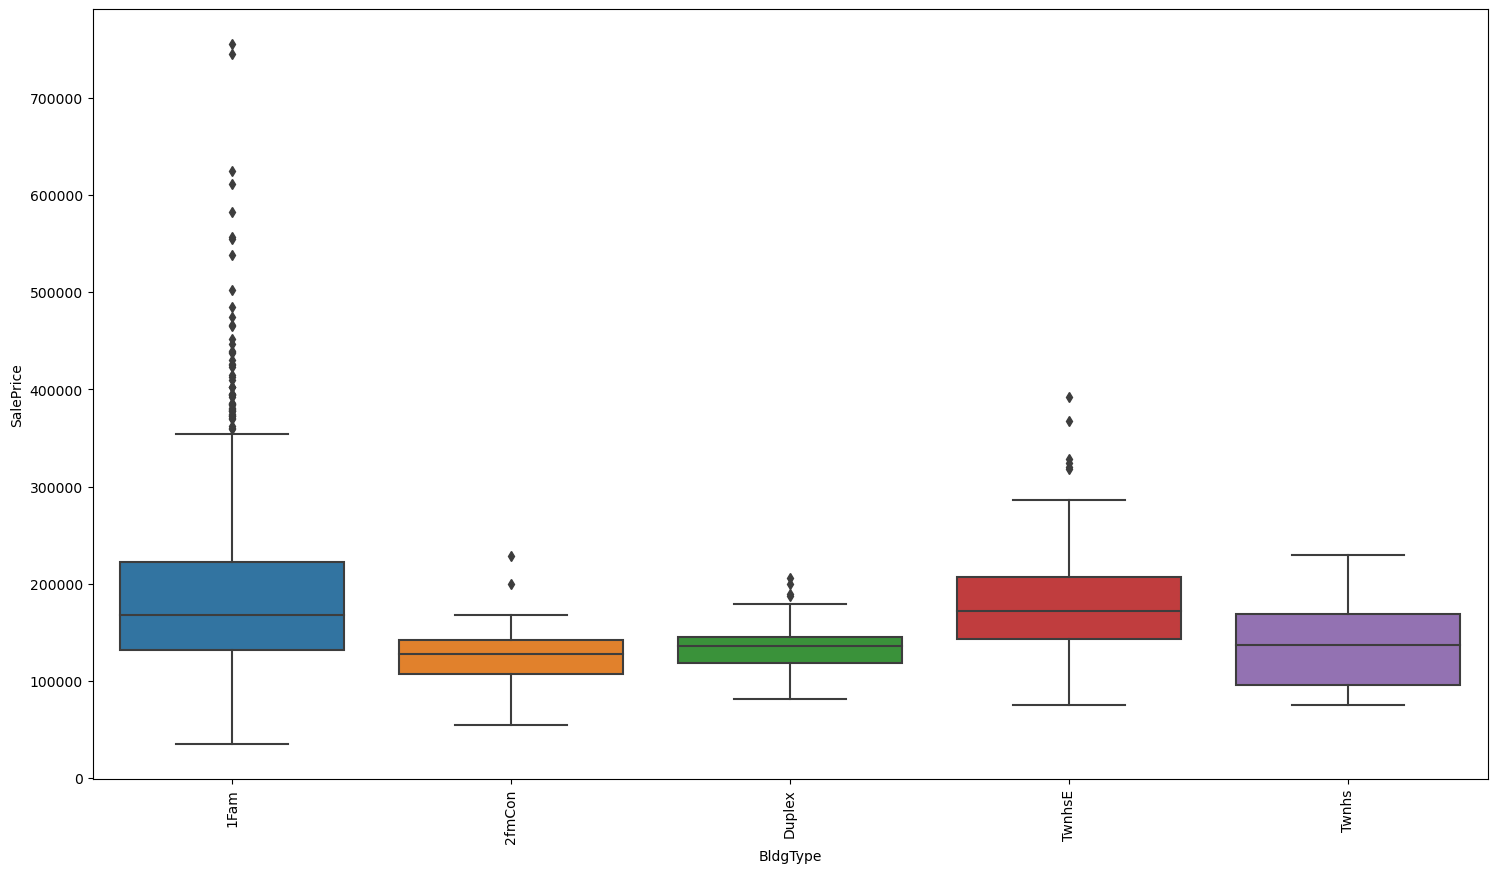

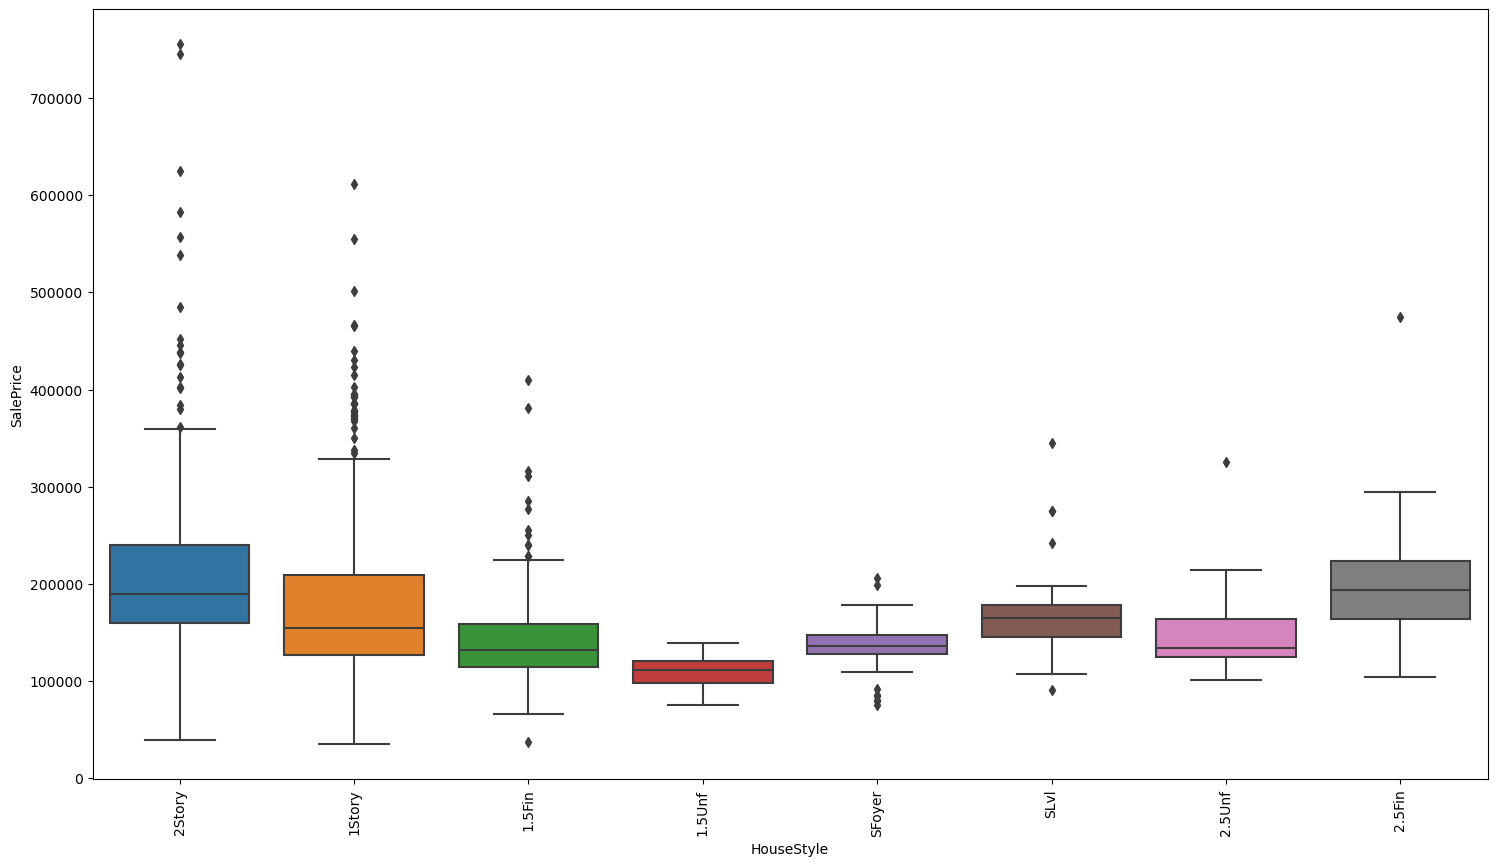

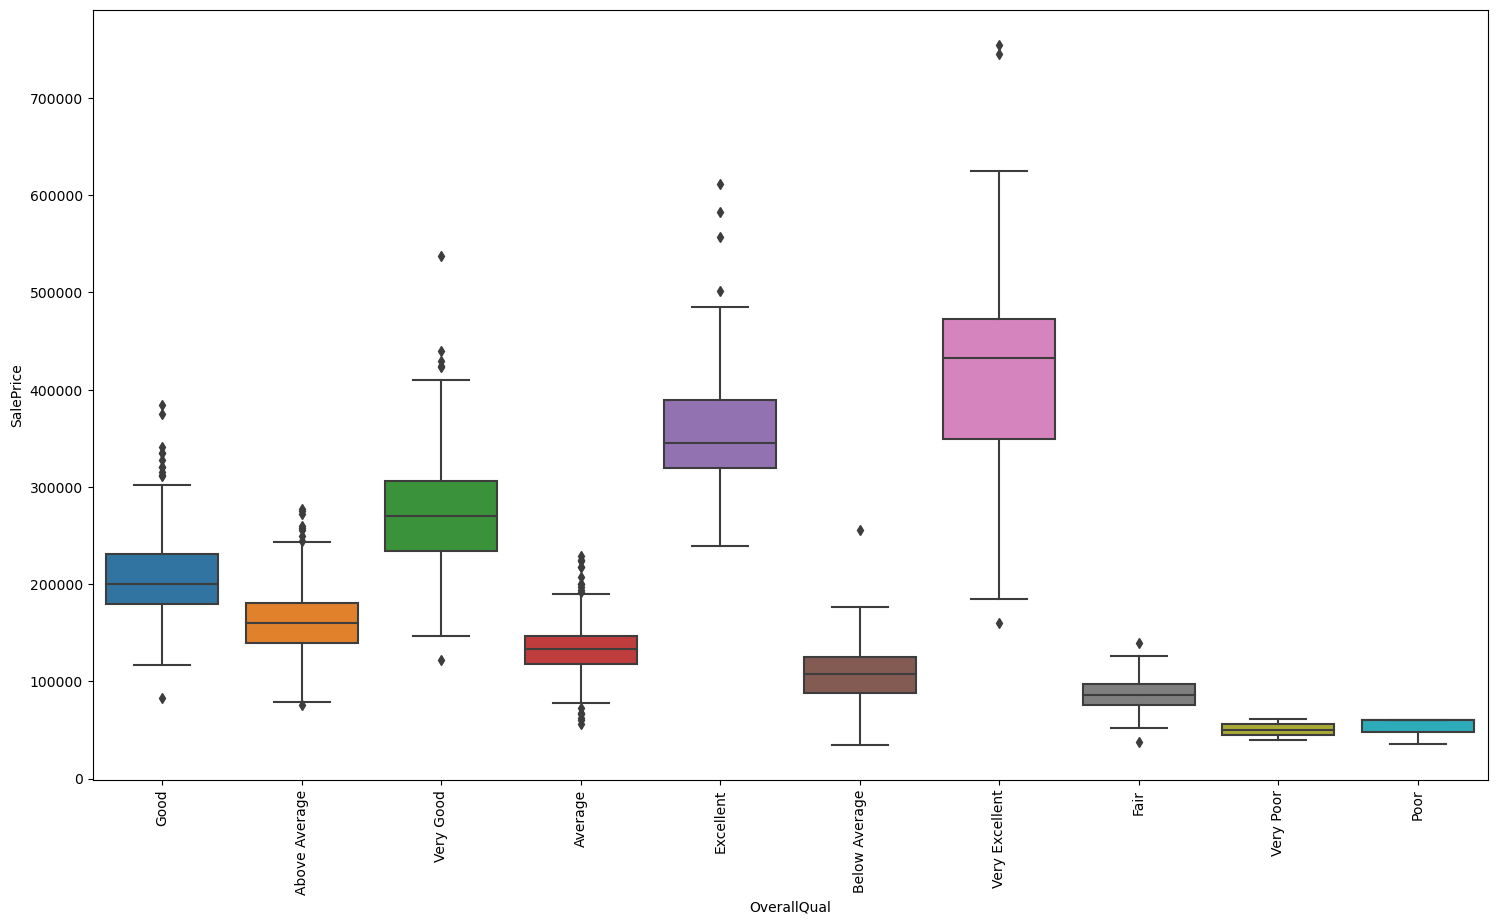

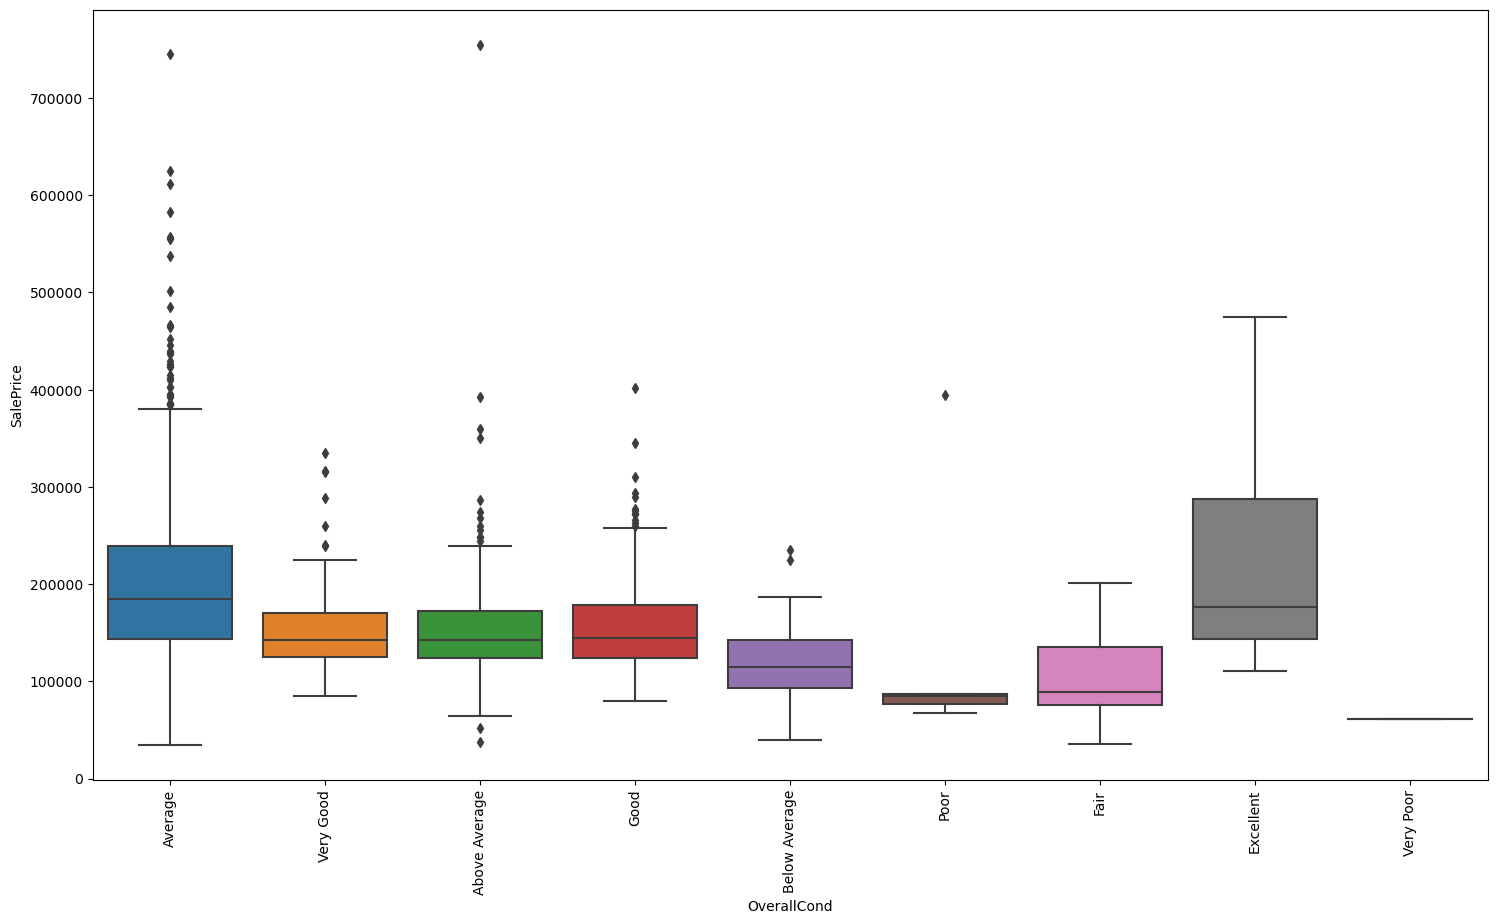

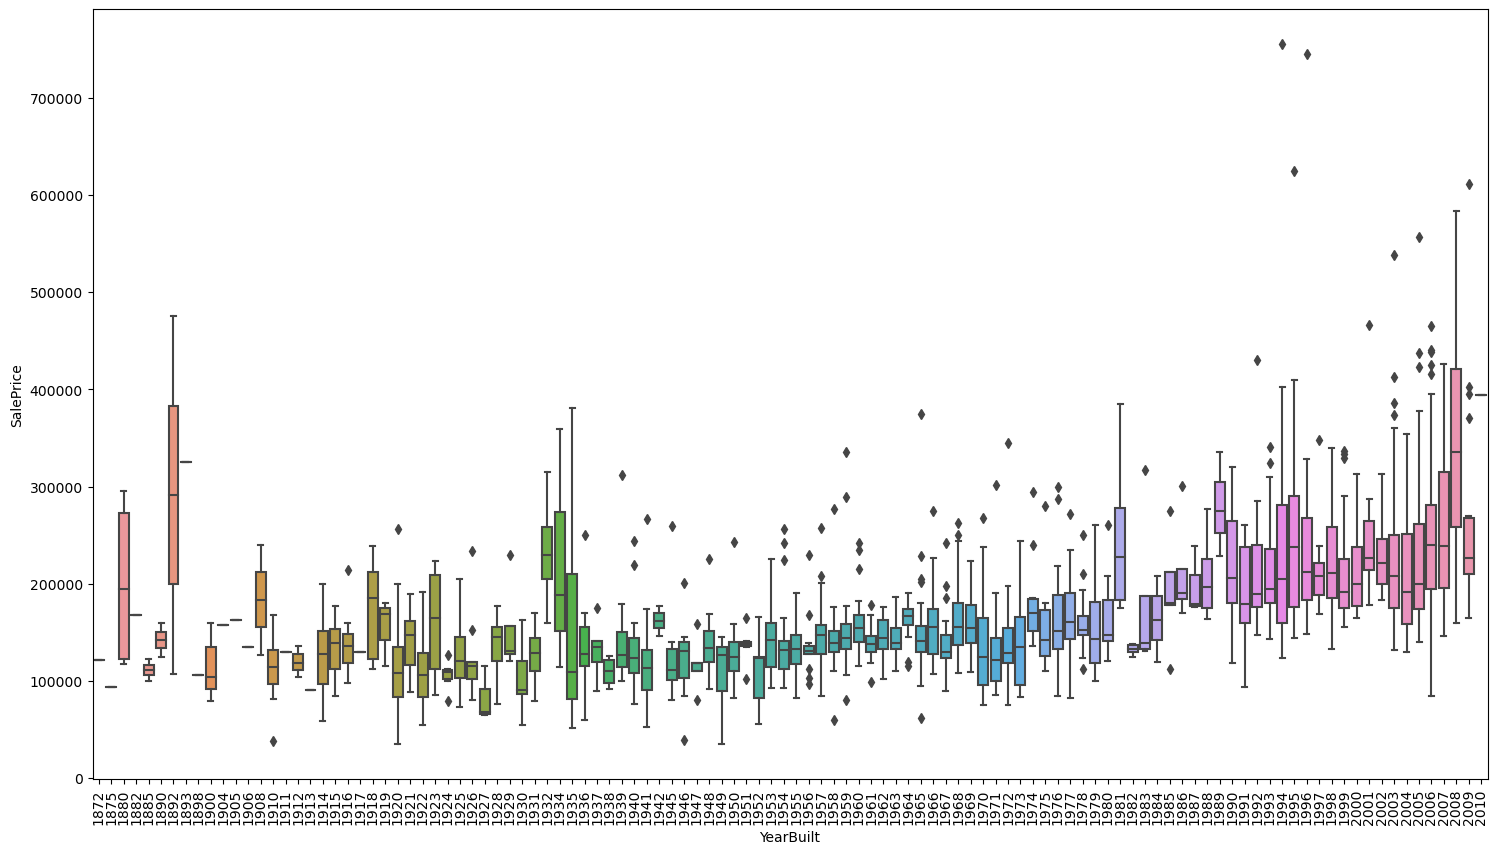

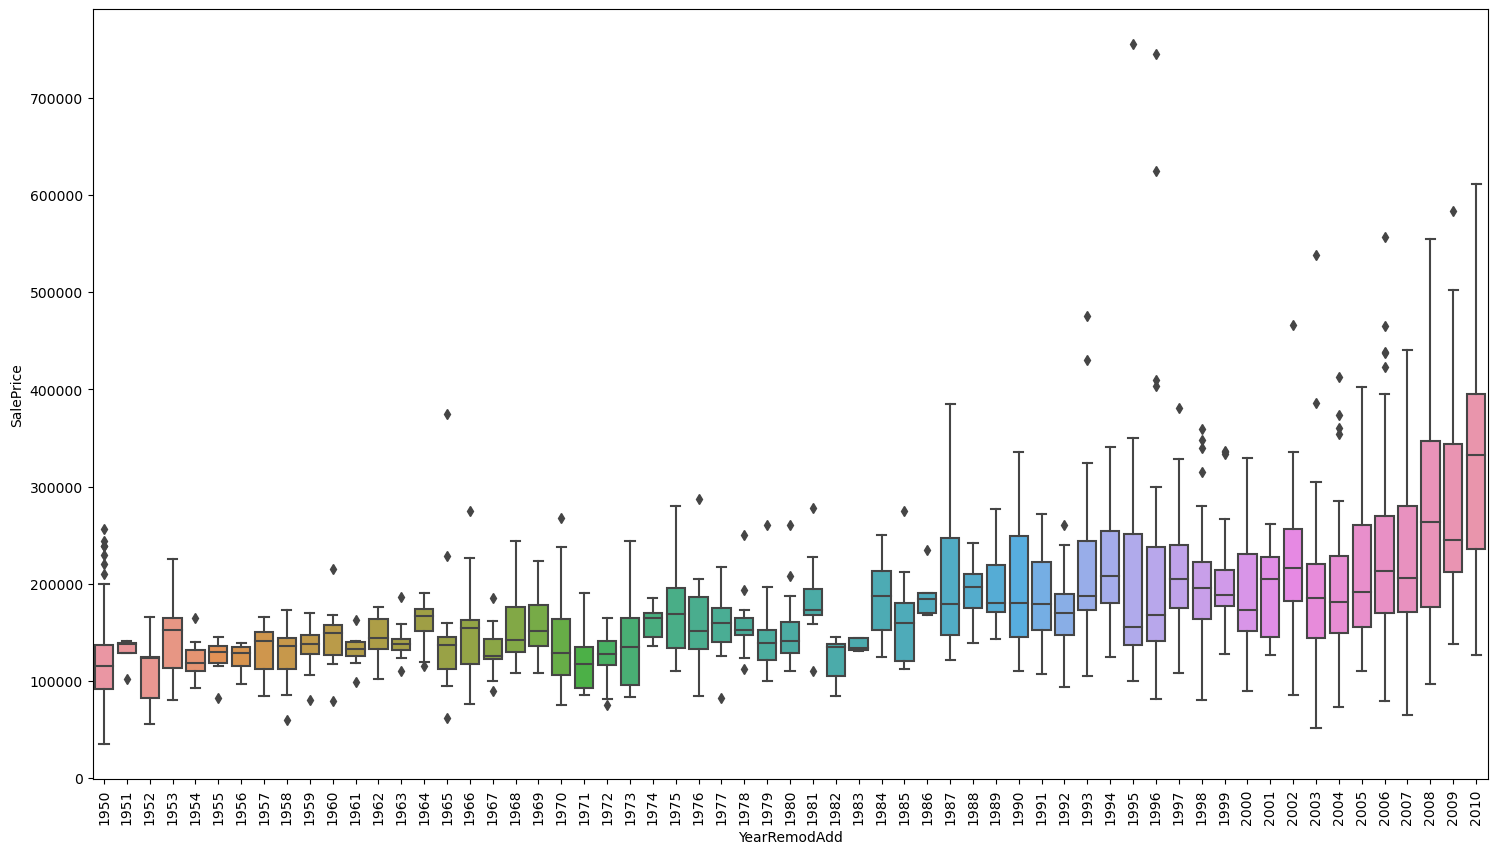

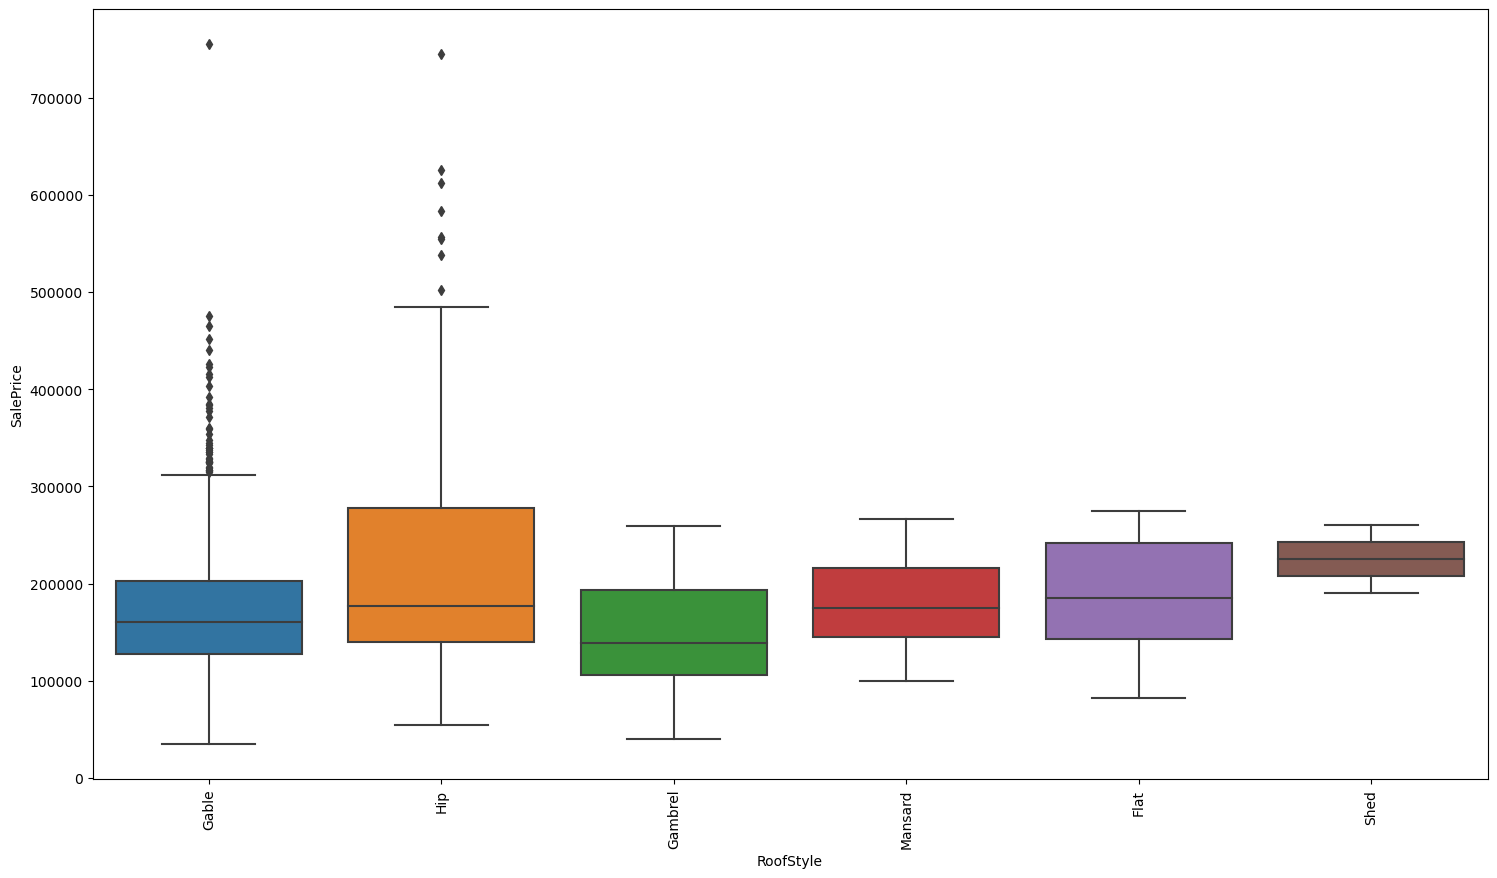

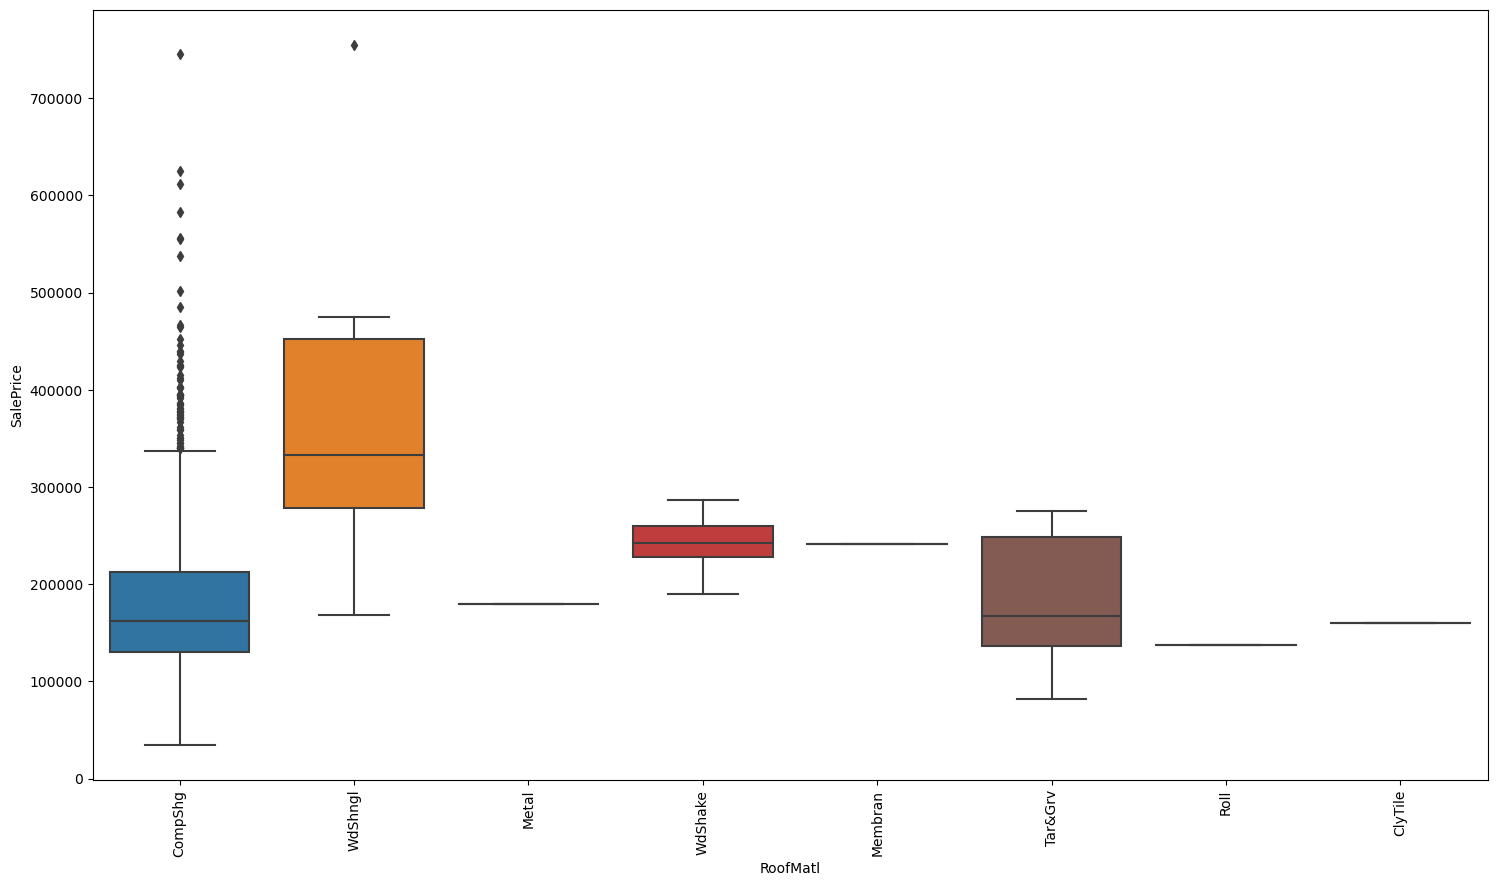

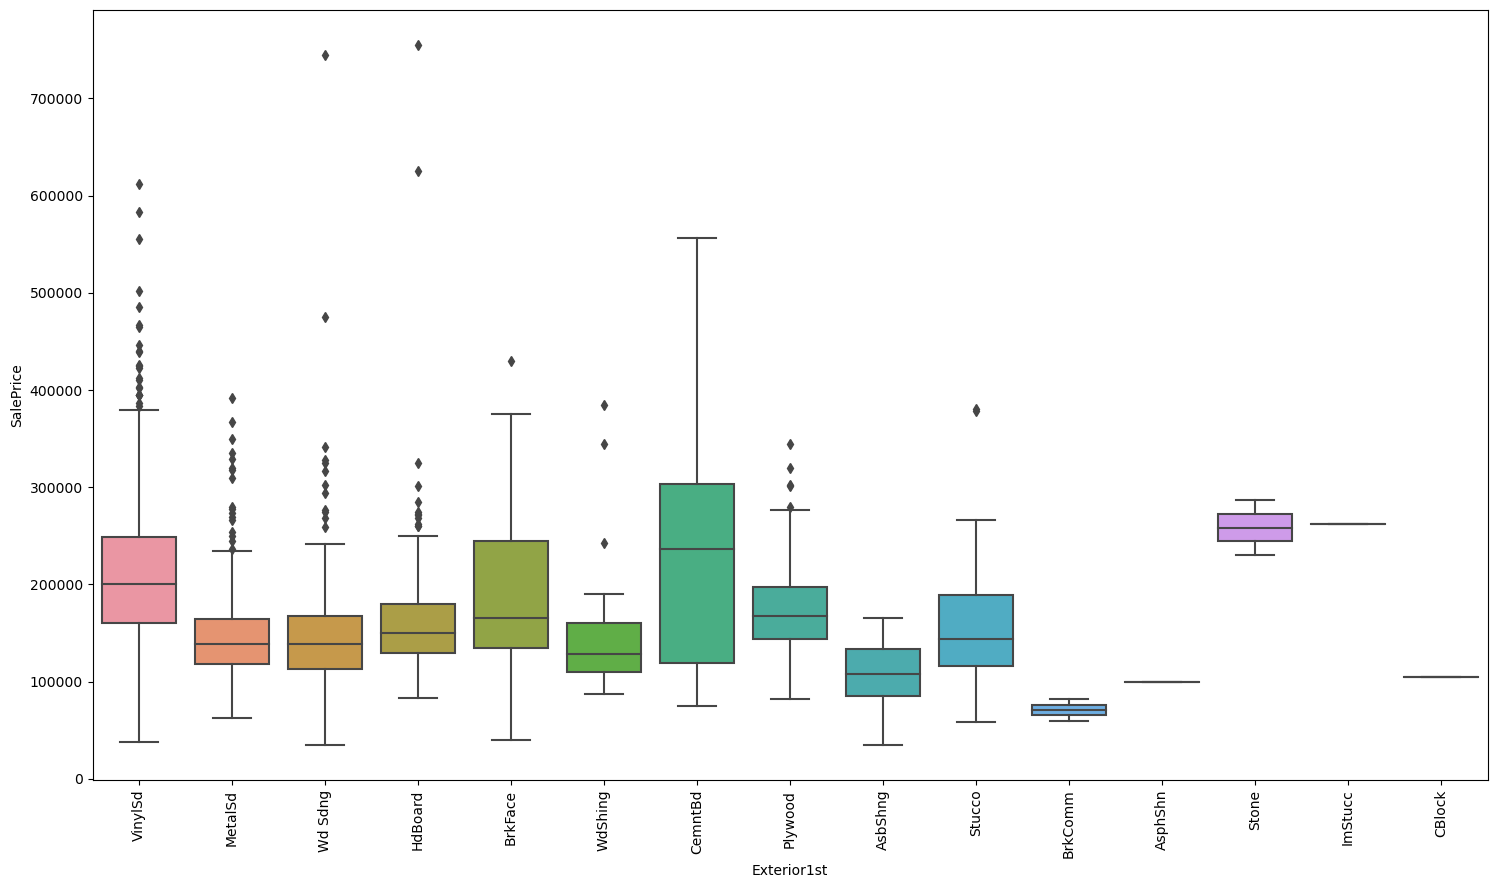

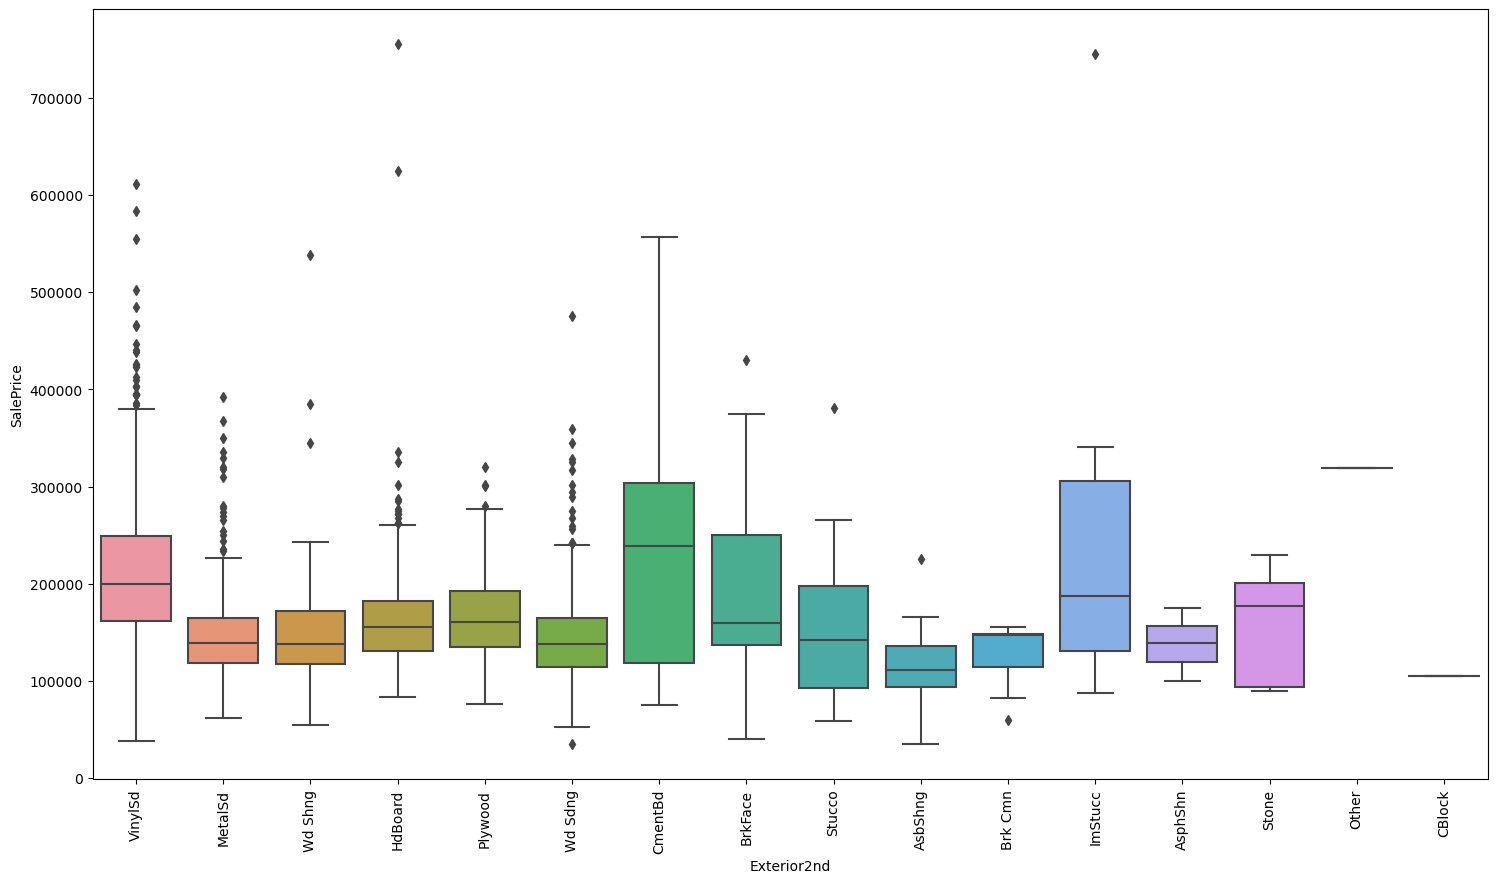

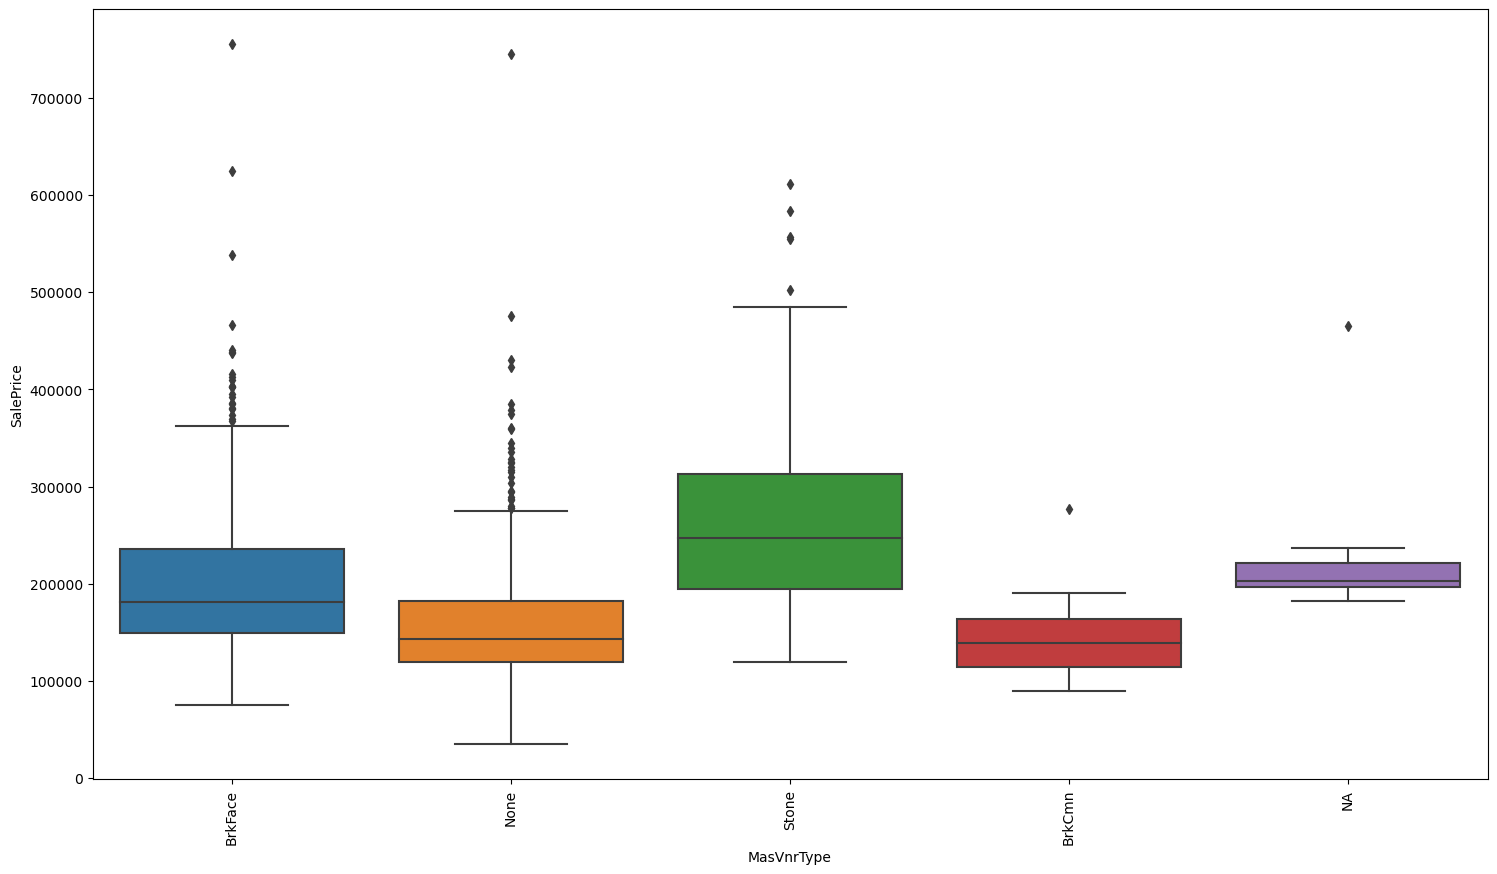

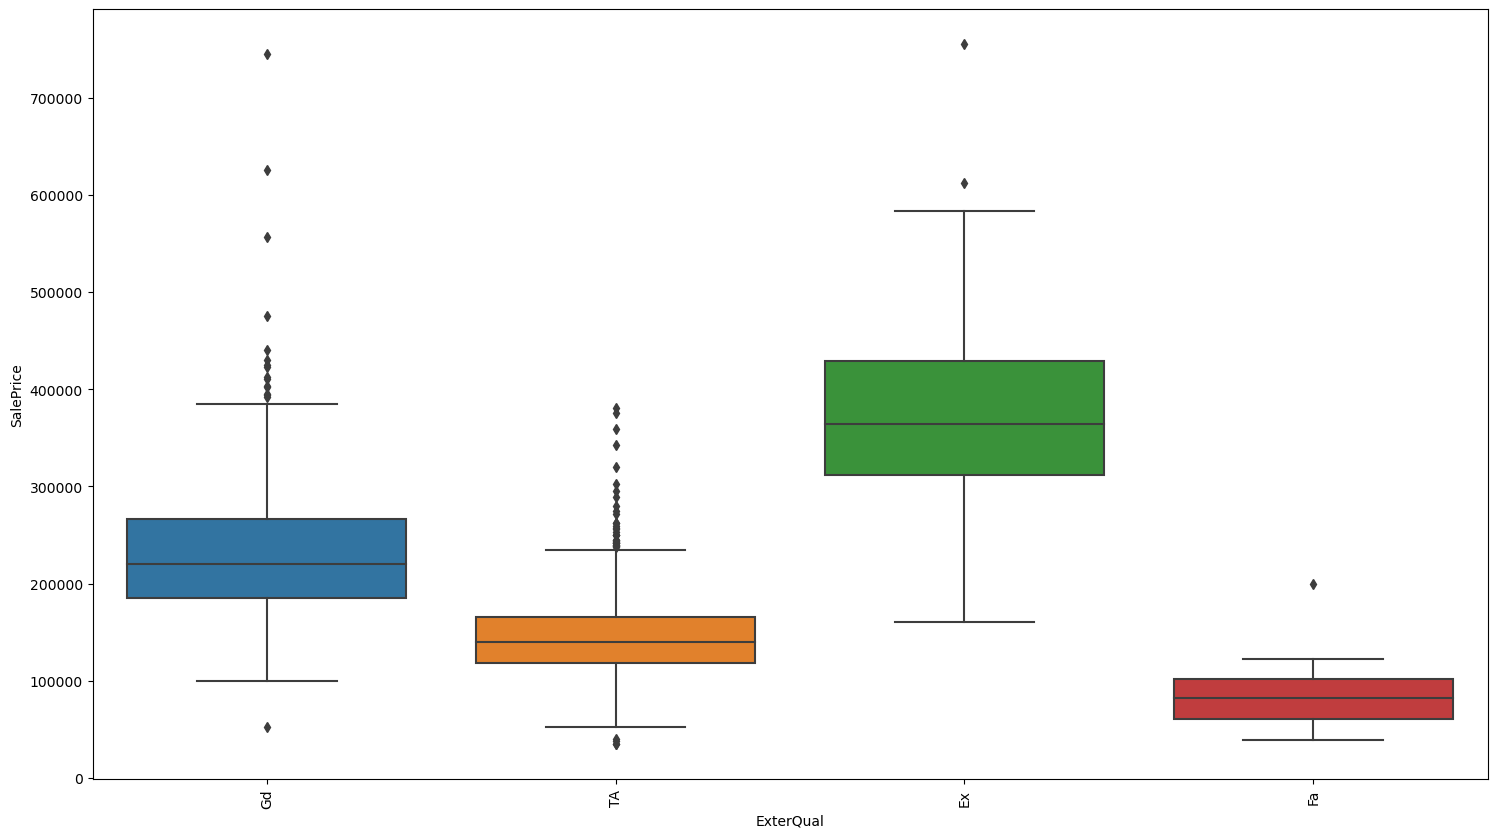

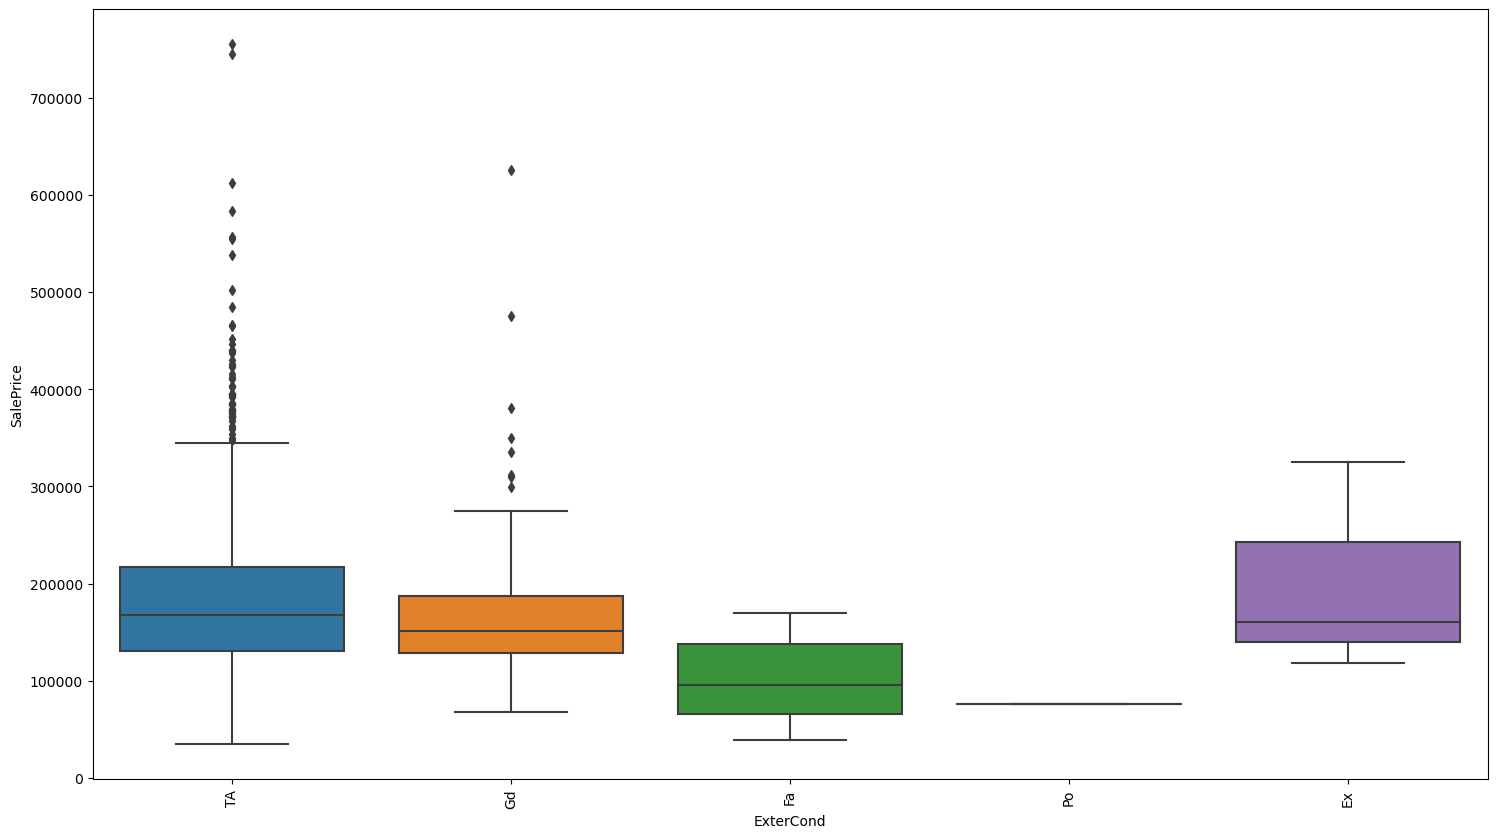

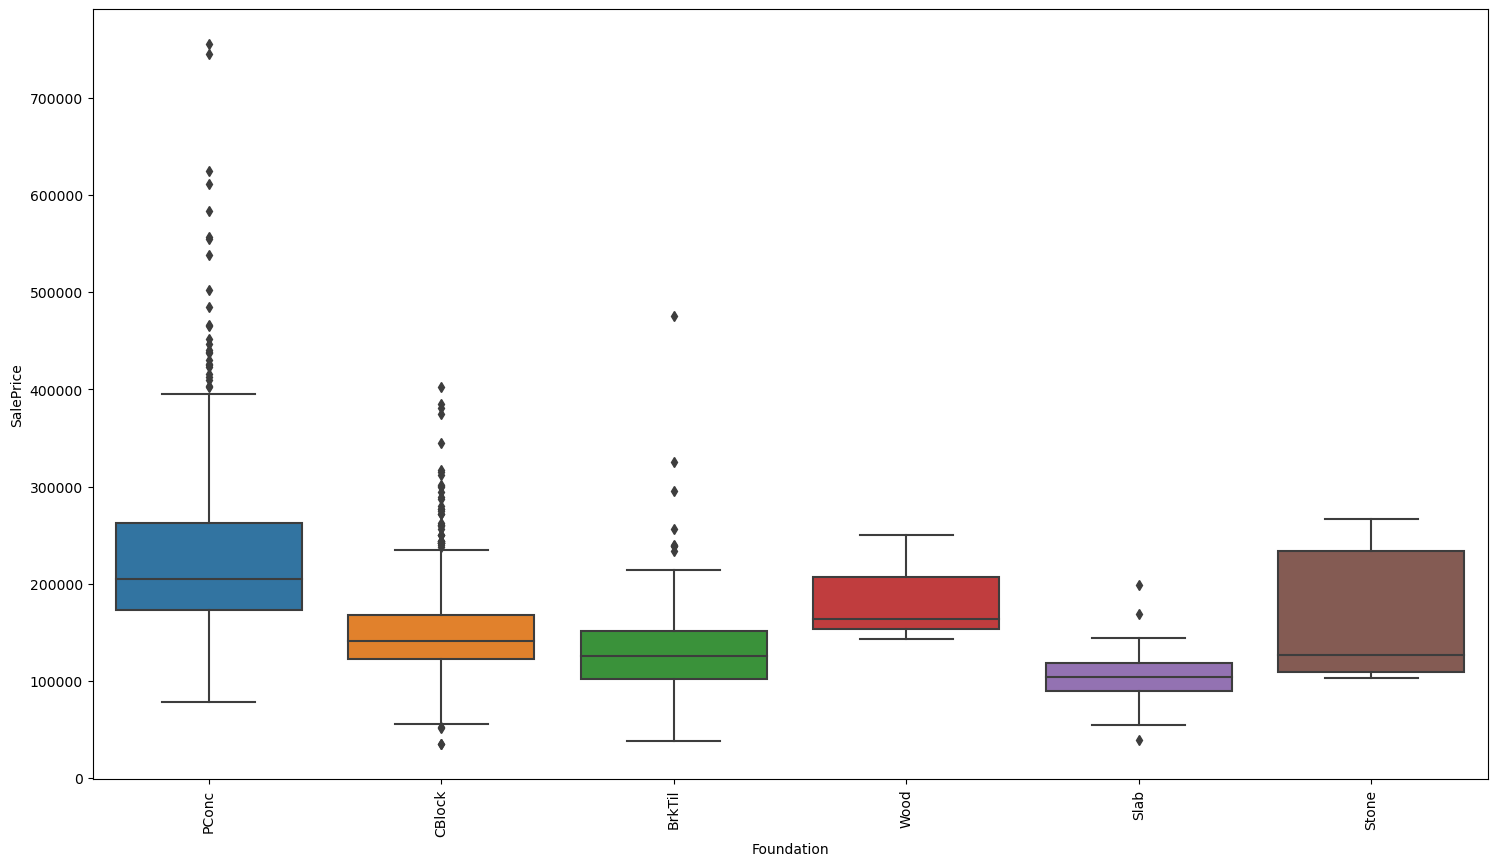

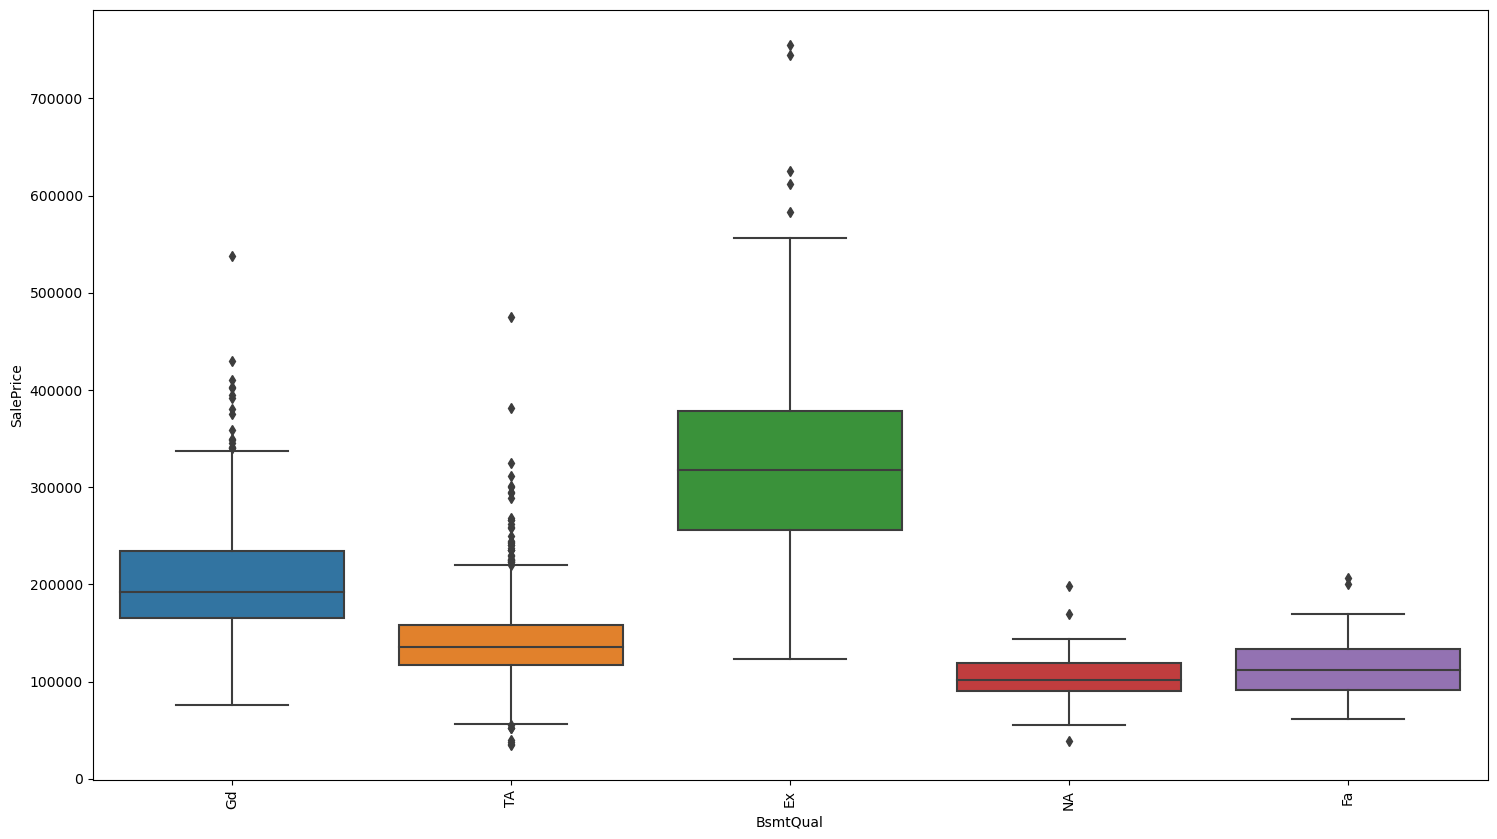

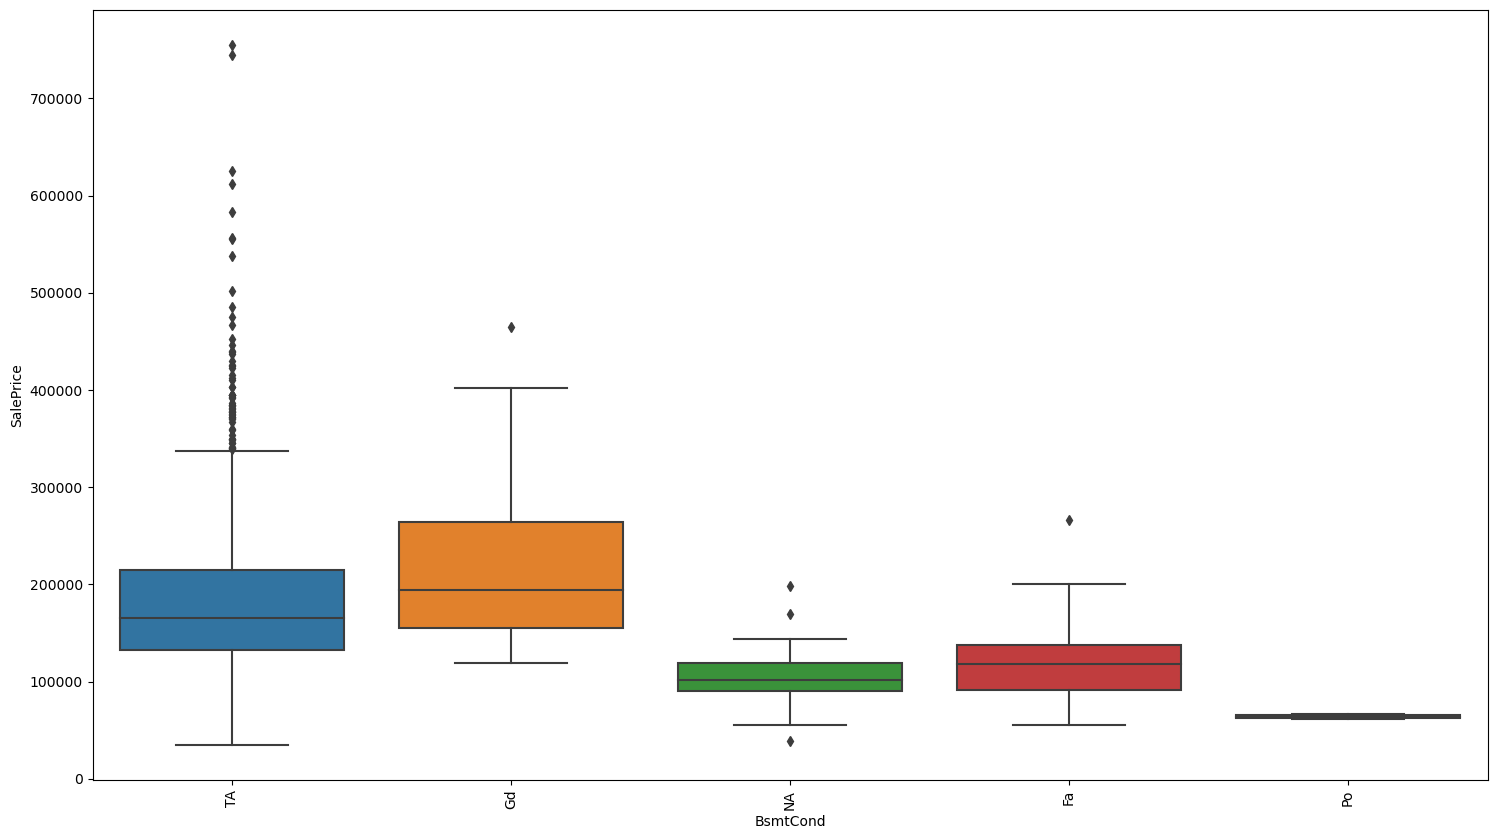

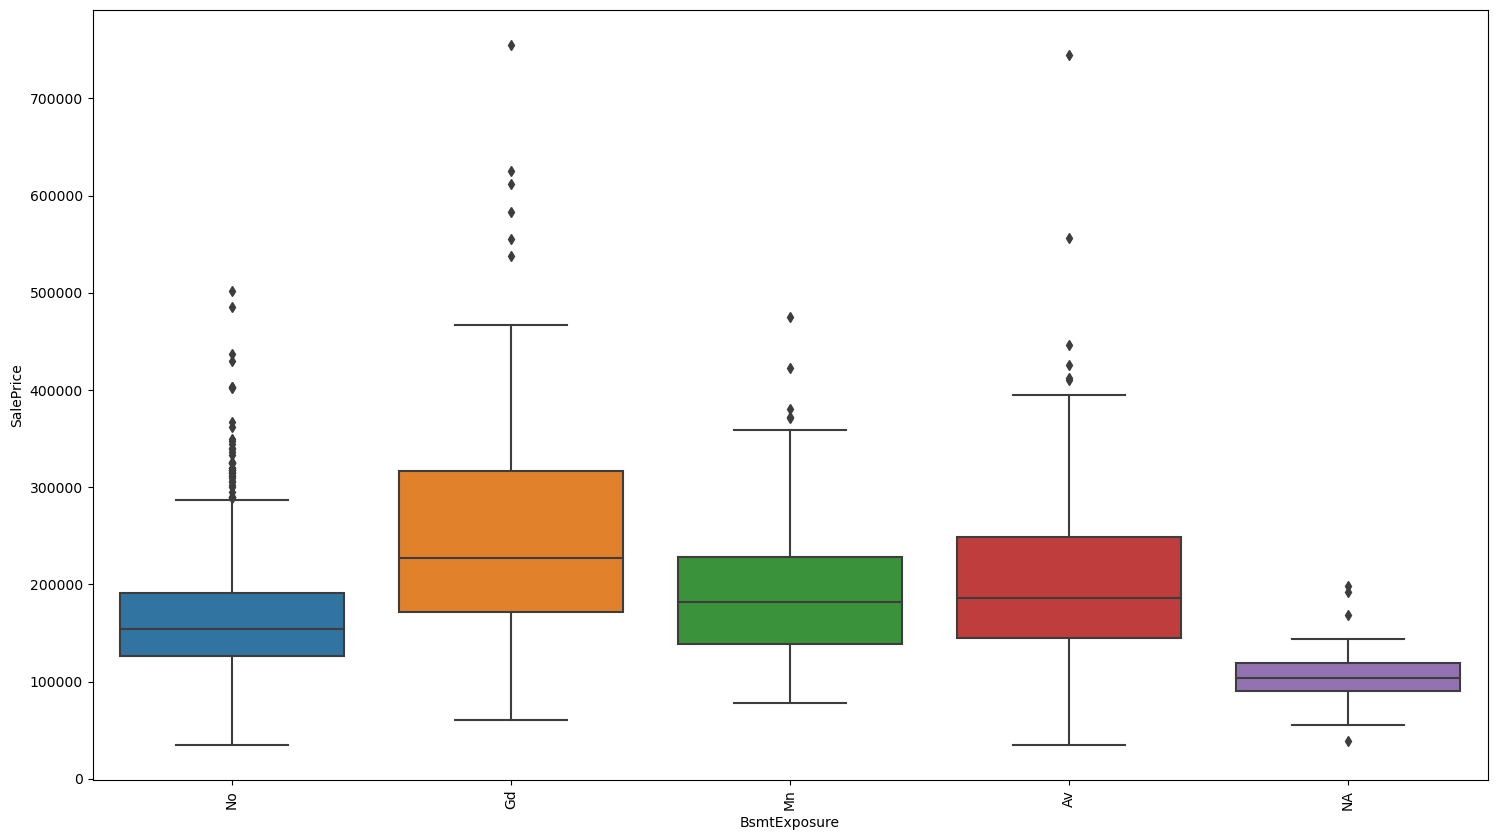

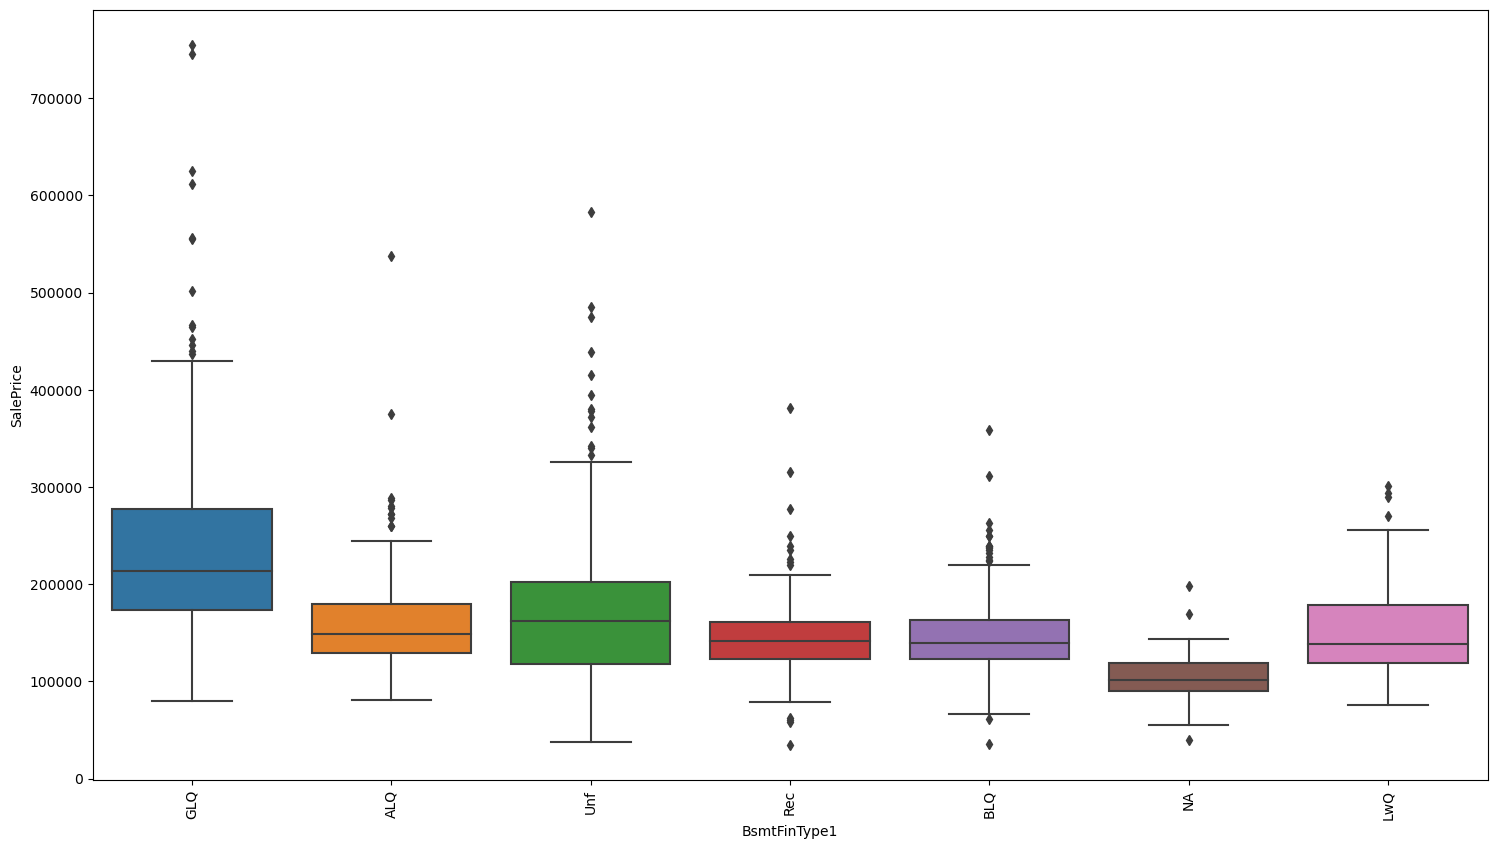

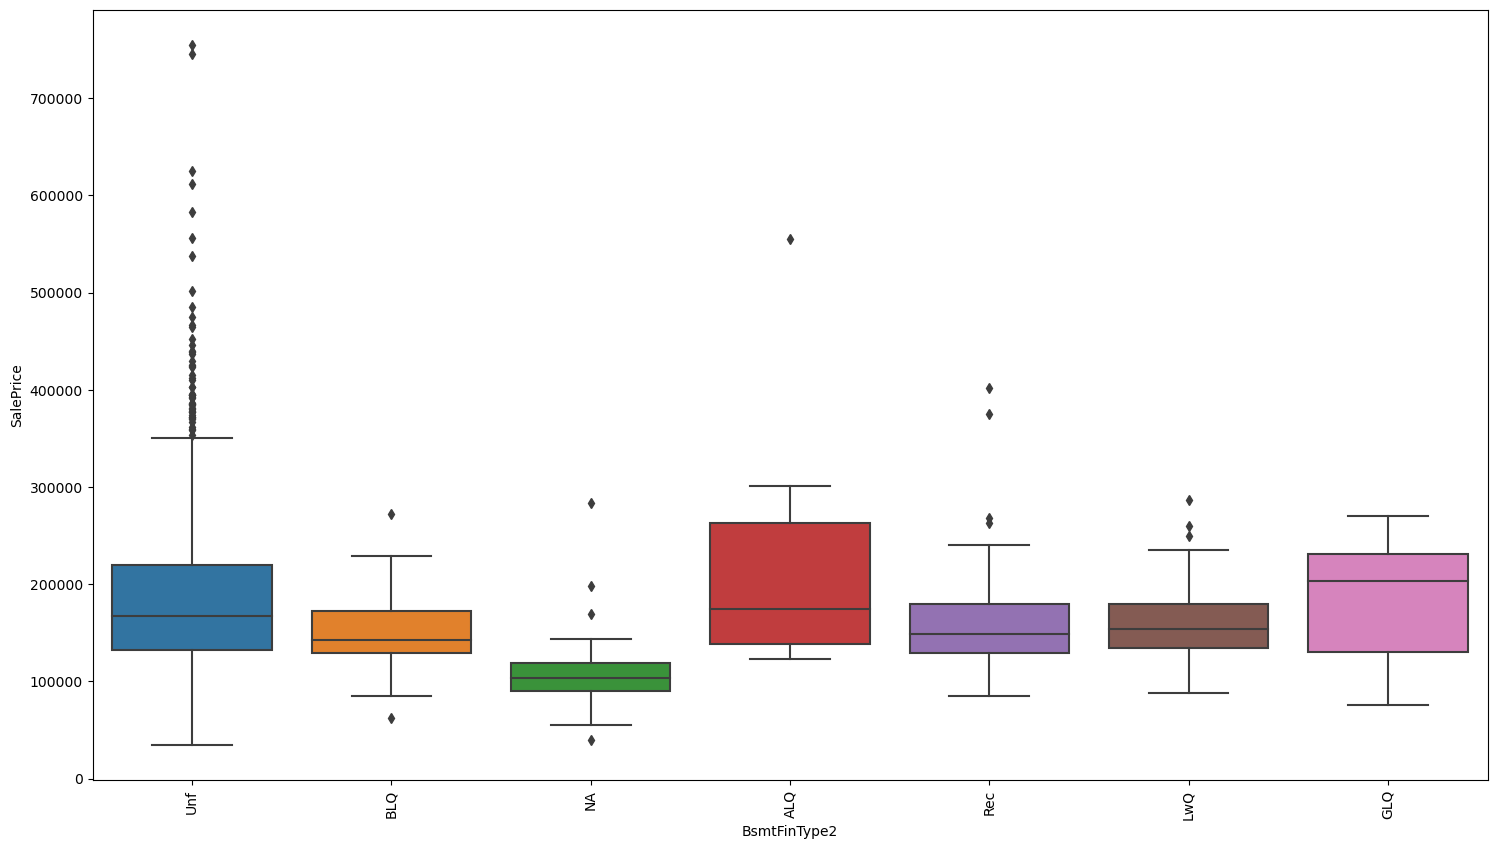

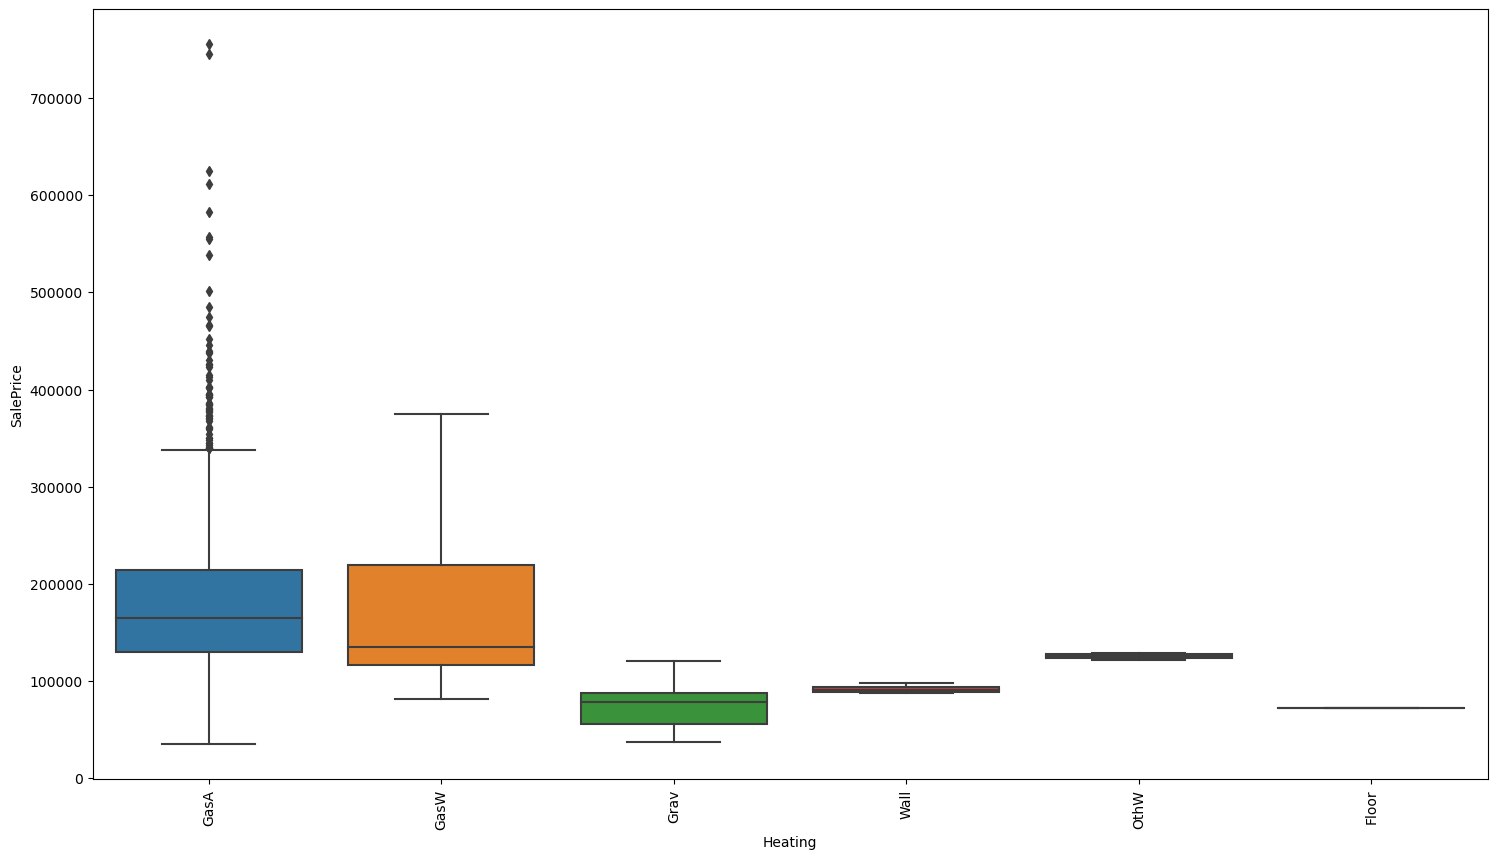

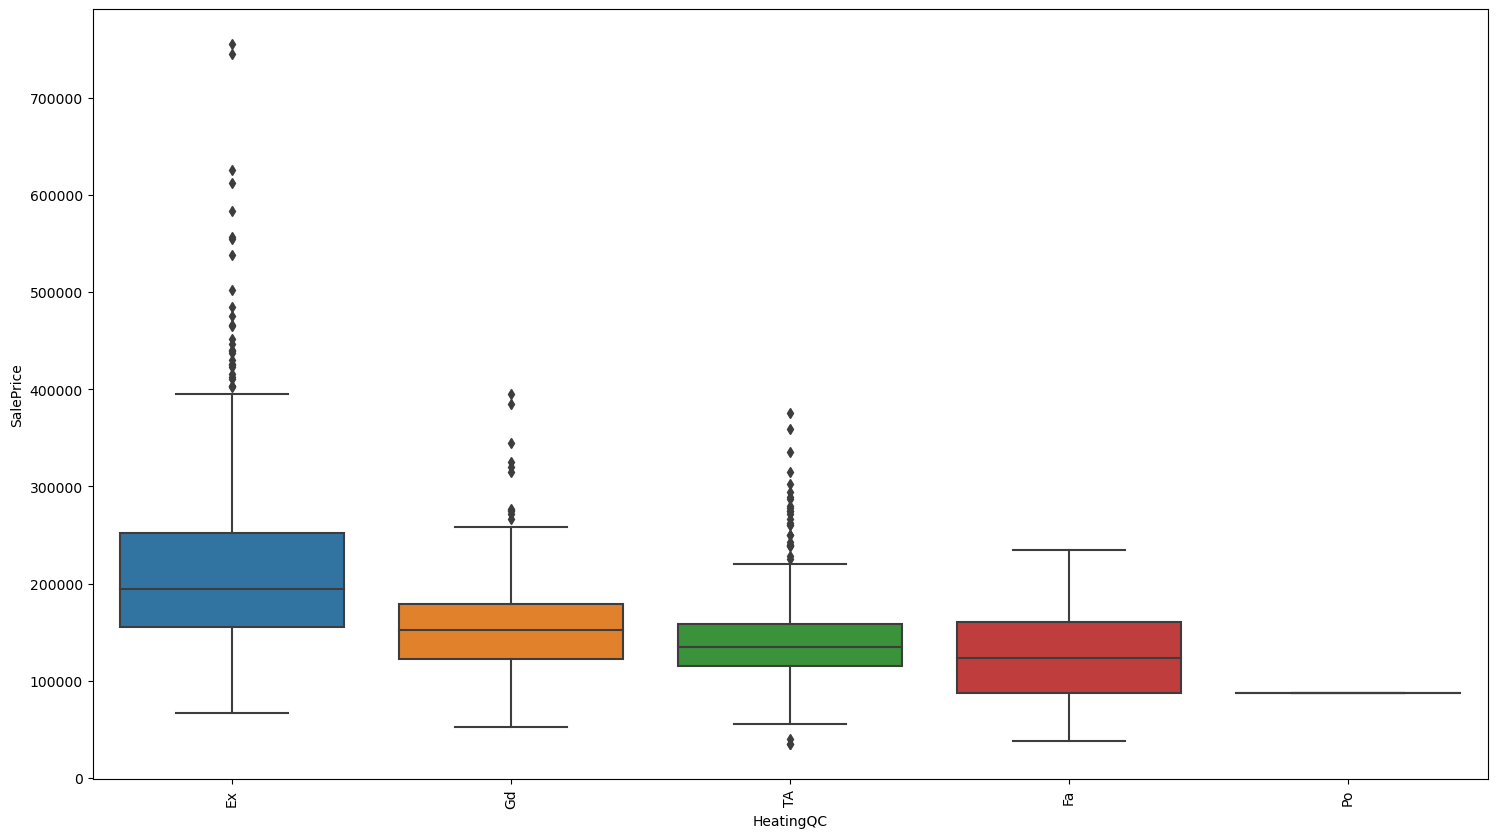

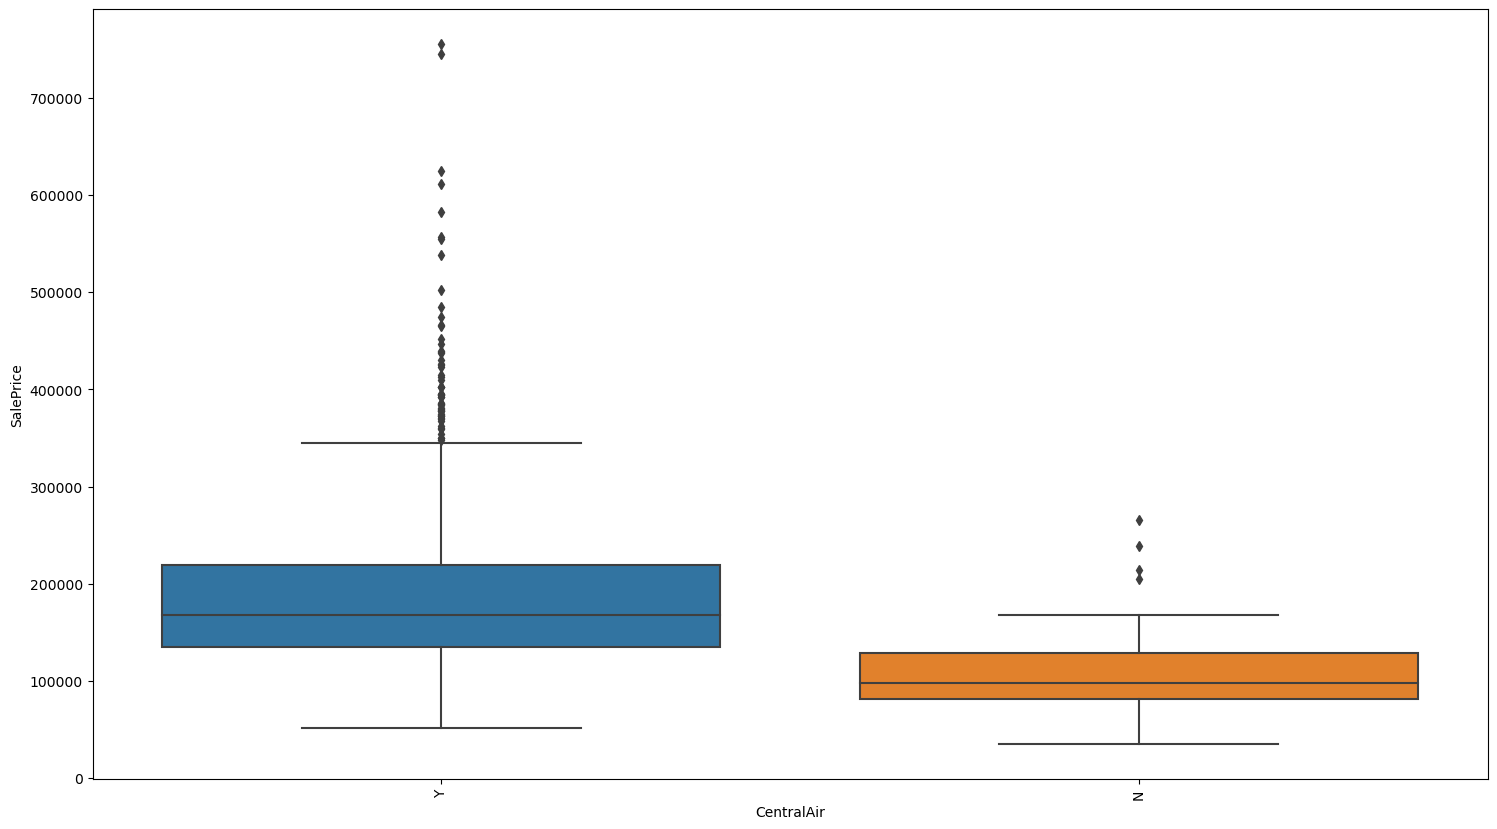

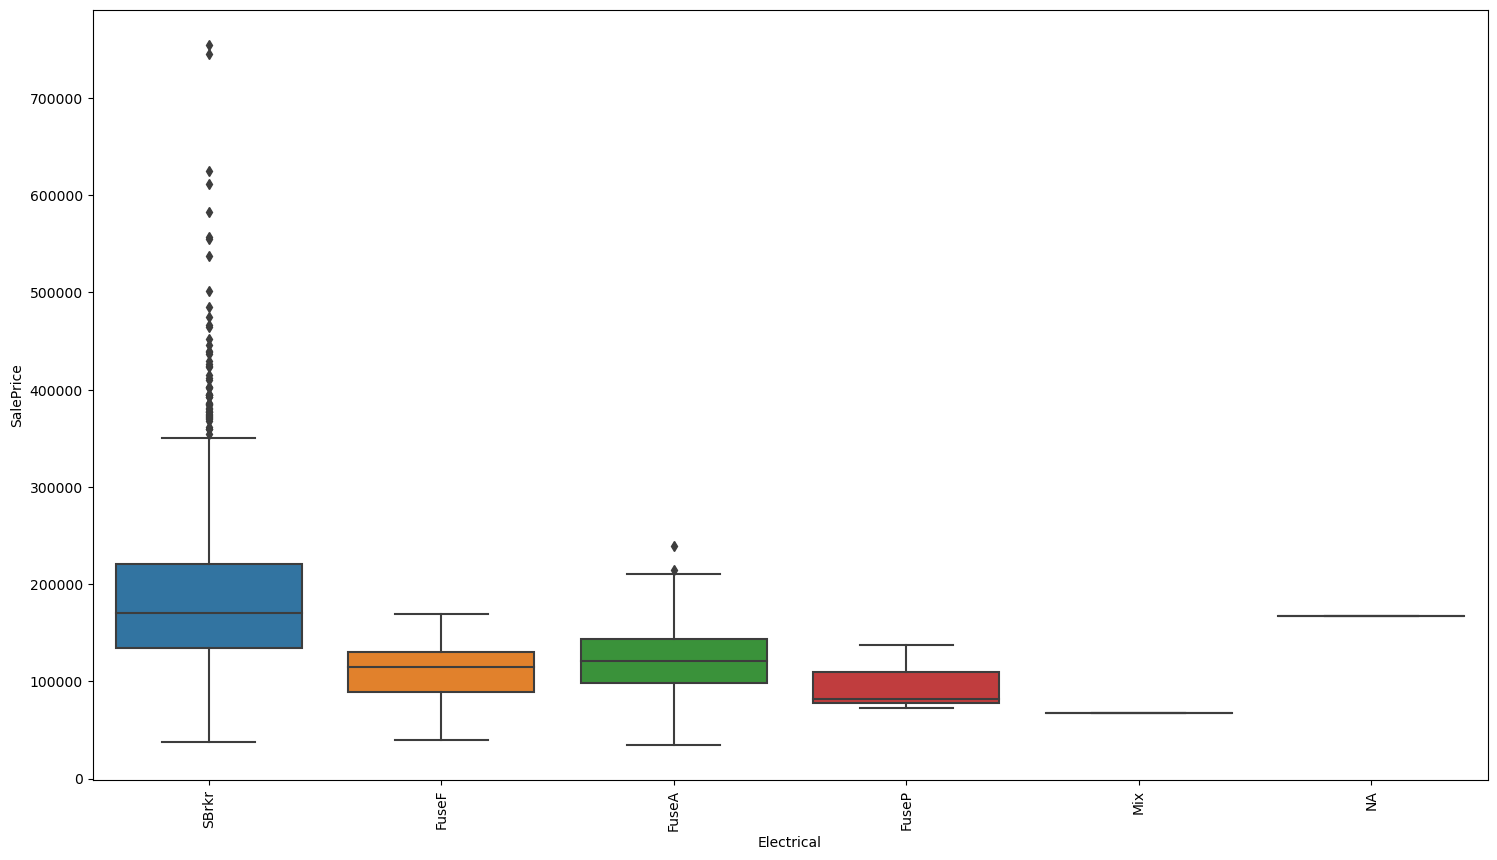

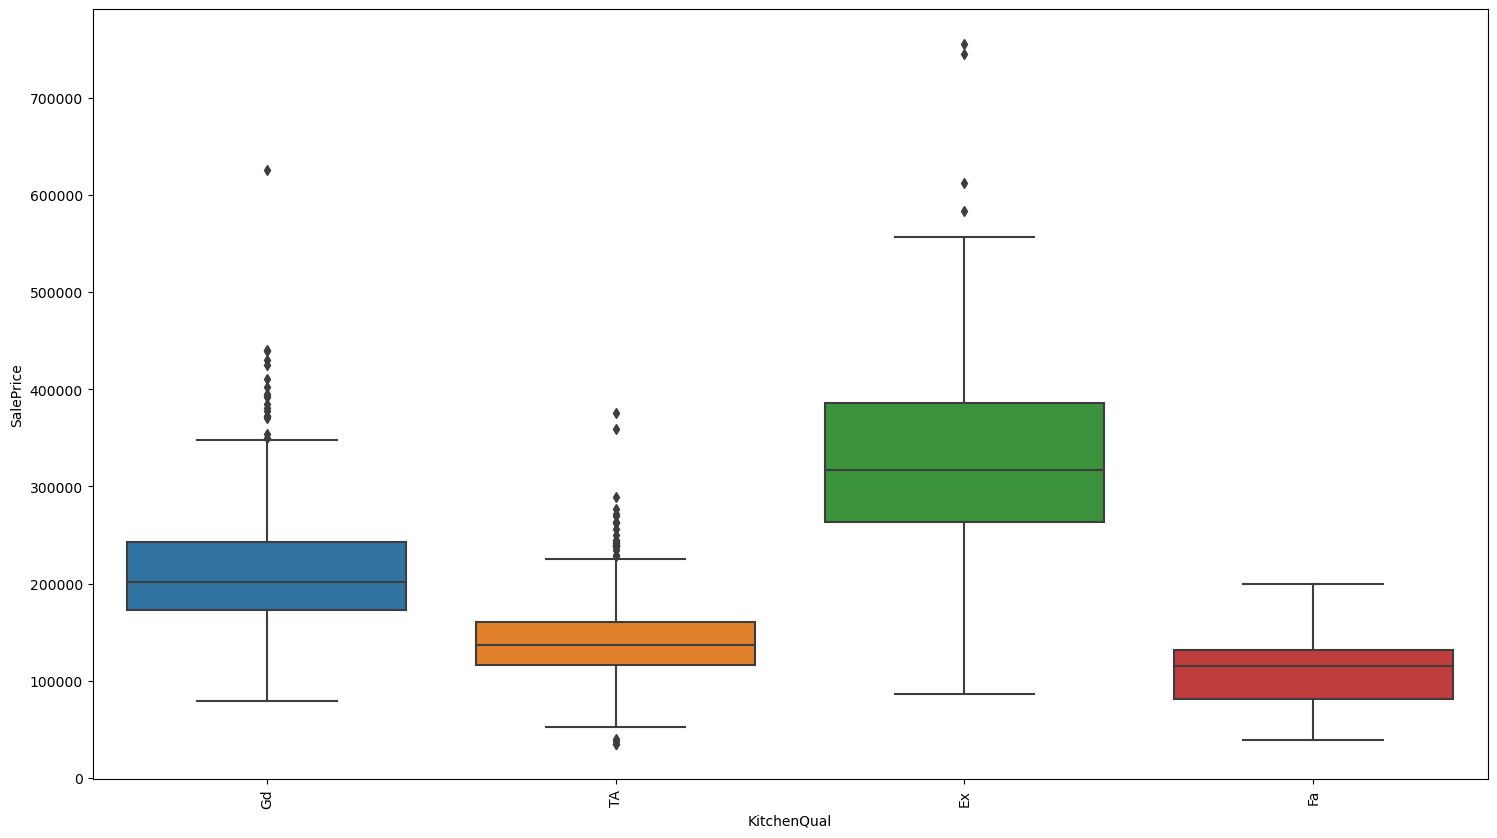

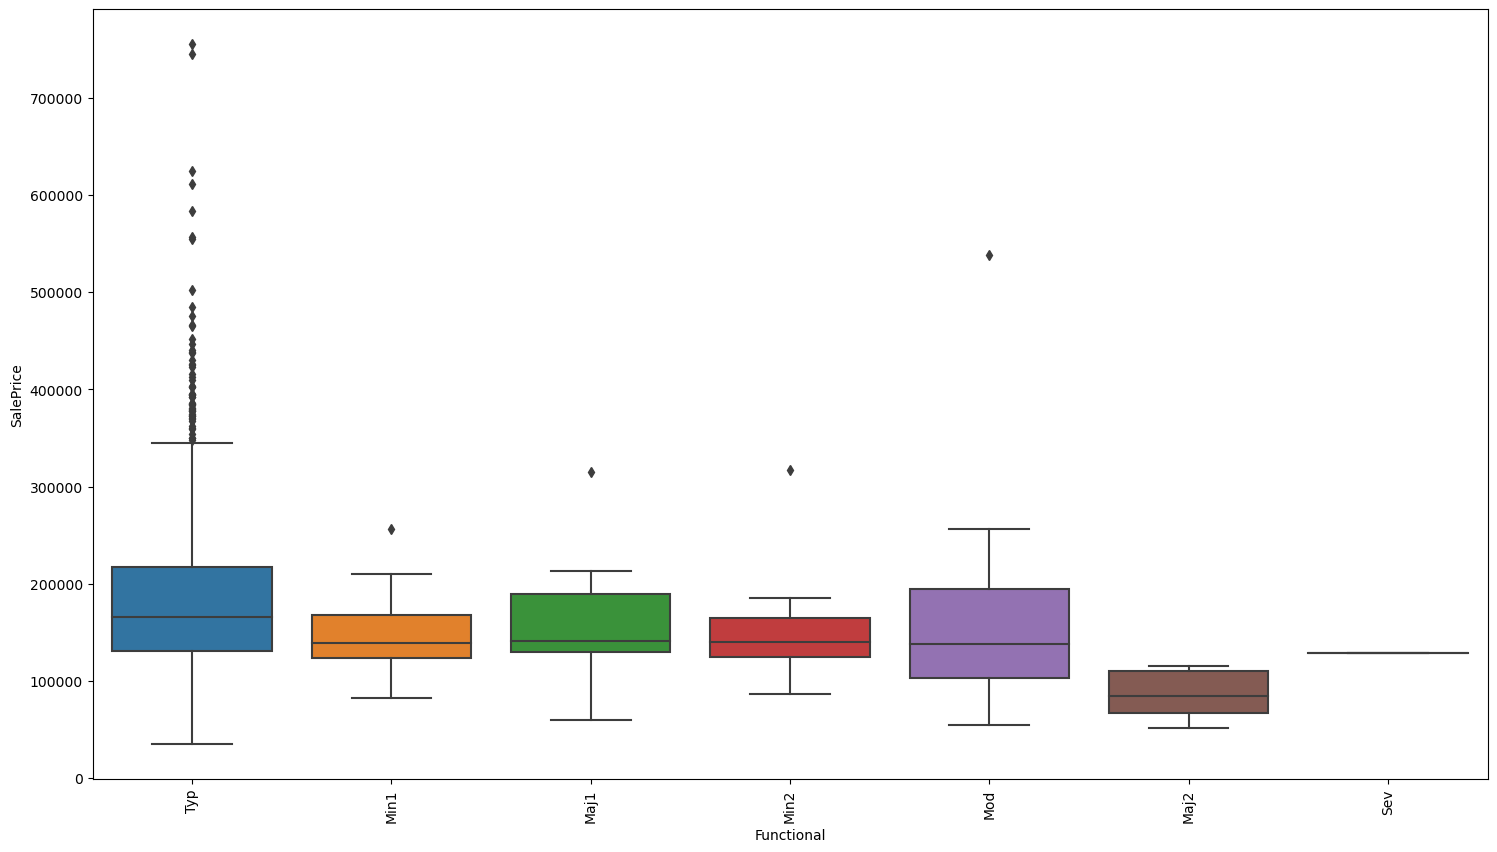

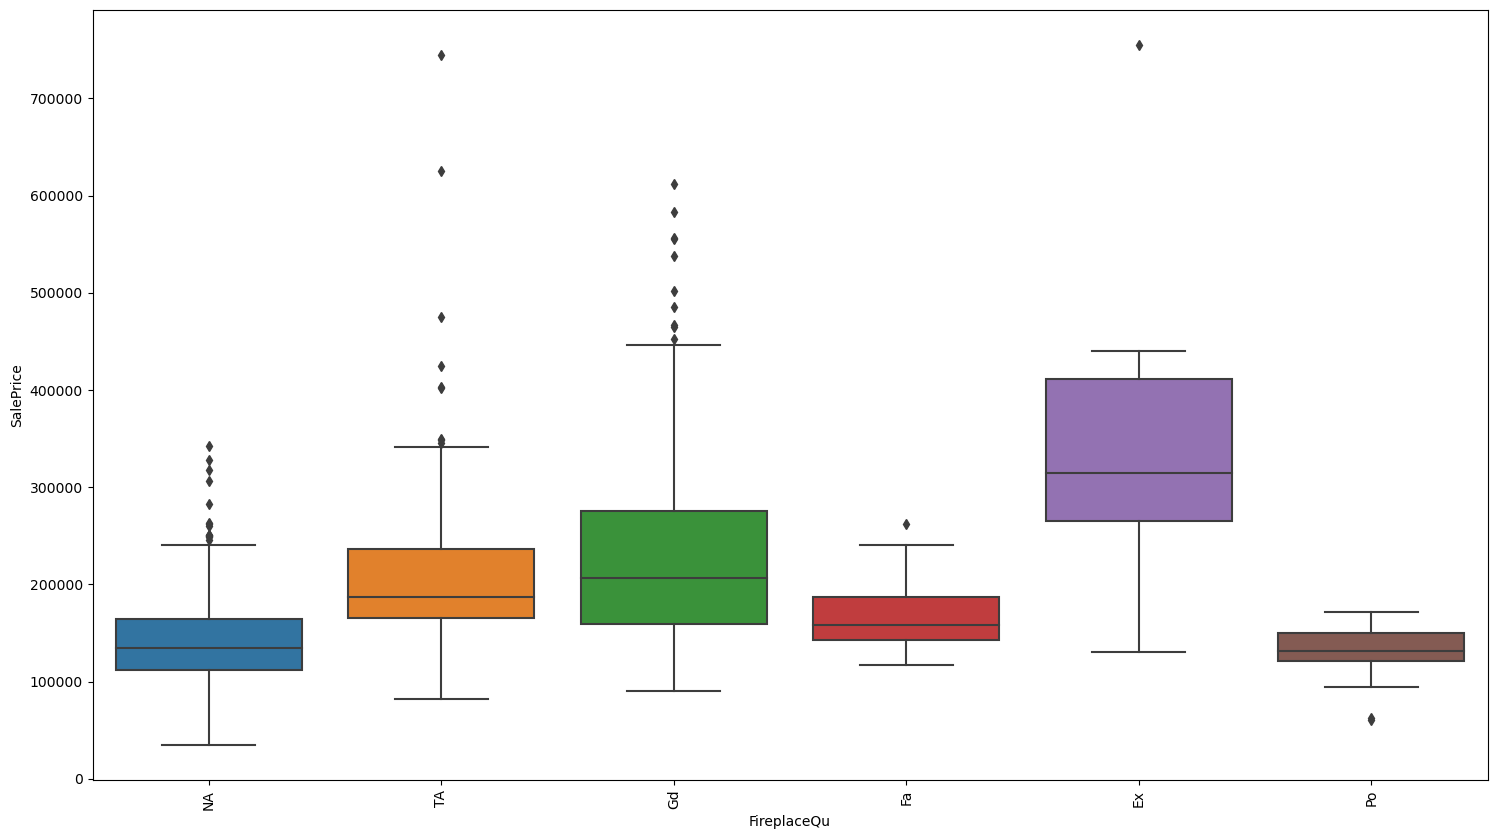

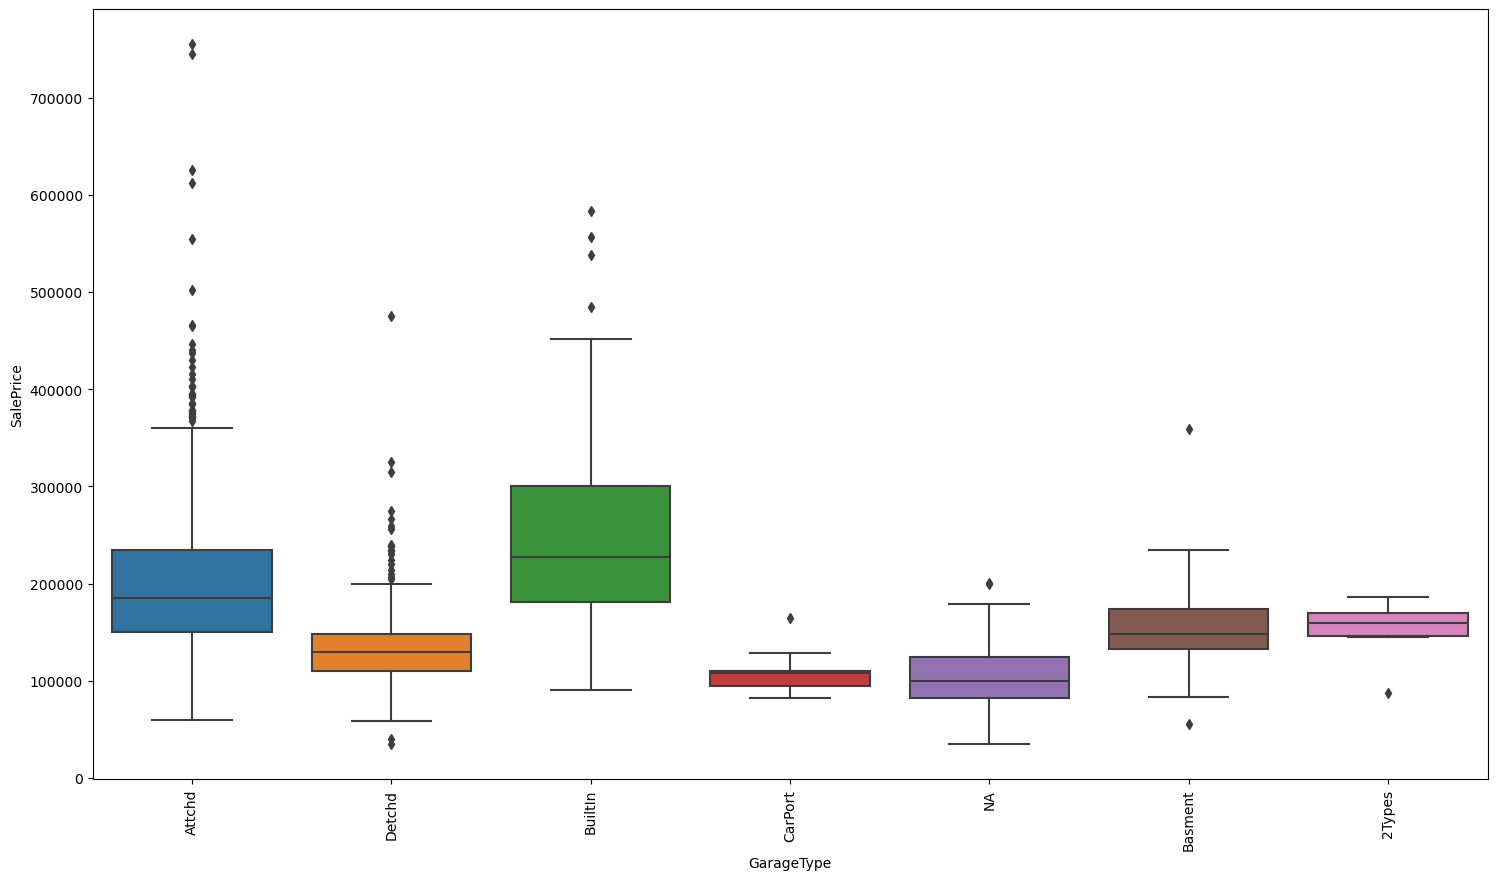

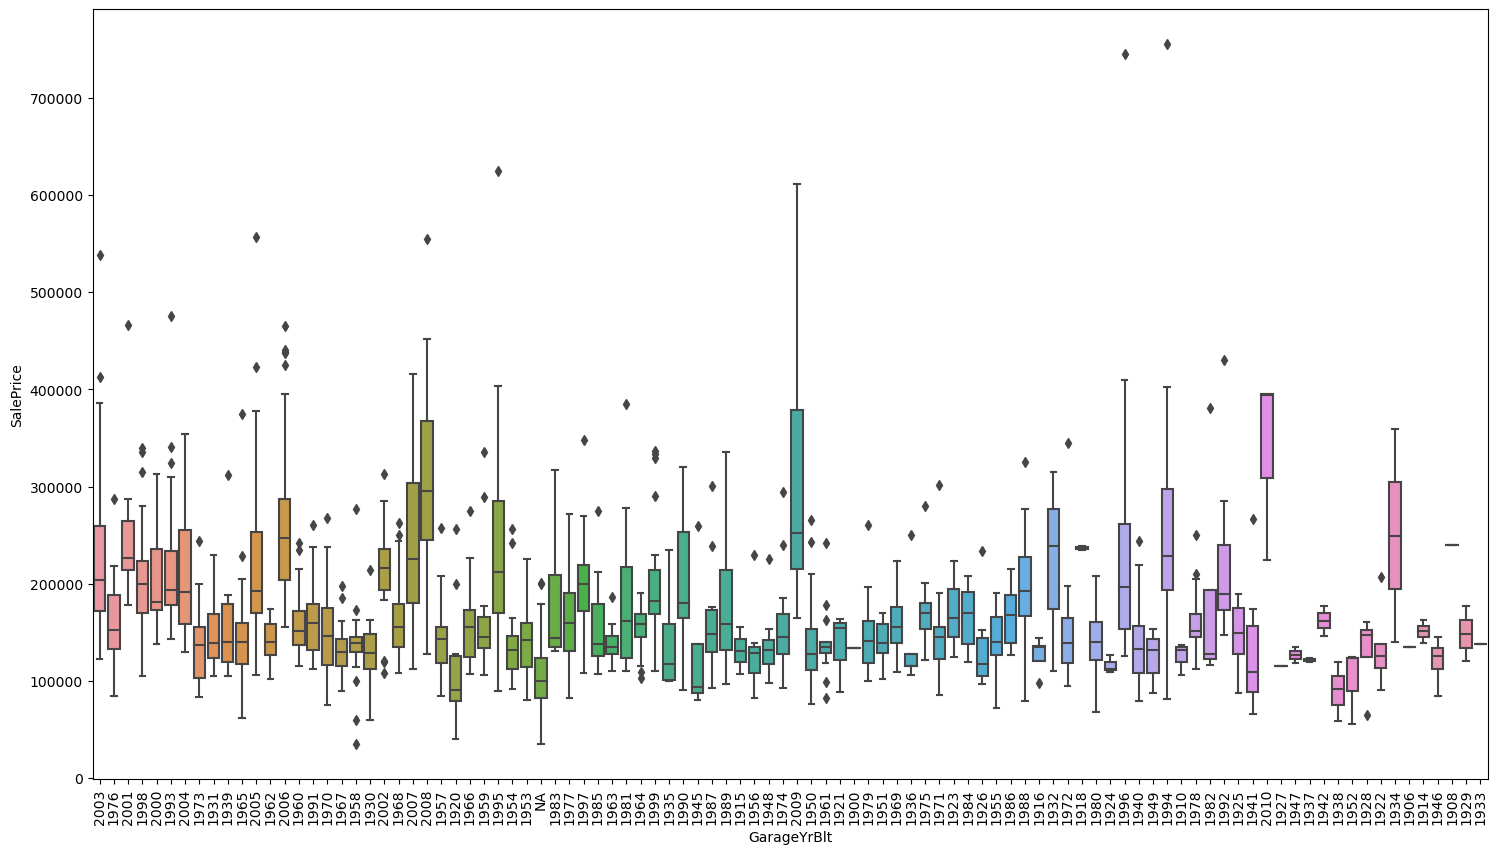

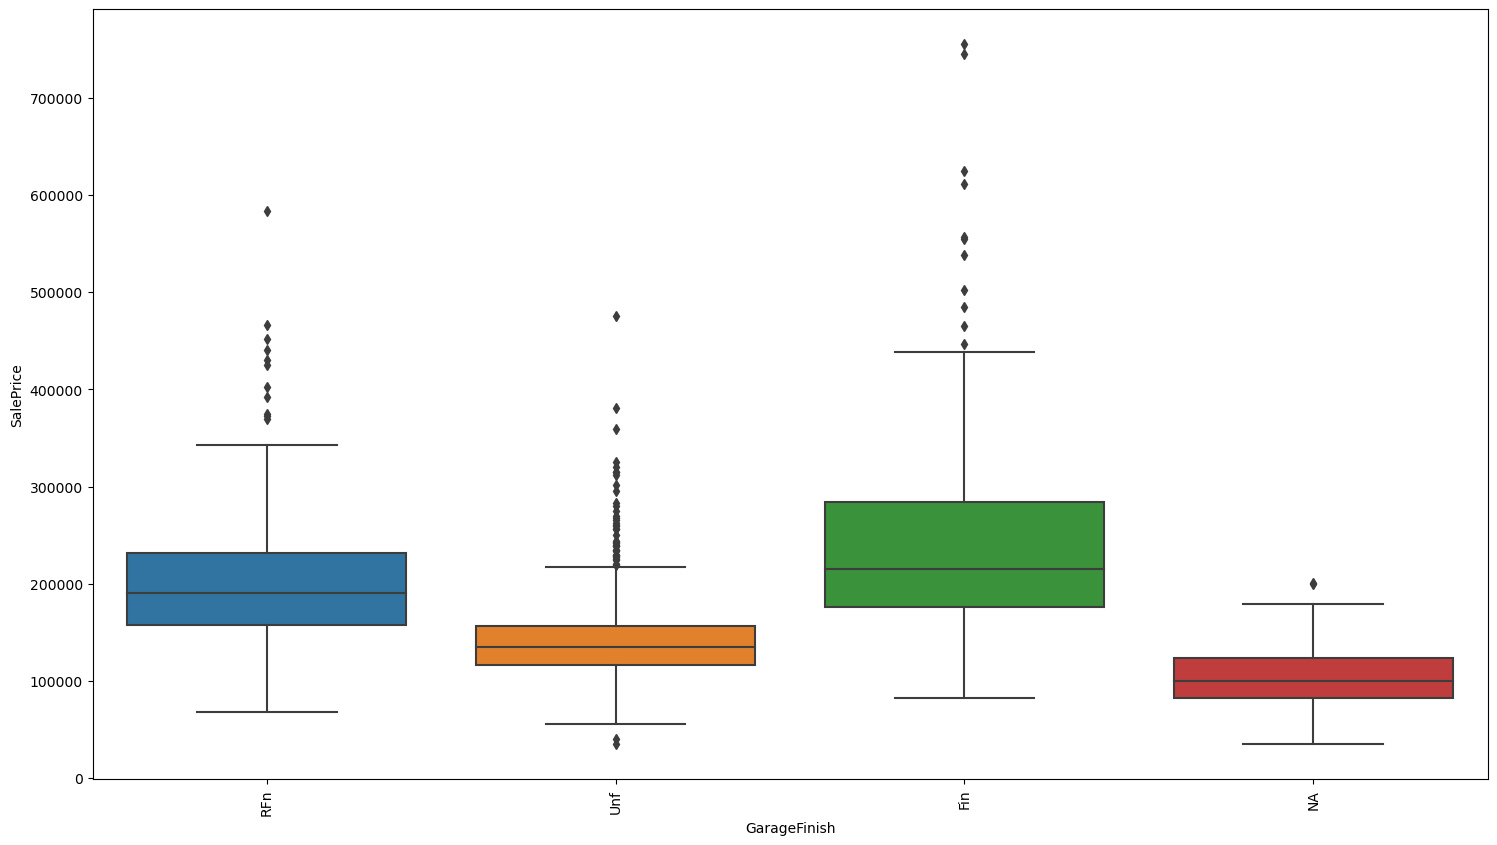

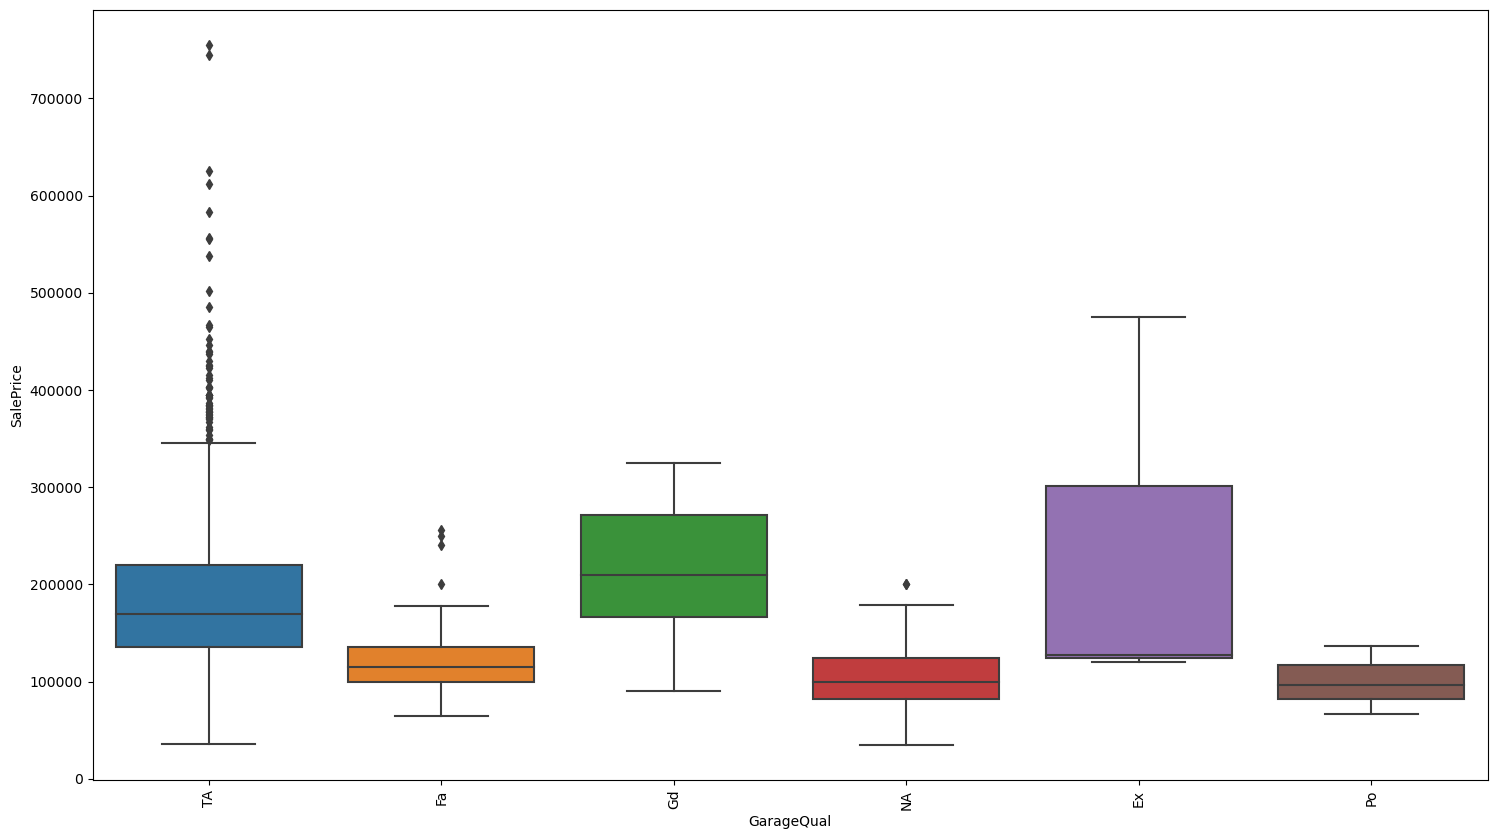

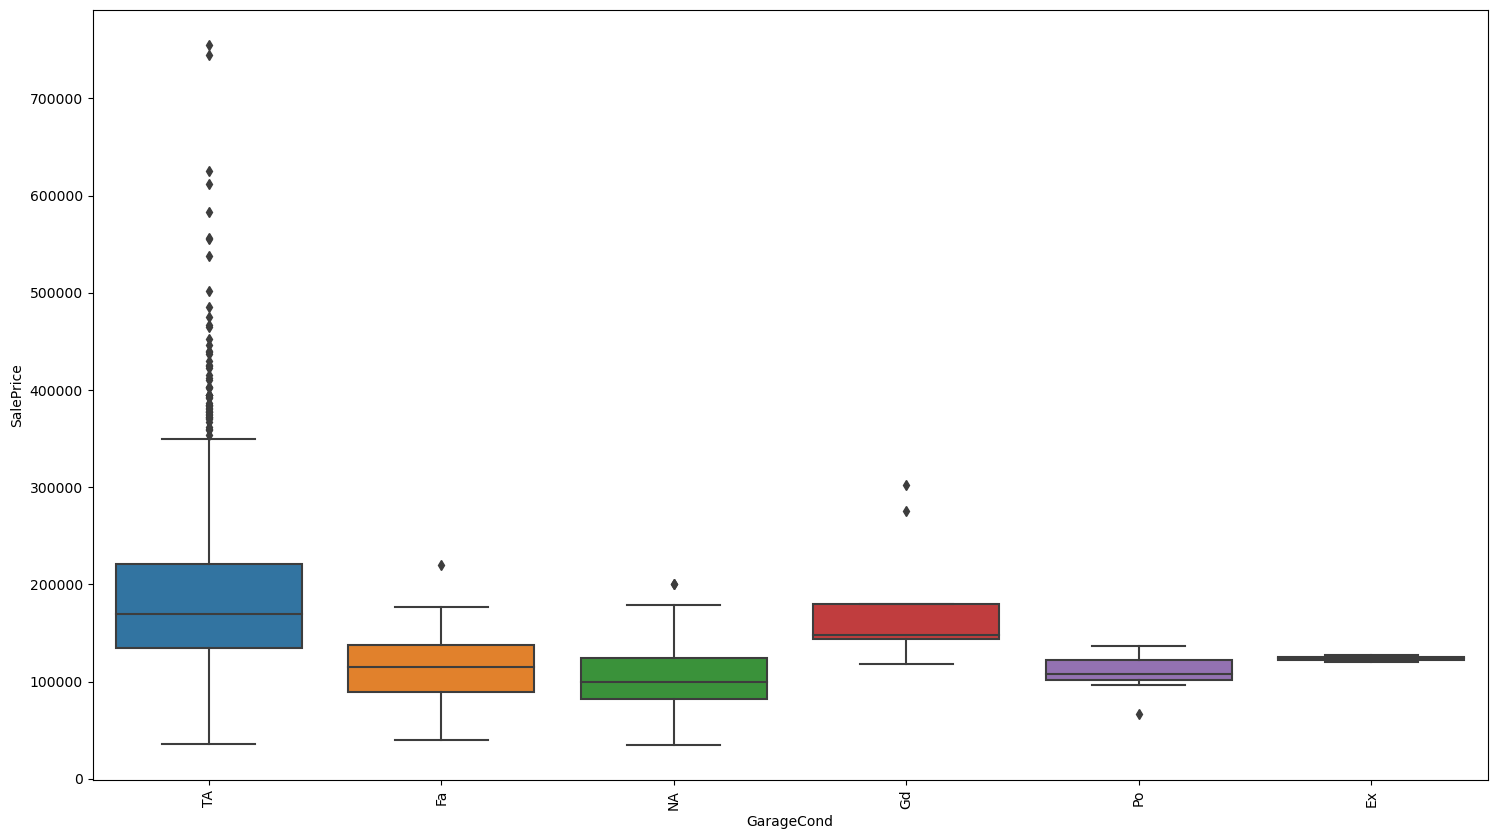

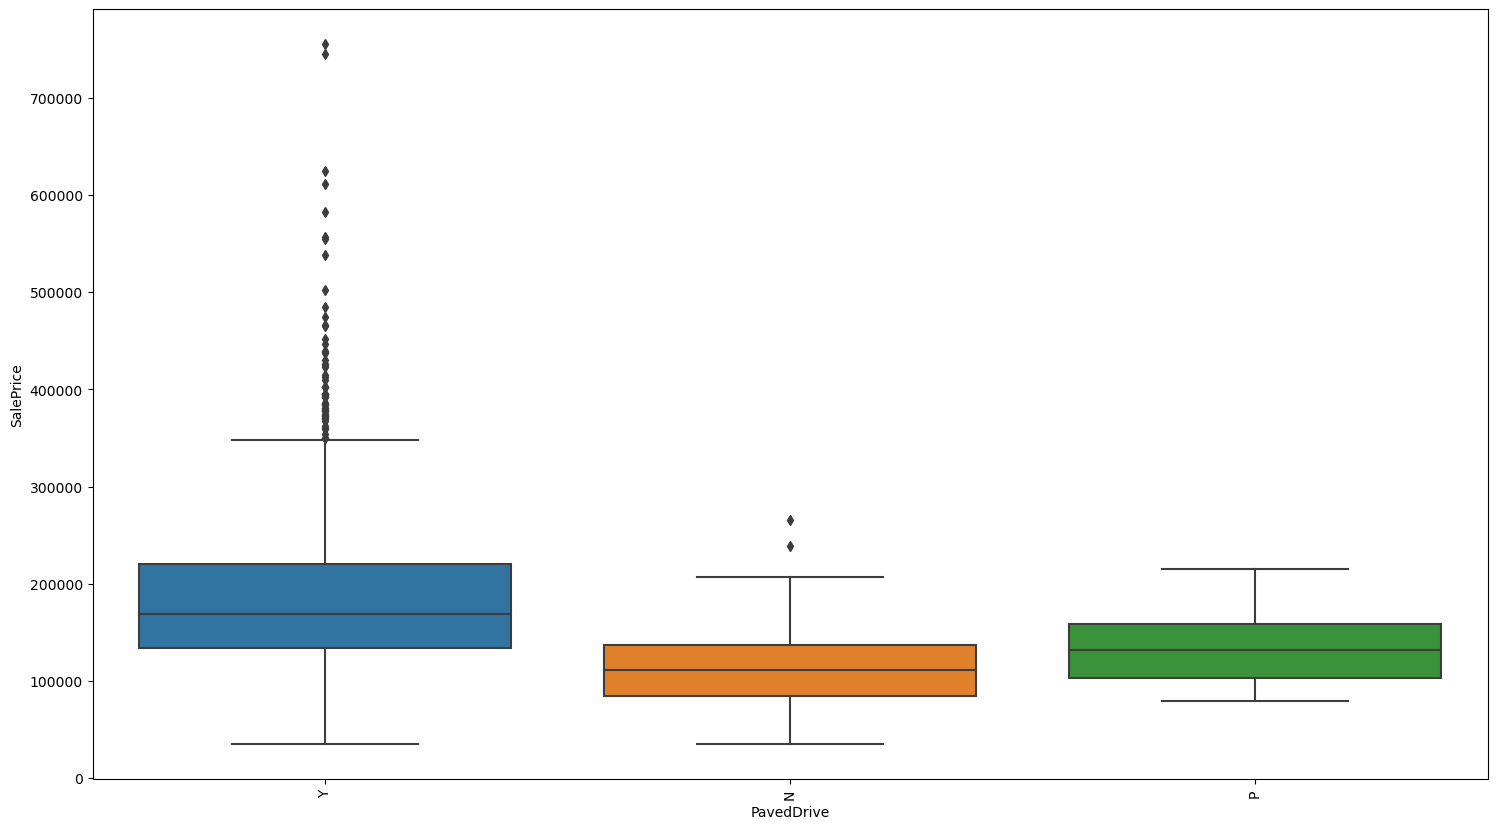

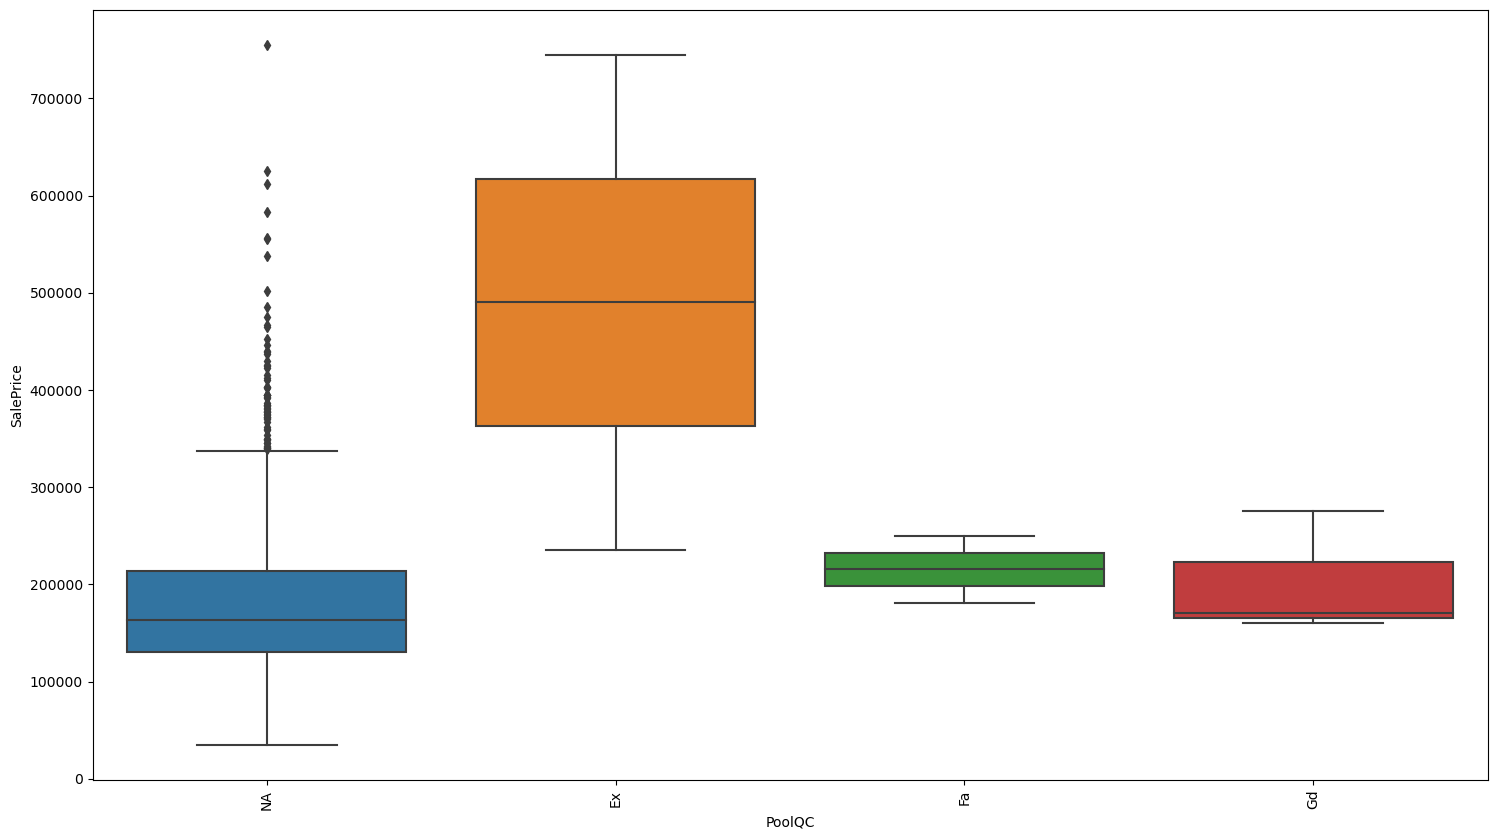

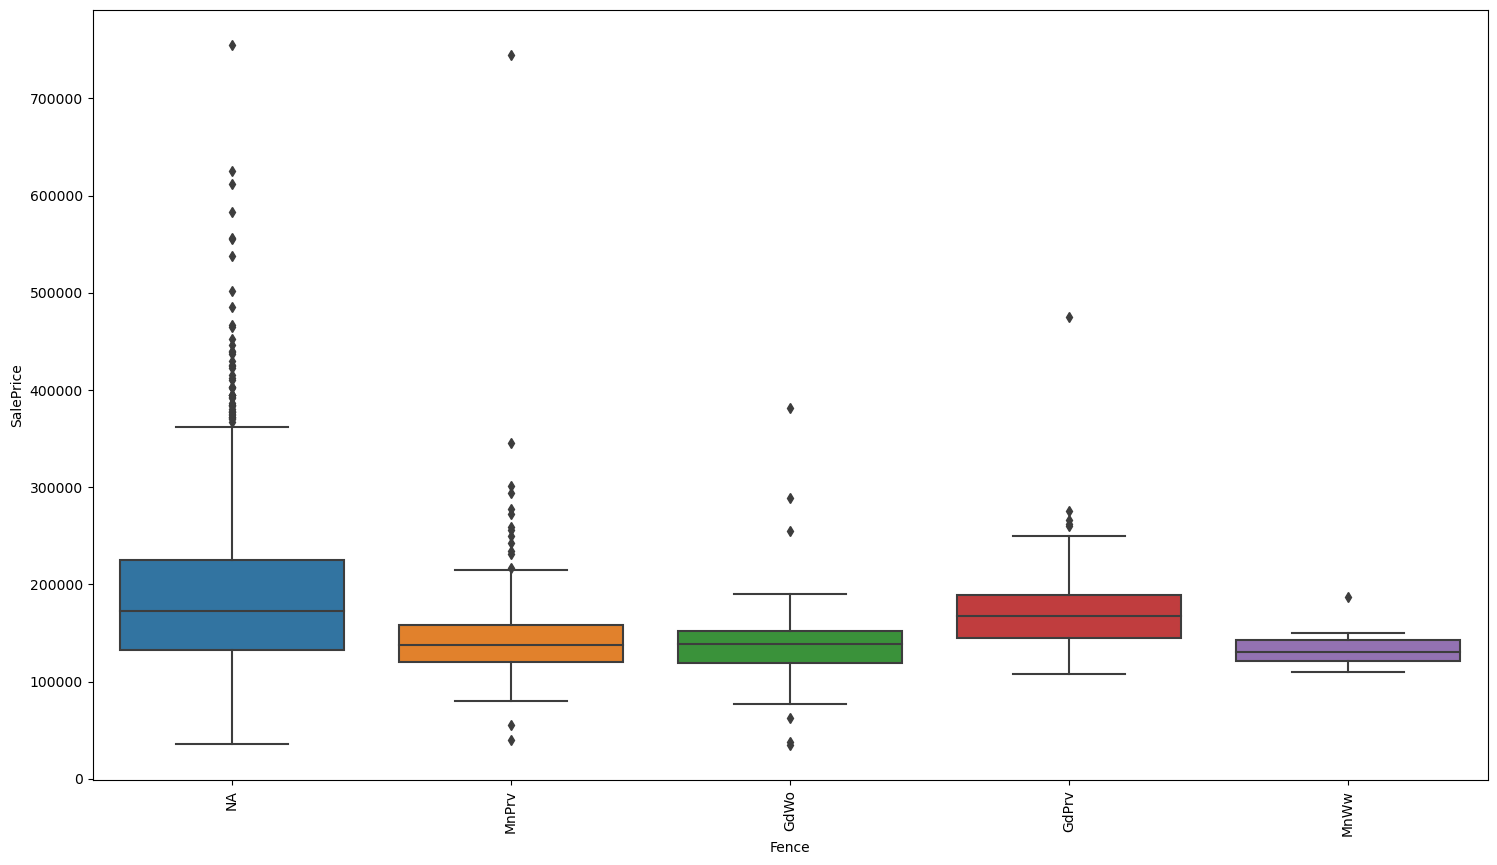

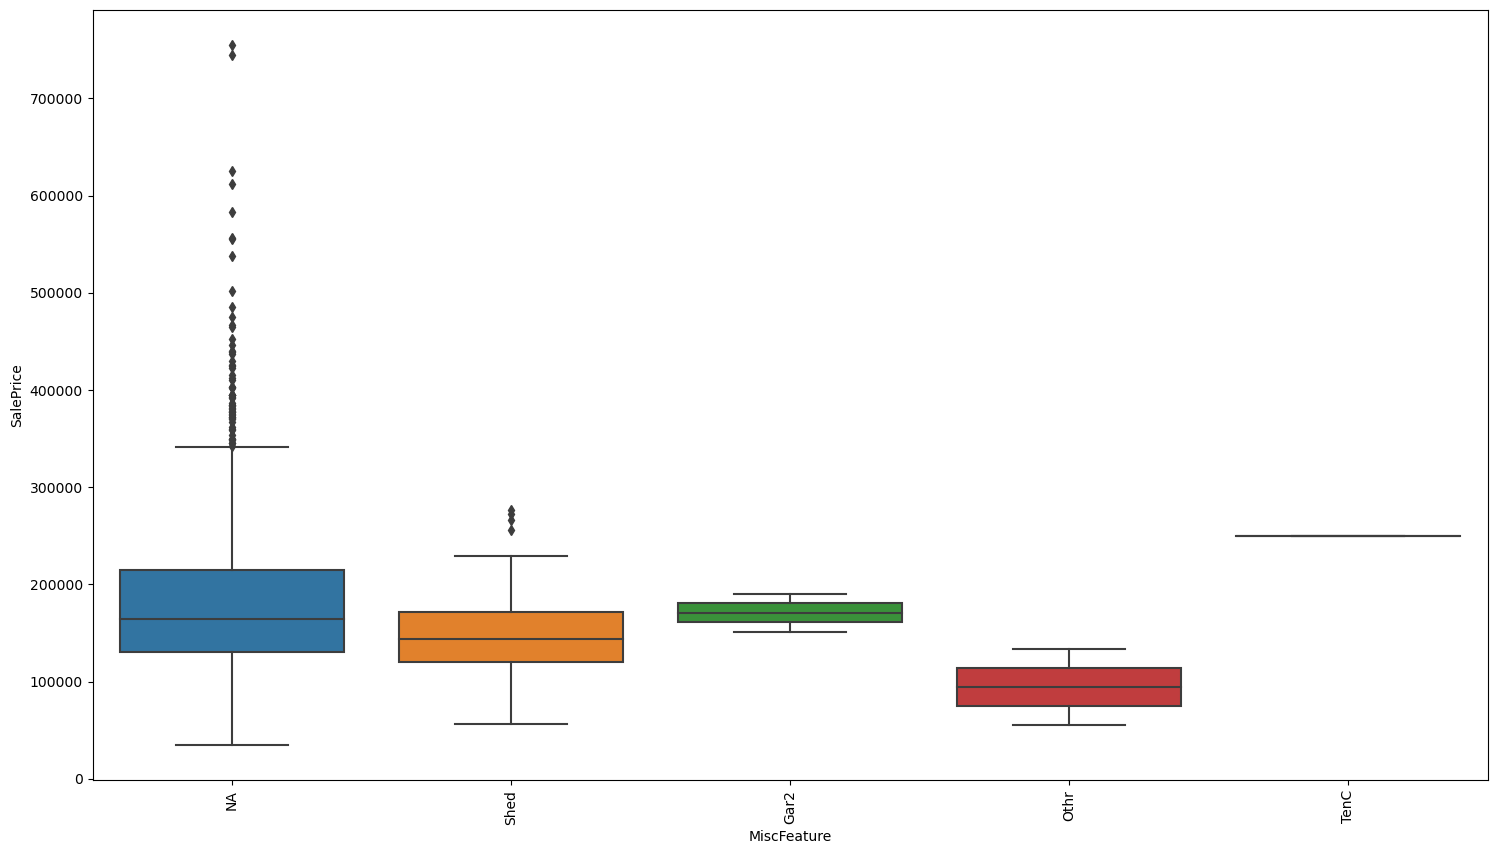

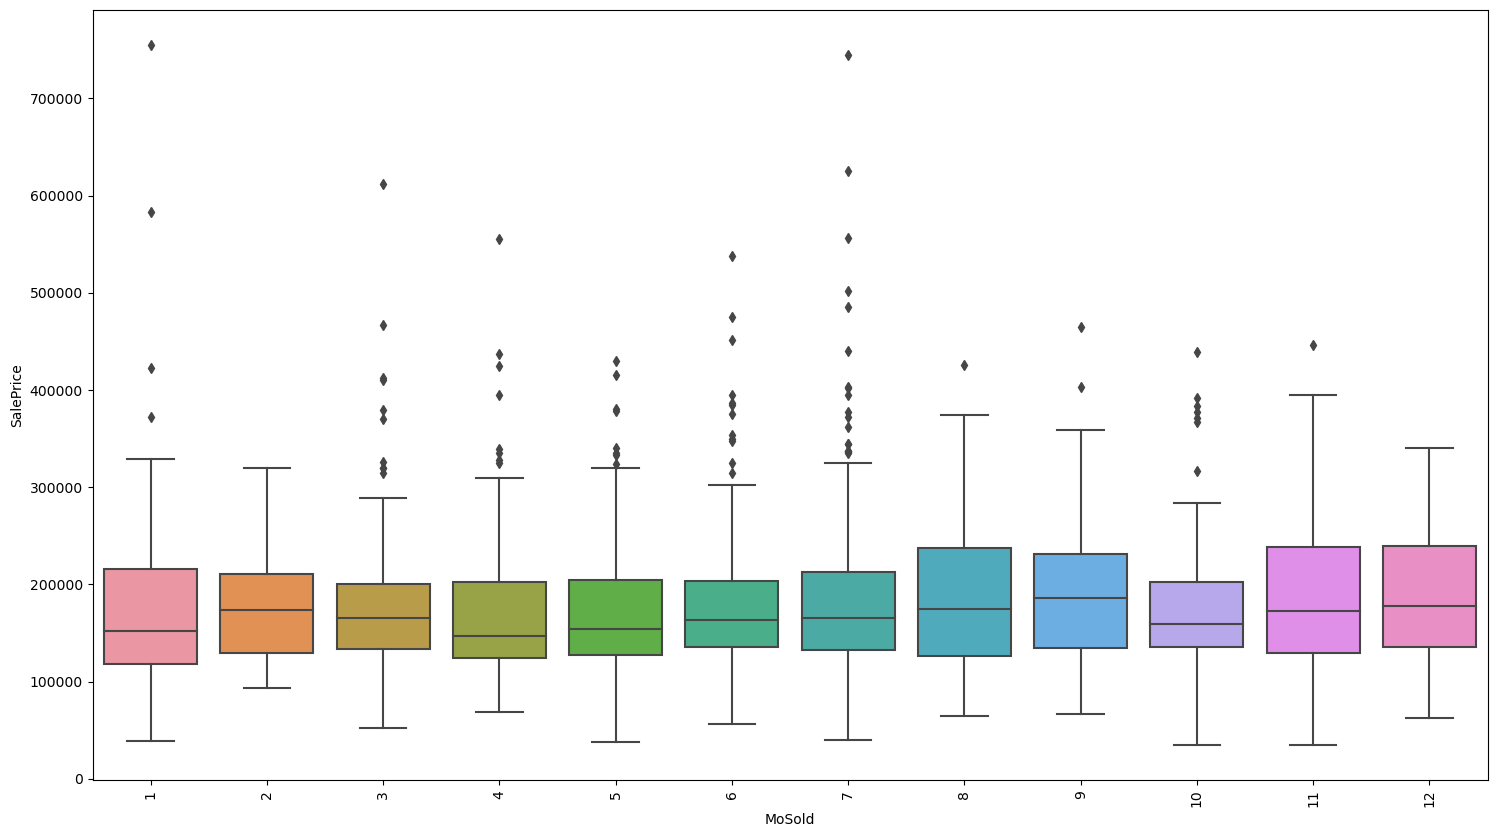

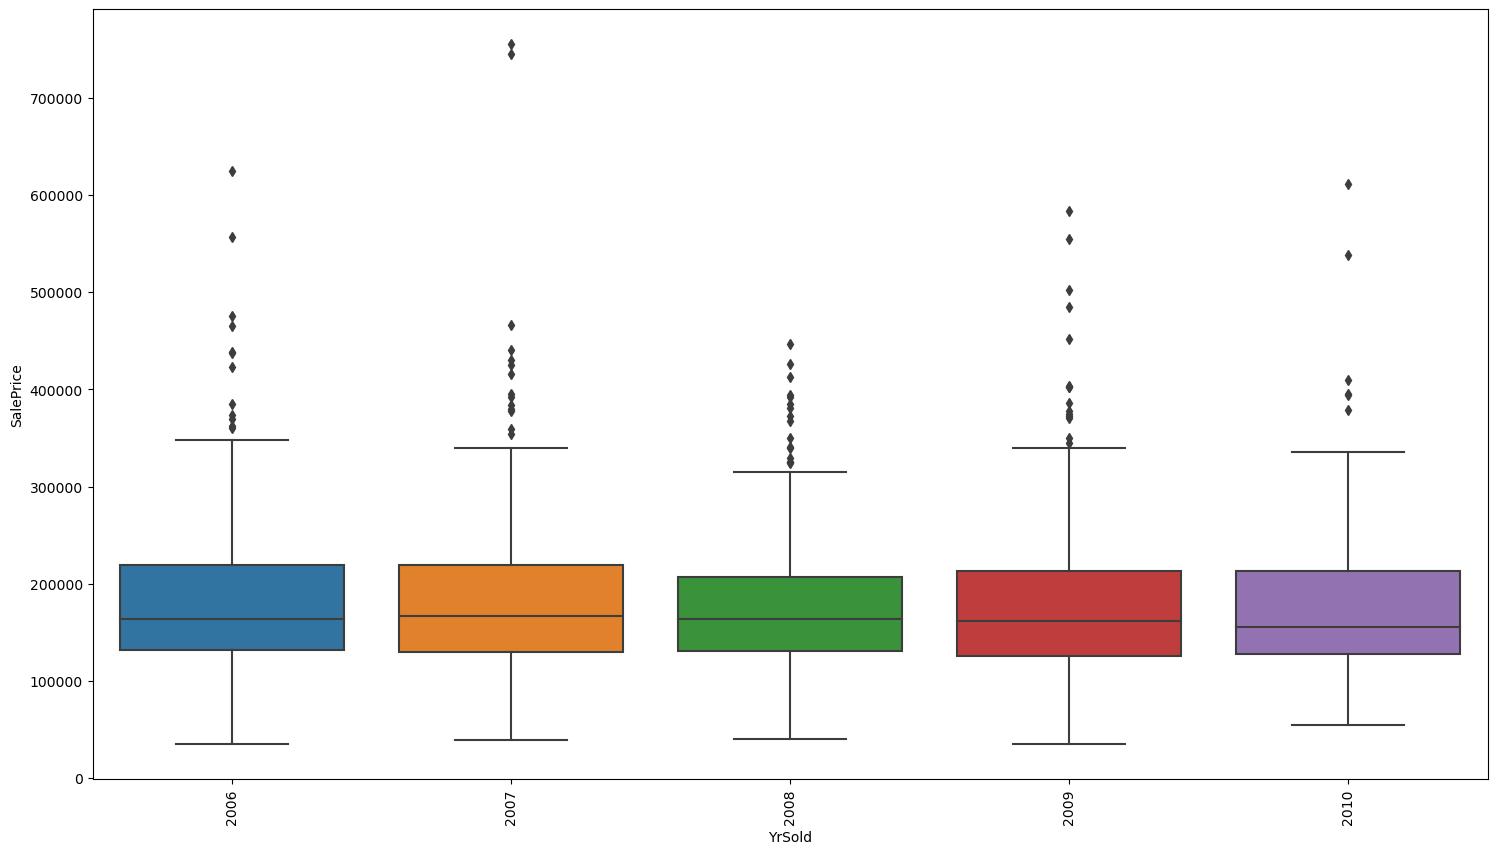

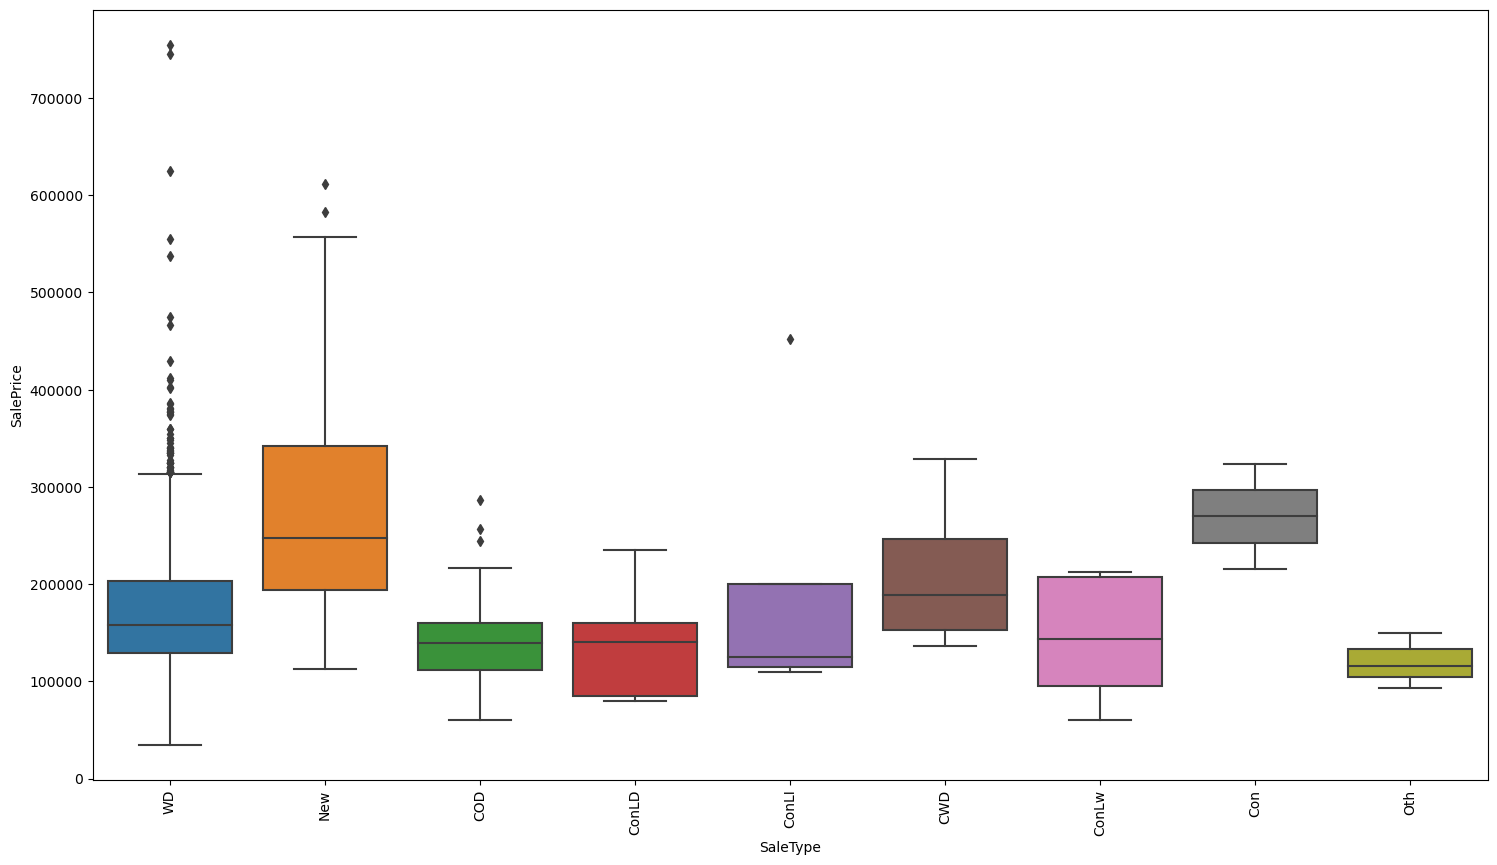

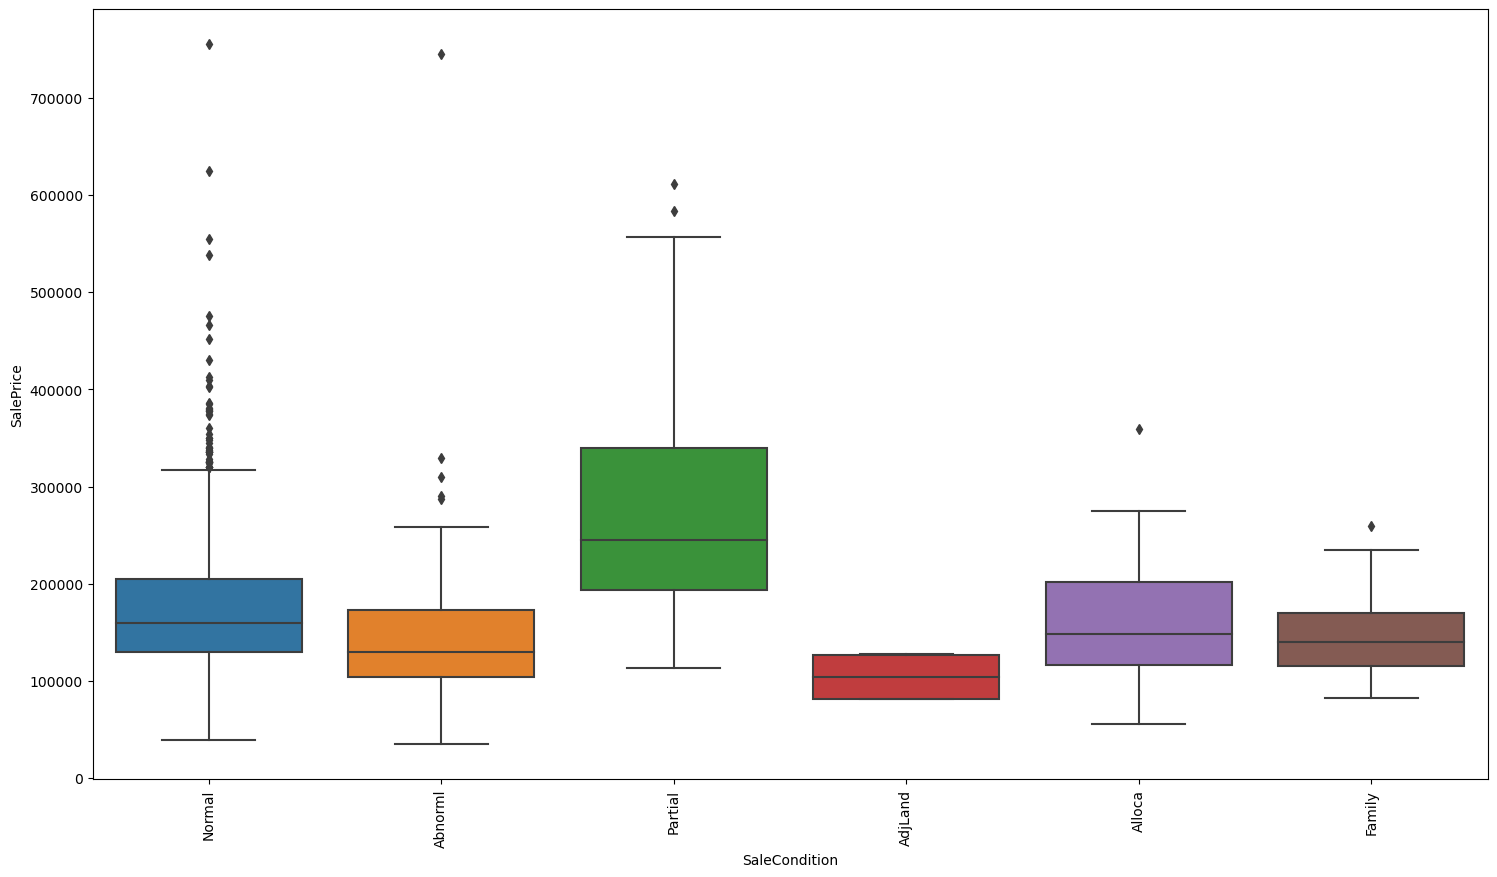

In [220]:
for i in col:
    plt.figure(figsize=(18,10))
    sns.boxplot(data=df_1,x=df_1[i],y=df_1['SalePrice'])
    plt.xticks(rotation='vertical')
    plt.show()


1) Type of dwelling: houses of "1946 and higher" category has a higher median value. Outliers are observed
2) Zoning classification: Floating village has a higher sales price compared to other categories. Outliers are observed in the "RL" category
3) Street: Houses with paved street are at a higher sales price, than those with gravel streets
4) Alley: house having alley with gravel is lower priced compared to "no alley access" or paved alley
5) LotShape: Highly irregular lotshape has a higher sales price
6) LandContour: A hillside contour has a higher sales price than other categories. A radical increase in slope from street is the least priced
7) Utilites: almost all the houses seem to be having all the general public utilites
8) LotConfig: A cul-d-sac type config has a higher sales price, followed by "FR3"
9) LandSlope: The median values are almost the same relative to each other
10) Neighborhood: North ridge heights has got the highest sales price, followed by north ridge (outliers present)
11) Condition1: houses with proximity to the north-south railroad and greenbelt are higher priced
12) Condition2: here it is not clear what is the difference between "Condition1" and "Condition2".
13) BuidingType: A townhouse end unit or a single family detached are higher priced than other categories
14) HouseStyle: A 2-story or 2.5story that is 2nd level finished have higher prices 
15) OverallQuality: House with "very excellent" rating is the highest priced
16) OverallCondition: Here houses with "average" conditions are higher priced compared to other categories such as "very good", "above average", it is not clear as to why this is so
17) Yearbuilt: Houses built during the years 2007 and 2008 are at a higher sales price
18) YearRemodAdd: Houses with re-modelling year of 2010 are having higher sales price
19) Roofstyle: Houses with "shed" type roof are highest priced
20) RoofMatl: Houses with roof material of "wood shingles" are higher priced
21) ExteriorCovering: Houses with exterior covering of "stones" are the highest priced
22) Exterior2nd(more than one material): Houses with "cement board" are higher priced, this is pertaining to multiple materials
23) MasVnrType: Houses with veneer type "Stone" are higher proced
24) ExterQual: Excellent quality type is highest prices
25) ExterCond: Whether the present condition of the exterior is average or excellenet, the sales prices are similar
26) Foundation: Houses with "poured concrete" as the foundation are at a higher sales price
27) BsmtQual: A basement of 100+ inches is highest priced
28) BsmtCond: The general condition of the basement being "good" is at a higher sales price
29) BsmtExposure: No significant difference in the sale price among these categories
30) BsmtFinType1: Basement finish of "Good Living Quarters" is at a higher sales price
31) BsmtFinType2: No significant different in sales price among these categories
32) Heating: Houses with "GasA" or Gas forced warm air furnace are at a higher sales price
33) HeatingQC: Excellent quality and condition is at a higher sales price
34) CentralAir: Houses with central air conditioning are at a higher sales price than without central air conditioning
35) Electrical: No significant difference in median values
36) KitchenQual: House with excellect kitchen quality is significantly higher priced
37) Functional: No significant difference in median values
38) FireplaceQu: House with "Ex" category is significantly higher priced
39) GarageType: A built-in garage type is higher priced, follwed with "attached"
40) GarageYrBlt: 2010 has higher price
41) GarageFinish: no significant difference in median values. Finished category is highest priced
42) GarageQual: No significant difference in sales price between the qualities "Ex" and "typical", though excellect is highest priced
43) GarageCond: No significant difference in median values
44) PavedDrive:paved driveway is higher priced, but not significant difference in the median values
45) PoolQC: House  with excellent pool quality is at a significantly higher price compared to other categories
46) Fence: fence quality does not have a significant impact on the house sales price
47) MiscFeature: No significant difference in median values
48) MoSold: No impact on house sales price
49) YrSold: No impact on house sales price
50) SaleType: A newly constructed house is at a higher price
51) Salecondition: A new home is at a higher sales price

Variables which seem to have significant sale price variations: MSSubClass, MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,RoofMatl,ExterQual,BsmtQual,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageQual,PoolQC,SaleType,SaleCondition

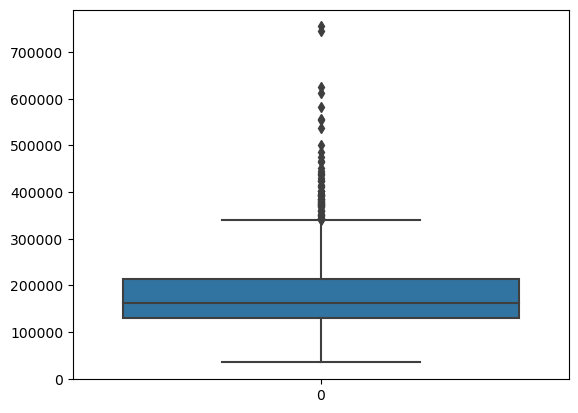

In [221]:
#Outliers are present in the target variable
sns.boxplot(df_1['SalePrice'])
plt.show()

In [222]:
#Calculating the qauntiles and interquartile range
Q1 = df_1['SalePrice'].quantile(0.25)
Q3 = df_1['SalePrice'].quantile(0.75)
IQR=Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df_1['SalePrice']>=upper)[0]
lower_array = np.where(df_1['SalePrice']<=lower)[0]
df_1.drop(index=upper_array, inplace=True)
df_1.drop(index=lower_array, inplace=True)

In [223]:
df_numeric = df_1.select_dtypes(include=['float64', 'int64','int32'])
df_categorical = df_1.select_dtypes(include=['object'])
print(df_numeric.shape)
print(df_categorical.shape)

(1399, 29)
(1399, 51)


In [224]:
df_1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

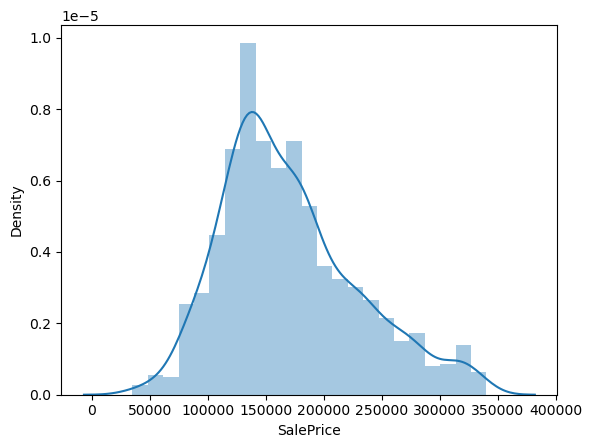

In [225]:
sns.distplot(df_1['SalePrice'])
plt.show()

In [226]:
#dummy variables creation
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 538 columns

In [227]:
df_2=df_1.drop(df_categorical.columns,axis=1)

In [228]:
df_2=pd.concat([df_2,df_dummies],axis=1)

In [229]:
df_2.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           65     8450         196         706           0        150   
1           80     9600           0         978           0        284   
2           68    11250         162         486           0        434   
3           60     9550           0         216           0        540   
4           84    14260         350         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0          856       856       854             0  ...               0   
1         1262      1262         0             0  ...               0   
2          920       920       866             0  ...               0   
3          756       961       756             0  ...               0   
4         1145      1145      1053             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 567 columns]

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
df_train,df_test=train_test_split(df_2,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(979, 567)
(420, 567)


scaling of features, here "Quantile transformer model" is used to scale features as it is not sensitive towards outliers compared to other models. More information: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [232]:
from sklearn.preprocessing import  QuantileTransformer,MinMaxScaler,StandardScaler
QT=QuantileTransformer(output_distribution='uniform')

In [233]:
#Here the dummy variables are not scaled, hence only the numeric column datatypes are scaled
df_train[df_numeric.columns]=QT.fit_transform(df_train[df_numeric.columns])

In [234]:
df_train.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   979.000000  979.000000  979.000000  979.000000  979.000000   
mean      0.485412    0.499942    0.298866    0.446265    0.111518   
std       0.309644    0.289107    0.398982    0.350195    0.304557   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.247444    0.244376    0.000000    0.000000    0.000000   
50%       0.445808    0.500000    0.000000    0.500000    0.000000   
75%       0.756646    0.750000    0.747955    0.750000    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

        BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF  ...  \
count  979.000000   979.000000  979.000000  979.000000    979.000000  ...   
mean     0.495865     0.499472    0.499921    0.334711      0.019229  ...   
std      0.295541     0.289826    0.289096    0.397728      0.136755  ...   
min      0.000000     0.000000    0.000000    0.000000      0.000000  ...   
25%      0.250000     0.247955    0.250767    0.000000      0.000000  ...   
50%      0.499489     0.500000    0.501022    0.000000      0.000000  ...   
75%      0.749489     0.750000    0.751022    0.750000      0.000000  ...   
max      1.000000     1.000000    1.000000    1.000000      1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      979.000000      979.000000    979.000000    979.000000   
mean         0.002043        0.004086      0.071502      0.002043   
std          0.045175        0.063822      0.257792      0.045175   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   979.000000             979.000000            979.000000   
mean      0.882533               0.001021              0.007150   
std       0.322140               0.031960              0.084299   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            979.000000            979.000000             979.000000  
mean               0.014300              0.843718               0.071502  
std                0.118786              0.363308               0.257792  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 567 columns]

In [235]:
df_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=567)

In [236]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [237]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [238]:
print(lm.intercept_)
print(lm.coef_)

2844855498487.372
[ 5.24204507e-03  4.62226246e-02  1.05123842e-02 -4.72078038e-02
 -1.88956094e-01 -6.46033835e-02  1.79079175e-01  1.77017233e-02
  3.15292540e-02  7.84992857e-03  3.04919603e-01  4.49660885e-02
  3.82732581e-02  6.11017197e-02  3.59858746e-02  2.80281203e-02
  2.06989150e-02 -5.69774038e-03  1.38328139e-01  4.31303295e-02
  4.20553152e-02  1.77308188e-02  1.63028836e-02  2.72537063e-02
 -6.20932853e-03  4.31225407e-02 -3.03372582e+12  3.00493174e-01
  9.91199420e-04  4.74544668e-02  8.57612478e-02  1.34460067e-02
  2.48001435e-01  1.04594625e-01  2.60039583e-01  4.62235826e-02
 -6.91159526e-03 -1.21357519e-01  2.66181159e+12 -1.88101699e-01
 -5.66172406e-02 -1.21046500e-01  1.80377335e-01  3.03559888e-02
  1.04646351e-01  6.78190257e-03 -4.27086066e-02 -1.45127391e-02
 -3.91559149e-02 -6.72165832e-03 -9.84168104e-04 -1.30580670e-02
  1.89506655e-02  4.53237627e-02  1.55686197e-02 -4.05270149e-01
 -5.83188738e-03 -2.72514111e-02 -5.19011104e-02 -1.40152747e-02
 -3.133

In [239]:
df_test[df_numeric.columns]=QT.transform(df_test[df_numeric.columns])

In [240]:
df_test.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   420.000000  420.000000  420.000000  420.000000  420.000000   
mean      0.478562    0.540622    0.352543    0.475971    0.107347   
std       0.329000    0.291930    0.406308    0.363640    0.299439   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.213190    0.308524    0.000000    0.000000    0.000000   
50%       0.520450    0.544958    0.000000    0.553553    0.000000   
75%       0.756646    0.801447    0.775733    0.786350    0.000000   
max       1.000000    1.000000    0.999129    0.998371    0.998825   

        BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF  ...  \
count  420.000000   420.000000  420.000000  420.000000    420.000000  ...   
mean     0.494659     0.536145    0.517829    0.354045      0.014172  ...   
std      0.296833     0.290610    0.296447    0.407604      0.117867  ...   
min      0.000000     0.000000    0.005112    0.000000      0.000000  ...   
25%      0.232760     0.273390    0.266871    0.000000      0.000000  ...   
50%      0.480317     0.560327    0.542945    0.000000      0.000000  ...   
75%      0.754346     0.799233    0.776500    0.786810      0.000000  ...   
max      1.000000     0.995930    0.998578    0.999239      0.999114  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      420.000000      420.000000    420.000000    420.000000   
mean         0.004762        0.002381      0.050000      0.002381   
std          0.068924        0.048795      0.218205      0.048795   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   420.000000             420.000000            420.000000   
mean      0.890476               0.007143              0.009524   
std       0.312668               0.084313              0.097240   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            420.000000            420.000000             420.000000  
mean               0.014286              0.819048               0.057143  
std                0.118808              0.385438               0.232392  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 567 columns]

In [241]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [242]:
y_pred_train=lm.predict(X_train)

In [243]:
y_pred_test=lm.predict(X_test)

In [244]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9715760007438613
-3.666076848140601e+23
2.323160984608263
1.328590918910603e+25
0.0023729938555753453
3.163311711691912e+22


Here the Adjusted R2 score for the test dataset is unrealistic, it is not clear why this is happening. The values for "y_pred_test" also seem incorrect(shown in next cell). This may have happened due to overfitting of the linear regression model on the training dataset and the presence of correlated features, in which case ridge or lasso regression models might be more preferrable.

In general the metrics for test dataset indicate that the linear regression model has overfit the training data

In [245]:
print(y_pred_test.max())
print(y_test.max())

1193649371882.0571
1.0


In [246]:
print(y_pred_test.min())
print(y_test.min())

-1795214398534.1982
0.0


Ridge regression

In [247]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [ 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [248]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [249]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.84664253e-03,  5.84812069e-02, -3.69182571e-03,  3.41936457e-02,
        6.56632008e-03, -1.47643339e-02,  9.44652349e-02,  8.32042594e-02,
        4.24844971e-02, -2.11728564e-02,  1.42310111e-01,  2.42679218e-02,
        1.67552989e-02,  8.01023239e-02,  4.81690930e-02,  5.68216217e-04,
       -3.97898840e-02,  3.12937021e-02,  2.41414030e-02,  4.76881672e-02,
        5.81157955e-02,  2.45559891e-02,  1.84230262e-02,  2.85234082e-03,
       -3.33692014e-03,  4.15611213e-02, -1.88080373e-02,  1.59670685e-03,
       -2.27816832e-02, -3.93946648e-02,  1.81385241e-02,  9.87976593e-03,
        8.49462137e-03, -2.52778774e-02,  4.13359794e-02,  2.33540348e-02,
        1.59719528e-02, -3.74781019e-02, -5.17493006e-03,  1.21112354e-03,
        2.62995254e-03,  3.05912519e-03,  3.62625884e-02, -4.73978545e-04,
        3.19530655e-02, -2.08997384e-02,  1.90182227e-02, -2.29685390e-03,
        2.10316890e-02,  1.12279146e-02, -9.34566437e-03, -6.51036377e-03,
        9.16255131e-03, -

In [250]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.942227710754366
0.8927831547742887
4.721866446642769
3.885552126201926
0.00482315265234195
0.009251314586195061


With ridge regression we obeserve lower difference in the metric values between the train and test sets, compared to linear regression model

Lasso regression

In [251]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [252]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [253]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [254]:
print(lasso.coef_)

[-0.          0.06107971  0.          0.03828428  0.         -0.
  0.115353    0.0189403   0.         -0.00031127  0.28026336  0.02102836
  0.00453563  0.07558418  0.04645979 -0.         -0.08717086  0.
  0.00366618  0.05734385  0.05823538  0.02288443  0.01506818 -0.00384203
 -0.          0.03295373 -0.          0.         -0.02677978 -0.02940273
  0.00169795  0.         -0.         -0.          0.          0.
  0.         -0.03368458 -0.         -0.          0.          0.
  0.01068236 -0.          0.01298902 -0.03240638  0.          0.
  0.          0.         -0.         -0.01174286  0.         -0.
  0.         -0.          0.         -0.          0.         -0.00138949
  0.         -0.          0.         -0.          0.00674882  0.02768934
  0.          0.08072639 -0.04313783  0.         -0.         -0.
 -0.         -0.00039798 -0.          0.         -0.          0.02365313
 -0.01544174 -0.01321119 -0.         -0.          0.04554288  0.
  0.          0.         -0.          0.02

In [255]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9138857033894177
0.9000222400002936
7.038326039200202
3.6232067556358913
0.007189301367926662
0.008626682751514026


In [256]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric
#final_metric.to_clipboard(excel=True)

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.715760e-01          0.942228          0.913886
1   R2 Score (Test)      -3.666077e+23          0.892783          0.900022
2       RSS (Train)       2.323161e+00          4.721866          7.038326
3        RSS (Test)       1.328591e+25          3.885552          3.623207
4       MSE (Train)       4.871338e-02          0.069449          0.084790
5        MSE (Test)       1.778570e+11          0.096184          0.092880

Here we see only a slight change in metrics between Ridge and Lasso regressions, however in case of Lasso regression many of the coefficients are zero (feature selection), this might help in better interpretation of the model from business perspective. It is also observed that the coefficients for test dataset from lasso regression model is better than the ridge regression model

In [257]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [258]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [259]:
betas.shape

(566, 3)

In [260]:
betas

Linear     Ridge     Lasso
LotFrontage            5.242045e-03  0.005847 -0.000000
LotArea                4.622262e-02  0.058481  0.061080
MasVnrArea             1.051238e-02 -0.003692  0.000000
BsmtFinSF1            -4.720780e-02  0.034194  0.038284
BsmtFinSF2            -1.889561e-01  0.006566  0.000000
...                             ...       ...       ...
SaleCondition_AdjLand  1.694223e-01  0.006289  0.000000
SaleCondition_Alloca   1.531703e-01  0.020264  0.000000
SaleCondition_Family  -6.300405e-02 -0.022817 -0.000000
SaleCondition_Normal   6.402994e-02  0.047725  0.037506
SaleCondition_Partial  4.267161e+11  0.019562  0.010954

[566 rows x 3 columns]

In [261]:
betas_lasso=betas.loc[betas['Lasso'] > 0, ['Lasso']]
betas_lasso.head()

Lasso
LotArea      0.061080
BsmtFinSF1   0.038284
TotalBsmtSF  0.115353
1stFlrSF     0.018940
GrLivArea    0.280263

In [262]:
betas_lasso.shape

(55, 1)

In [263]:
X_train_lasso=X_train[betas_lasso.index]

In [264]:
X_train_lasso

LotArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  GrLivArea  BsmtFullBath  \
162   0.836401    0.962168     0.906442  0.864008   0.601738      0.000000   
743   0.868098    0.572597     0.058282  0.825153   0.535787      0.000000   
1271  0.497955    0.000000     0.886503  0.838446   0.562372      0.000000   
1110  0.324131    0.418200     0.239264  0.120143   0.697342      0.800613   
344   0.033742    0.378323     0.064417  0.013292   0.251534      0.000000   
...        ...         ...          ...       ...        ...           ...   
846   0.516871    0.625767     0.210634  0.432004   0.792434      0.800613   
55    0.627812    0.599182     0.854806  0.804703   0.502045      0.000000   
367   0.496933    0.516360     0.655930  0.808793   0.508691      0.000000   
82    0.635481    0.355828     0.913088  0.876278   0.617587      0.000000   
836   0.332311    0.491309     0.910020  0.873211   0.613497      0.800613   

      BsmtHalfBath  FullBath  HalfBath  Fireplaces  ...  GarageType_Attchd  \
162       0.000000  0.726483  0.000000    0.711145  ...                  1   
743       0.970859  0.726483  0.000000    0.711145  ...                  1   
1271      0.000000  0.726483  0.000000    0.711145  ...                  1   
1110      0.000000  0.726483  0.824131    0.711145  ...                  1   
344       0.000000  0.236196  0.824131    0.000000  ...                  1   
...            ...       ...       ...         ...  ...                ...   
846       0.000000  0.726483  0.824131    0.711145  ...                  1   
55        0.000000  0.726483  0.000000    0.711145  ...                  1   
367       0.970859  0.236196  0.000000    0.711145  ...                  0   
82        0.000000  0.726483  0.000000    0.711145  ...                  1   
836       0.000000  0.236196  0.000000    0.000000  ...                  0   

      GarageType_BuiltIn  GarageQual_TA  GarageCond_TA  MoSold_6  MoSold_7  \
162                    0              1              1         0         0   
743                    0              1              1         0         0   
1271                   0              1              1         0         0   
1110                   0              1              1         1         0   
344                    0              1              1         0         0   
...                  ...            ...            ...       ...       ...   
846                    0              1              1         0         1   
55                     0              1              1         0         1   
367                    0              1              1         0         0   
82                     0              1              1         0         0   
836                    0              1              1         1         0   

      YrSold_2008  SaleType_New  SaleCondition_Normal  SaleCondition_Partial  
162             0             1                     0                      1  
743             0             0                     1                      0  
1271            0             0                     1                      0  
1110            1             0                     1                      0  
344             0             0                     1                      0  
...           ...           ...                   ...                    ...  
846             0             0                     1                      0  
55              1             0                     1                      0  
367             1             0                     1                      0  
82              1             0                     1                      0  
836             0             0                     1                      0  

[979 rows x 55 columns]

In [265]:
#Checking for multicollinearity among the independent variables obtained from Lasso regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_lasso
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
54                       SaleCondition_Partial    inf
52                                SaleType_New    inf
48                               GarageCond_TA  31.88
47                               GarageQual_TA  27.61
10                                  GarageCars  22.29
3                                     1stFlrSF  20.36
39                                 BsmtCond_TA  19.56
42                                CentralAir_Y  18.41
4                                    GrLivArea  18.31
11                                  GarageArea  17.22
2                                  TotalBsmtSF  17.11
7                                     FullBath  13.14
43                              Functional_Typ  12.27
53                        SaleCondition_Normal  10.29
17                                 MSZoning_RL   8.64
0                                      LotArea   7.21
1                                   BsmtFinSF1   6.91
23                             Condition1_Norm   6.60
22                        Neighborhood_Somerst   5.56
16                                 MSZoning_FV   5.27
45                           GarageType_Attchd   4.86
36                            Foundation_PConc   4.49
9                                   Fireplaces   4.29
35                                ExterQual_Gd   3.79
15  MSSubClass_1-STORY 1946 & NEWER ALL STYLES   3.54
37                                 BsmtQual_Gd   3.52
8                                     HalfBath   3.40
5                                 BsmtFullBath   3.36
13                                 OpenPorchSF   3.00
41                            BsmtFinType1_GLQ   2.79
33                         Exterior2nd_VinylSd   2.61
44                              FireplaceQu_Gd   2.60
26                            OverallQual_Good   2.48
12                                  WoodDeckSF   2.31
27                       OverallQual_Very Good   2.24
38                                 BsmtCond_Gd   2.12
34                            MasVnrType_Stone   1.67
46                          GarageType_BuiltIn   1.65
21                        Neighborhood_NridgHt   1.57
24                             HouseStyle_SLvl   1.45
29                            OverallCond_Good   1.42
25                       OverallQual_Excellent   1.41
40                             BsmtExposure_Gd   1.39
51                                 YrSold_2008   1.38
49                                    MoSold_6   1.34
6                                 BsmtHalfBath   1.30
50                                    MoSold_7   1.29
31                           YearRemodAdd_2009   1.27
20                        Neighborhood_Crawfor   1.26
18                        Neighborhood_BrkSide   1.23
30                       OverallCond_Very Good   1.21
14                                 ScreenPorch   1.20
19                        Neighborhood_ClearCr   1.19
32                         Exterior1st_BrkFace   1.18
28                       OverallCond_Excellent   1.17

From the VIF values, it can be observed that there is multicollienarity among the independent variables and requires further analysis

In [266]:
## top 5 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

GrLivArea                0.280263
TotalBsmtSF              0.115353
Neighborhood_Crawfor     0.080726
FullBath                 0.075584
OverallQual_Very Good    0.066090
Name: Lasso, dtype: float64

The above 5 variables can be considered to have a major impact on the house sales price, with above grade living area (GrLivArea) having the maximum impact followed by total basement area (TotalBsmtSF)

In [267]:
## top 5 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:5]

GrLivArea               0.142310
TotalBsmtSF             0.094465
1stFlrSF                0.083204
FullBath                0.080102
Neighborhood_Crawfor    0.075402
Name: Ridge, dtype: float64

The lasso regression model is considered for the business interpretation,as there is feature selection as well. Fewer variables might be better for interpretation

Equation is as follows-

SalePrice= 0.28(GrLivArea)+0.11(TotalBsmtSF)+0.08(Neighborhood_Crawfor)+0.075(FullBath)+0.067(OverallQual_Very Good)

Part 2: Questions
 1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?   

Alpha for ridge regression: 10
Alpha for Lasso regression: 0.001

In [268]:
#Ridge regression with alpha=20
ridge = Ridge(alpha=20)

ridge.fit(X_train, y_train)


Ridge(alpha=20)

In [269]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9319417098878057
0.8925529637459294
5.562565733379448
3.8938942783869788
0.005681885325208833
0.00927117685330233


In [270]:
lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [271]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8919728683873449
0.8878397853798179
8.829314101092288
4.064700462648981
0.009018706946978844
0.009677858244402334


In [272]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric
#final_metric.to_clipboard(excel=True)

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.931942          0.891973
1   R2 Score (Test)          0.892553          0.887840
2       RSS (Train)          5.562566          8.829314
3        RSS (Test)          3.893894          4.064700
4       MSE (Train)          0.075378          0.094967
5        MSE (Test)          0.096287          0.098376

In [273]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
#betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [274]:
betas

Ridge     Lasso
LotFrontage            0.007422  0.000000
LotArea                0.055621  0.060724
MasVnrArea             0.000742  0.000000
BsmtFinSF1             0.035597  0.039127
BsmtFinSF2             0.008126  0.000000
...                         ...       ...
SaleCondition_AdjLand  0.003130  0.000000
SaleCondition_Alloca   0.011026  0.000000
SaleCondition_Family  -0.019084 -0.000000
SaleCondition_Normal   0.041798  0.018721
SaleCondition_Partial  0.016501  0.001812

[566 rows x 2 columns]

In [275]:
## top 5 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

GrLivArea      0.291589
TotalBsmtSF    0.127909
GarageArea     0.078675
LotArea        0.060724
GarageCars     0.049709
Name: Lasso, dtype: float64

In [276]:
## top 5 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:5]

GrLivArea               0.118389
TotalBsmtSF             0.083364
1stFlrSF                0.080468
FullBath                0.068809
Neighborhood_Crawfor    0.060984
Name: Ridge, dtype: float64

Question 3)
Excluding the top five variables:GrLivArea,TotalBsmtSF,Neighborhood_Crawfor,FullBath,1stFlrSF 
These variables are to some extent common across both ridge and lasso regression models


In [277]:
X_train=X_train.drop(['GrLivArea','TotalBsmtSF','Neighborhood_Crawfor','FullBath','1stFlrSF' ],axis=1)

In [278]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=561)

In [279]:
X_test=X_test.drop(['GrLivArea','TotalBsmtSF','Neighborhood_Crawfor','FullBath','1stFlrSF' ],axis=1)

In [280]:
#Lasso regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [281]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [282]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8861792903567459
0.8725006177527154
9.30283699703256
4.620593851063688
0.009502387126693115
0.01100141393110402


In [283]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
#betas['Linear'] = lm.coef_
#betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

Lasso
LotFrontage            0.000000
LotArea                0.101561
MasVnrArea             0.000000
BsmtFinSF1             0.111579
BsmtFinSF2             0.021399
...                         ...
SaleCondition_AdjLand  0.000000
SaleCondition_Alloca   0.000000
SaleCondition_Family  -0.000000
SaleCondition_Normal   0.039024
SaleCondition_Partial  0.012857

[561 rows x 1 columns]

In [284]:
## top 5 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

TotRmsAbvGrd             0.141351
BsmtFinSF1               0.111579
OverallQual_Excellent    0.105638
GarageArea               0.103947
LotArea                  0.101561
Name: Lasso, dtype: float64